In [1]:
import gym
import json
import datetime as dt

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

from envs.EpidemicInterventionEnv import EpidemicInterventionEnv

import pandas as pd


import os

import gym
import numpy as np
import matplotlib.pyplot as plt

#from stable_baselines import DDPG
#from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback

In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

In [3]:
# Create log dir
import shutil




In [4]:
'''
env = DummyVecEnv([lambda: EpidemicInterventionEnv(df)])
'''
def train(check_,timestep_):
    log_dir = "tmp/"
    shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)



    df = pd.read_csv('./data/epidemic_2.csv')

    df['Date_new'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df = df.sort_values('Date_new')
    env = gym.make('EpidemicIntervention:epidemic-intervention-v0')

    #new
    env = Monitor(env, log_dir)
    action_values =set()
    # Add some param noise for exploration
    param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
    # Because we use parameter noise, we should use a MlpPolicy with layer normalization

    
    model = PPO2(MlpPolicy, env, verbose=1)
    callback = SaveOnBestTrainingRewardCallback(check_freq=check_, log_dir=log_dir)
    # Train the agent
    time_steps = 1e5

    model.learn(total_timesteps=timestep_,callback=callback)
    obs = env.reset()
    env.set_step()
    for i in range(250):
        print("i============",i)
        action, _states = model.predict(obs)
        print(action)
        #env.reset()
        obs, rewards, done, info = env.step(action)
        print("done=",done)
        if done == True:
            #env.reset()
            env.render()
            break
        #action_values.add(action[0][0])
    return model,env, action_values,df


In [5]:
import pylab as pl 
def plot_all(env,action_values,time_steps,df):
    ret_df = env.render()
    #print(action_values)
    log_dir = "tmp/"
    old_df = pd.read_csv('./data/epidemic_2.csv')
    results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "Intervention")
    plt.show()
    pl.subplot(211)
    pl.plot(ret_df['Susceptible'], '-g', label='Susceptibles')
    pl.plot(ret_df['Recovered'], '-k', label='Recovereds')
    pl.plot(df['Susceptible'], '-b', label='Susceptibles Old')
    pl.plot(df['Recovered'], '-b', label='Recovereds Old')
    pl.legend(loc=0)

    pl.xlabel('Time')
    pl.ylabel('Susceptibles and Recovereds')
    pl.subplot(212)
    pl.plot(ret_df['Infected'], '-r', label='Infectious')
    pl.plot(df['Infected'], '-b', label='Infectious Old')
    pl.xlabel('Time')
    pl.ylabel('Infectious')
    pl.show()

In [6]:
model,env,action_values,df = train(10000,10000)

//anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
//anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float16
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
W0417 12:25:18.564018 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/common/tf_util.py:191: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0417 12:25:18.565488 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/common/tf_util.py:200: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0417 12:25:18.568106 140736159323008 de

Wrapping the env in a DummyVecEnv.


W0417 12:25:18.899141 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/common/tf_layers.py:123: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0417 12:25:19.217125 140736159323008 deprecation_wrapper.py:119] From /Users/anupa/Documents/Anupa/SEM-4/project/modeling_python/openai-gym/stable-baselines-master/stable_baselines/ppo2/ppo2.py:190: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0417 12:25:19.260517 140736159323008 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0417 12:25:19.740835 140736159323008 depreca

[0.230562 0.      ]
1*********start intervention
Current step = 181 start_time = 181 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.49095765]
1*********start intervention
start calc = 181 curr +1 183 
start calc = 181 curr +1 183 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-33.191888 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.022357 peak =-0.000000 peak day = 0.000000
Current step = 182 start_time = 181 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 181 curr +1 184 
start calc = 181 curr +1 184 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-29.810989 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.020080 peak =-0.000000 peak day = 0.000000
Current step = 183 start_time = 181 Reward -12.000000 cost of st

[0.49148166 0.68351364]
1*********start intervention
start calc = 87 curr +1 90 
start calc = 87 curr +1 90 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.745637 peak =0.001207 peak day = 2.000000
***************Gains : area =-0.015321 peak =0.016757 peak day = 2.000000
Current step = 89 start_time = 87 Reward 1663.684836 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 16.756848
[0.94228774 0.7239669 ]
1*********start intervention
start calc = 87 curr +1 91 
start calc = 87 curr +1 91 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.830800 peak =0.001841 peak day = 3.000000
***************Gains : area =-0.012684 peak =0.025545 peak day = 3.000000
Current step = 90 start_time = 87 Reward 2541.499683 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 25.544997
[0.47429937 0.2801935 ]
1*********start intervention
start calc = 87 curr +1 92 
start calc = 87 curr +1 92 
All

[0.       0.421414]
1*********start intervention
Current step = 228 start_time = 228 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.1577386 0.9235728]
stop action
start calc = 228 curr +1 230 
start calc = 228 curr +1 230 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-21.207896 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014285 peak =-0.000000 peak day = 0.000000
[228, (228, 229, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 212 start_time = 212 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.7700876  0.18388897]
1*********start intervention
start calc = 212 curr +1 214 
start calc = 212 curr +1 214 
All max area =2381.214837 peak =0.072054 peak day = 65.000000

[0.         0.12228137]
1*********start intervention
start calc = 104 curr +1 120 
start calc = 104 curr +1 120 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =49.673377 peak =0.016387 peak day = 7.000000
***************Gains : area =0.033458 peak =0.227433 peak day = 7.000000
Current step = 119 start_time = 104 Reward 22718.300316 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 227.433003
[0. 0.]
1*********start intervention
start calc = 104 curr +1 121 
start calc = 104 curr +1 121 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =56.431990 peak =0.017521 peak day = 8.000000
***************Gains : area =0.038011 peak =0.243171 peak day = 8.000000
Current step = 120 start_time = 104 Reward 24291.139423 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 243.171394
[1.6893337 0.7736769]
stop action
start calc = 104 curr +1 122 
start calc = 104 curr +1 122 
All max area =2381.2

[0. 0.]
1*********start intervention
start calc = 68 curr +1 84 
start calc = 68 curr +1 84 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =21.639683 peak =0.004899 peak day = 8.000000
***************Gains : area =0.014576 peak =0.067984 peak day = 8.000000
Current step = 83 start_time = 68 Reward 6773.443319 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 67.984433
[0.38439402 0.        ]
1*********start intervention
start calc = 68 curr +1 85 
start calc = 68 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.081620 peak =0.005305 peak day = 9.000000
***************Gains : area =0.016894 peak =0.073622 peak day = 9.000000
Current step = 84 start_time = 68 Reward 7336.241084 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 73.622411
[0.58367205 0.        ]
1*********start intervention
start calc = 68 curr +1 86 
start calc = 68 curr +1 86 
All max area =2381.21

[2.1748817 0.       ]
no action
start calc = 160 curr +1 169 
start calc = 160 curr +1 169 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-5.336701 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.003595 peak =-0.000000 peak day = 0.000000
Current step = 168 start_time = 160 Reward -8.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0.        0.4792603]
1*********start intervention
start calc = 160 curr +1 170 
start calc = 160 curr +1 170 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-0.613315 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.000413 peak =-0.000000 peak day = 0.000000
Current step = 169 start_time = 160 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0.       2.240442]
1*********start intervention
start calc = 160 curr +1 171 
start calc = 160 curr +1 171 
All max area =2

[1.114896 1.468089]
stop action
start calc = 41 curr +1 44 
start calc = 41 curr +1 44 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.834873 peak =0.000155 peak day = 2.000000
***************Gains : area =-0.009319 peak =0.002152 peak day = 2.000000
[41, (41, 43, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 12 start_time = 12 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        2.2596574]
1*********start intervention
start calc = 12 curr +1 14 
start calc = 12 curr +1 14 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.408954 peak =0.000029 peak day = 2.000000
***************Gains : area =-0.009705 peak =0.000402 peak day = 2.000000
Current step = 13 start_time = 12 Reward 29.237675 cost of start

***************Gains : area =0.041875 peak =0.283556 peak day = 7.000000
[113, (113, 129, 0.08)]
Finish reward 6
Current step = 0 start_time = -1 Reward 600.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.9990438]
1*********start intervention
Current step = 237 start_time = 237 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.0679353]
1*********start intervention
start calc = 237 curr +1 239 
start calc = 237 curr +1 239 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.043674 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013501 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 237 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 237 curr +1 240 
start calc = 237 curr +1 240 
All max area =2381.21

start calc = 212 curr +1 222 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.646674 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010539 peak =-0.000000 peak day = 0.000000
Current step = 221 start_time = 212 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0.03568279 0.        ]
1*********start intervention
start calc = 212 curr +1 223 
start calc = 212 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.800108 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.009969 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 212 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 212 curr +1 224 
start calc = 212 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13

[0.8360473 0.       ]
1*********start intervention
start calc = 174 curr +1 179 
start calc = 174 curr +1 179 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.056486 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.016204 peak =-0.000000 peak day = 0.000000
Current step = 178 start_time = 174 Reward -14.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = -0.000000
--------------------------------------
| approxkl           | 0.0007478716  |
| clipfrac           | 0.0           |
| ep_len_mean        | 9.3           |
| ep_reward_mean     | 2.77e+04      |
| explained_variance | -1.19e-07     |
| fps                | 113           |
| n_updates          | 2             |
| policy_entropy     | 2.8360393     |
| policy_loss        | -0.0009938312 |
| serial_timesteps   | 256           |
| time_elapsed       | 3.42          |
| total_timesteps    | 256           |
| value_loss         | 900566600.0   |
-----

[0.8328868 0.       ]
1*********start intervention
start calc = 24 curr +1 39 
start calc = 24 curr +1 39 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =7.798700 peak =0.000570 peak day = 7.000000
***************Gains : area =0.005253 peak =0.007914 peak day = 7.000000
Current step = 38 start_time = 24 Reward 767.350480 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 7.913505
[0.        0.5331462]
1*********start intervention
start calc = 24 curr +1 40 
start calc = 24 curr +1 40 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =9.710440 peak =0.000628 peak day = 7.000000
***************Gains : area =0.006541 peak =0.008719 peak day = 7.000000
Current step = 39 start_time = 24 Reward 846.907821 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 8.719078
[0. 0.]
1*********start intervention
start calc = 24 curr +1 41 
start calc = 24 curr +1 41 
All max area =2381.214837 peak 

start calc = 59 curr +1 61 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.785771 peak =0.000190 peak day = 2.000000
***************Gains : area =-0.011980 peak =0.002641 peak day = 2.000000
Current step = 60 start_time = 59 Reward 253.085216 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 2.640852
[1.2510127 1.3695158]
stop action
start calc = 59 curr +1 62 
start calc = 59 curr +1 62 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.581358 peak =0.000367 peak day = 2.000000
***************Gains : area =-0.010495 peak =0.005090 peak day = 2.000000
[59, (59, 61, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.555257   0.04092647]
1*********start intervention
Current step = 195 start_time = 195 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int =

start calc = 182 curr +1 184 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-32.821100 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.022107 peak =-0.000000 peak day = 0.000000
Current step = 183 start_time = 182 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.5905978 0.627894 ]
1*********start intervention
start calc = 182 curr +1 185 
start calc = 182 curr +1 185 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-29.530897 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.019891 peak =-0.000000 peak day = 0.000000
Current step = 184 start_time = 182 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0.8384278 0.       ]
1*********start intervention
start calc = 182 curr +1 186 
start calc = 182 curr +1 186 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actua

[0. 0.]
1*********start intervention
start calc = 169 curr +1 176 
start calc = 169 curr +1 176 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.195817 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010909 peak =-0.000000 peak day = 0.000000
Current step = 175 start_time = 169 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[2.7973387 0.       ]
no action
start calc = 169 curr +1 177 
start calc = 169 curr +1 177 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.180391 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008204 peak =-0.000000 peak day = 0.000000
Current step = 176 start_time = 169 Reward -7.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 169 curr +1 178 
start calc = 169 curr +1 178 
All max area =2381.214837 peak =0.07205

[0.03188501 0.        ]
1*********start intervention
Current step = 204 start_time = 204 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.7201525 0.1316105]
stop action
start calc = 204 curr +1 206 
start calc = 204 curr +1 206 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-25.922038 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.017460 peak =-0.000000 peak day = 0.000000
[204, (204, 205, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.42277935]
1*********start intervention
Current step = 126 start_time = 126 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.9957444  0.06984791]
1*********start intervention
start calc = 126 curr +1 128 
start calc = 126 curr +1 128 
All max area =2381.214837 peak =0.072054 

[0.        1.1344928]
1*********start intervention
start calc = 115 curr +1 117 
start calc = 115 curr +1 117 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-41.667326 peak =0.001315 peak day = 2.000000
***************Gains : area =-0.028066 peak =0.018249 peak day = 2.000000
Current step = 116 start_time = 115 Reward 1813.851170 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 18.248512
[0.963387  1.2724178]
1*********start intervention
start calc = 115 curr +1 118 
start calc = 115 curr +1 118 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-35.149194 peak =0.002609 peak day = 2.000000
***************Gains : area =-0.023675 peak =0.036214 peak day = 2.000000
Current step = 117 start_time = 115 Reward 3609.412320 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 36.214123
[0. 0.]
1*********start intervention
start calc = 115 curr +1 119 
start calc = 115 curr +1 119 
All max

start calc = 111 curr +1 120 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.365891 peak =0.009849 peak day = 4.000000
***************Gains : area =0.003614 peak =0.136692 peak day = 4.000000
Current step = 119 start_time = 111 Reward 13651.237391 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 136.692374
[0.         0.61687976]
1*********start intervention
start calc = 111 curr +1 121 
start calc = 111 curr +1 121 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.120004 peak =0.011101 peak day = 5.000000
***************Gains : area =0.008164 peak =0.154067 peak day = 5.000000
Current step = 120 start_time = 111 Reward 15387.728978 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 154.067290
[0. 0.]
1*********start intervention
start calc = 111 curr +1 122 
start calc = 111 curr +1 122 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.9459

[0. 0.]
1*********start intervention
start calc = 165 curr +1 169 
start calc = 165 curr +1 169 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-29.649318 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.019971 peak =-0.000000 peak day = 0.000000
Current step = 168 start_time = 165 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 165 curr +1 170 
start calc = 165 curr +1 170 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.905620 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.016776 peak =-0.000000 peak day = 0.000000
Current step = 169 start_time = 165 Reward -14.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = -0.000000
[0.17870784 0.45225152]
1*********start intervention
start calc = 165 curr +1 171 
start calc = 165 curr +1 171 
All max area =238

[0. 0.]
1*********start intervention
start calc = 189 curr +1 197 
start calc = 189 curr +1 197 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.464757 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010417 peak =-0.000000 peak day = 0.000000
Current step = 196 start_time = 189 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[1.5950276  0.16118309]
stop action
start calc = 189 curr +1 198 
start calc = 189 curr +1 198 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.267024 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008936 peak =-0.000000 peak day = 0.000000
[189, (189, 197, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.0299126 1.1541562]
stop action
Current step = 9 start_time = -1 Reward 0.000000 cost of start 

[196, (196, 199, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.30311924 0.        ]
1*********start intervention
Current step = 82 start_time = 82 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.2615179]
1*********start intervention
start calc = 82 curr +1 84 
start calc = 82 curr +1 84 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.359496 peak =0.000501 peak day = 2.000000
***************Gains : area =-0.016408 peak =0.006957 peak day = 2.000000
Current step = 83 start_time = 82 Reward 684.680280 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 6.956803
[0. 0.]
1*********start intervention
start calc = 82 curr +1 85 
start calc = 82 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.932936 peak =0.000997 pea

start calc = 211 curr +1 214 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.995634 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015489 peak =-0.000000 peak day = 0.000000
Current step = 213 start_time = 211 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0.       1.570954]
1*********start intervention
start calc = 211 curr +1 215 
start calc = 211 curr +1 215 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-21.777590 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014669 peak =-0.000000 peak day = 0.000000
Current step = 214 start_time = 211 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 211 curr +1 216 
start calc = 211 curr +1 216 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.6114

[0.52131 0.     ]
1*********start intervention
start calc = 111 curr +1 134 
start calc = 111 curr +1 134 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =105.141894 peak =0.027298 peak day = 9.000000
***************Gains : area =0.070820 peak =0.378851 peak day = 9.000000
Current step = 133 start_time = 111 Reward 37853.124087 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = 378.851241
[0.14348447 0.20526604]
1*********start intervention
start calc = 111 curr +1 135 
start calc = 111 curr +1 135 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =112.560793 peak =0.028524 peak day = 9.000000
***************Gains : area =0.075817 peak =0.395869 peak day = 9.000000
Current step = 134 start_time = 111 Reward 39553.906195 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 395.869062
[0.         0.40156066]
1*********start intervention
start calc = 111 curr +1 136 
start calc = 111 cu

start calc = 111 curr +1 154 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =251.649658 peak =0.028529 peak day = -12.000000
***************Gains : area =0.169503 peak =0.395934 peak day = -12.000000
Current step = 153 start_time = 111 Reward 39541.415737 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 395.934157
[0.        1.2656804]
1*********start intervention
start calc = 111 curr +1 155 
start calc = 111 curr +1 155 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =258.582065 peak =0.028529 peak day = -12.000000
***************Gains : area =0.174173 peak =0.395934 peak day = -12.000000
Current step = 154 start_time = 111 Reward 39540.415737 cost of start = 0.000000 cost of continueing = 43.000000 gain from int = 395.934157
[0. 0.]
1*********start intervention
start calc = 111 curr +1 156 
start calc = 111 curr +1 156 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual ar

[0.5417249 0.       ]
1*********start intervention
start calc = 120 curr +1 122 
start calc = 120 curr +1 122 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-43.817580 peak =0.001414 peak day = 1.000000
***************Gains : area =-0.029514 peak =0.019619 peak day = 1.000000
Current step = 121 start_time = 120 Reward 1950.937313 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 19.619373
[0. 0.]
1*********start intervention
start calc = 120 curr +1 123 
start calc = 120 curr +1 123 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-36.945173 peak =0.002802 peak day = 2.000000
***************Gains : area =-0.024885 peak =0.038893 peak day = 2.000000
Current step = 122 start_time = 120 Reward 3877.322225 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 38.893222
[0.         0.05040766]
1*********start intervention
start calc = 120 curr +1 124 
start calc = 120 curr +1 124 
All m

start calc = 60 curr +1 67 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.319545 peak =0.001221 peak day = 4.000000
***************Gains : area =-0.004257 peak =0.016952 peak day = 4.000000
Current step = 66 start_time = 60 Reward 1679.193299 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 16.951933
[1.567162  0.6485678]
stop action
start calc = 60 curr +1 68 
start calc = 60 curr +1 68 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-3.849373 peak =0.001446 peak day = 4.000000
***************Gains : area =-0.002593 peak =0.020075 peak day = 4.000000
[60, (60, 67, 0.08)]
Finish reward 3
Current step = 0 start_time = -1 Reward 300.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.1564102]
1*********start intervention
Current step = 28 start_time = 28 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.0

[0. 0.]
1*********start intervention
start calc = 232 curr +1 239 
start calc = 232 curr +1 239 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.595787 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012526 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 232 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[0.9828877 0.       ]
1*********start intervention
start calc = 232 curr +1 240 
start calc = 232 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.265016 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012303 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 232 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 232 curr +1 241 
start calc = 232 curr +1 241 
All max area =2381.

[0.17463616 0.        ]
1*********start intervention
start calc = 112 curr +1 129 
start calc = 112 curr +1 129 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =61.718681 peak =0.020154 peak day = 7.000000
***************Gains : area =0.041572 peak =0.279704 peak day = 7.000000
Current step = 128 start_time = 112 Reward 27944.417518 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 279.704175
[0. 0.]
1*********start intervention
start calc = 112 curr +1 130 
start calc = 112 curr +1 130 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =68.983052 peak =0.021417 peak day = 7.000000
***************Gains : area =0.046465 peak =0.297239 peak day = 7.000000
Current step = 129 start_time = 112 Reward 29696.909913 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 297.239099
[0.        1.4028409]
1*********start intervention
start calc = 112 curr +1 131 
start calc = 112 curr +1 131 
All

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1.990170 peak =0.000340 peak day = 6.000000
***************Gains : area =0.001341 peak =0.004717 peak day = 6.000000
[19, (19, 30, 0.08)]
Finish reward 5
Current step = 0 start_time = -1 Reward 500.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.22890526 0.        ]
1*********start intervention
Current step = 16 start_time = 16 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.0646278 0.       ]
stop action
start calc = 16 curr +1 18 
start calc = 16 curr +1 18 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.491291 peak =0.000033 peak day = 2.000000
***************Gains : area =-0.009761 peak =0.000458 peak day = 2.000000
[16, (16, 17, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from in

start calc = 160 curr +1 179 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =37.144423 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.025019 peak =-0.000000 peak day = 0.000000
[160, (160, 178, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.8789749]
1*********start intervention
Current step = 119 start_time = 119 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.3987768]
1*********start intervention
start calc = 119 curr +1 121 
start calc = 119 curr +1 121 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-43.425417 peak =0.001396 peak day = 1.000000
***************Gains : area =-0.029250 peak =0.019379 peak day = 1.000000
Current step = 120 start_time = 119 Reward 1926.903057 cost of start = 0.000000 cost of continueing =

[1.4581276  0.82597226]
stop action
start calc = 119 curr +1 145 
start calc = 119 curr +1 145 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =129.291872 peak =0.015549 peak day = -14.000000
***************Gains : area =0.087087 peak =0.215791 peak day = -14.000000
[119, (119, 144, 0.08)]
Finish reward -14
Current step = 0 start_time = -1 Reward -1400.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.6299452 0.       ]
1*********start intervention
Current step = 83 start_time = 83 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.07043263 0.46236762]
1*********start intervention
start calc = 83 curr +1 85 
start calc = 83 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.779193 peak =0.000521 peak day = 2.000000
***************Gains : area =-0.016690 peak =0.007232 peak day = 2.000000
Current step = 84 start_time =

start calc = 60 curr +1 74 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.044956 peak =0.002909 peak day = 7.000000
***************Gains : area =0.008113 peak =0.040370 peak day = 7.000000
Current step = 73 start_time = 60 Reward 4013.991203 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 40.369912
[0. 0.]
1*********start intervention
start calc = 60 curr +1 75 
start calc = 60 curr +1 75 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =14.883620 peak =0.003186 peak day = 7.000000
***************Gains : area =0.010025 peak =0.044218 peak day = 7.000000
Current step = 74 start_time = 60 Reward 4397.771993 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 44.217720
[0.82525957 0.        ]
1*********start intervention
start calc = 60 curr +1 76 
start calc = 60 curr +1 76 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =17.779548 peak =0.0034

[0.52561593 0.9119241 ]
1*********start intervention
start calc = 82 curr +1 87 
start calc = 82 curr +1 87 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.848370 peak =0.002038 peak day = 3.000000
***************Gains : area =-0.009328 peak =0.028288 peak day = 3.000000
Current step = 86 start_time = 82 Reward 2814.822323 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 28.288223
[0. 0.]
1*********start intervention
start calc = 82 curr +1 88 
start calc = 82 curr +1 88 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.187521 peak =0.002589 peak day = 3.000000
***************Gains : area =-0.006862 peak =0.035929 peak day = 3.000000
Current step = 87 start_time = 82 Reward 3577.917689 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 35.929177
[1.0276195 1.4368334]
stop action
start calc = 82 curr +1 89 
start calc = 82 curr +1 89 
All max area =2381.214837 peak =0.0720

[82, (82, 102, 0.08)]
Finish reward 10
Current step = 0 start_time = -1 Reward 1000.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.01971468 0.37207472]
1*********start intervention
Current step = 221 start_time = 221 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.36584973]
1*********start intervention
start calc = 221 curr +1 223 
start calc = 221 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.317140 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015032 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 221 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.       0.620484]
1*********start intervention
start calc = 221 curr +1 224 
start calc = 221 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area

start calc = 222 curr +1 228 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.196385 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012930 peak =-0.000000 peak day = 0.000000
Current step = 227 start_time = 222 Reward -15.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 222 curr +1 229 
start calc = 222 curr +1 229 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.552048 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012496 peak =-0.000000 peak day = 0.000000
Current step = 228 start_time = 222 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[1.0355929 0.       ]
stop action
start calc = 222 curr +1 230 
start calc = 222 curr +1 230 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.942636 peak =-0.000

[1.4231124 0.       ]
stop action
Current step = 191 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 192 start_time = 192 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.4313396]
1*********start intervention
start calc = 192 curr +1 194 
start calc = 192 curr +1 194 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-29.368628 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.019782 peak =-0.000000 peak day = 0.000000
Current step = 193 start_time = 192 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.01818333 0.6091238 ]
1*********start intervention
start calc = 192 curr +1 195 
start calc = 192 curr +1 195 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-26.910669 peak =-

start calc = 201 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1.110618 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.000748 peak =-0.000000 peak day = 0.000000
[201, (201, 222, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 225 start_time = 225 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
--------------------------------------
| approxkl           | 0.00027663846 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11.5          |
| ep_reward_mean     | 6.5e+04       |
| explained_variance | -1.07e-06     |
| fps                | 113           |
| n_updates          | 7             |
| policy_entropy     | 2.8295357     |
| policy_loss        | 0.00046428922 |
| serial_timesteps   | 896         

start calc = 178 curr +1 183 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.650559 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015930 peak =-0.000000 peak day = 0.000000
[178, (178, 182, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 178 start_time = 178 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 178 curr +1 180 
start calc = 178 curr +1 180 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-34.327237 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.023122 peak =-0.000000 peak day = 0.000000
Current step = 179 start_time = 178 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int =

start calc = 2 curr +1 7 
start calc = 2 curr +1 7 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.745674 peak =0.000049 peak day = 3.000000
***************Gains : area =-0.006564 peak =0.000679 peak day = 3.000000
Current step = 6 start_time = 2 Reward 53.909287 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.679093
[0.         0.15506832]
1*********start intervention
start calc = 2 curr +1 8 
start calc = 2 curr +1 8 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.201594 peak =0.000060 peak day = 3.000000
***************Gains : area =-0.005524 peak =0.000833 peak day = 3.000000
Current step = 7 start_time = 2 Reward 68.330203 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.833302
[0.         0.09564528]
1*********start intervention
start calc = 2 curr +1 9 
start calc = 2 curr +1 9 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =

[2.0639582 0.       ]
no action
Current step = 53 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.0907087 2.4213583]
stop action
Current step = 54 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.06778465 0.        ]
1*********start intervention
Current step = 55 start_time = 55 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.6087703]
1*********start intervention
start calc = 55 curr +1 57 
start calc = 55 curr +1 57 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.139436 peak =0.000160 peak day = 2.000000
***************Gains : area =-0.011545 peak =0.002215 peak day = 2.000000
Current step = 56 start_time = 55 Reward 210.503509 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 2.215035
[0.60300994 0.        ]
1*********start inte

start calc = 105 curr +1 110 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.284049 peak =0.004285 peak day = 3.000000
***************Gains : area =-0.012989 peak =0.059475 peak day = 3.000000
Current step = 109 start_time = 105 Reward 5933.527678 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 59.475277
[0.73479235 1.9260417 ]
1*********start intervention
start calc = 105 curr +1 111 
start calc = 105 curr +1 111 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.402861 peak =0.005385 peak day = 3.000000
***************Gains : area =-0.009028 peak =0.074731 peak day = 3.000000
Current step = 110 start_time = 105 Reward 7458.055534 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 74.730555
[0.8662721 0.714408 ]
1*********start intervention
start calc = 105 curr +1 112 
start calc = 105 curr +1 112 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actua

[0.         0.20021531]
1*********start intervention
Current step = 106 start_time = 106 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.89126694 0.        ]
1*********start intervention
start calc = 106 curr +1 108 
start calc = 106 curr +1 108 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-36.909475 peak =0.001092 peak day = 2.000000
***************Gains : area =-0.024861 peak =0.015153 peak day = 2.000000
Current step = 107 start_time = 106 Reward 1504.326166 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 15.153262
[0.04220027 0.        ]
1*********start intervention
start calc = 106 curr +1 109 
start calc = 106 curr +1 109 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-31.221376 peak =0.002174 peak day = 2.000000
***************Gains : area =-0.021030 peak =0.030172 peak day = 2.000000
Current step = 108 start_time = 106 Reward 3005

[1.2908404 0.       ]
stop action
start calc = 111 curr +1 118 
start calc = 111 curr +1 118 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-7.914533 peak =0.007367 peak day = 4.000000
***************Gains : area =-0.005331 peak =0.102246 peak day = 4.000000
[111, (111, 117, 0.08)]
Finish reward 3
Current step = 0 start_time = -1 Reward 300.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.7628729  0.09843353]
stop action
Current step = 113 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.23275976]
1*********start intervention
Current step = 114 start_time = 114 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.23006403]
1*********start intervention
start calc = 114 curr +1 116 
start calc = 114 curr +1 116 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
A

[0. 0.]
1*********start intervention
start calc = 84 curr +1 89 
start calc = 84 curr +1 89 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.223875 peak =0.002202 peak day = 3.000000
***************Gains : area =-0.009581 peak =0.030557 peak day = 3.000000
Current step = 88 start_time = 84 Reward 3041.744728 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 30.557447
[0.812311  0.4364436]
1*********start intervention
start calc = 84 curr +1 90 
start calc = 84 curr +1 90 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.397812 peak =0.002794 peak day = 3.000000
***************Gains : area =-0.007004 peak =0.038782 peak day = 3.000000
Current step = 89 start_time = 84 Reward 3863.238842 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 38.782388
[0.42781904 0.        ]
1*********start intervention
start calc = 84 curr +1 91 
start calc = 84 curr +1 91 
All max area =2381.21

[1.4881773 0.       ]
stop action
start calc = 23 curr +1 33 
start calc = 23 curr +1 33 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1.389052 peak =0.000323 peak day = 5.000000
***************Gains : area =-0.000936 peak =0.004488 peak day = 5.000000
[23, (23, 32, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 400.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.36454284]
1*********start intervention
Current step = 69 start_time = 69 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.0682212 0.       ]
1*********start intervention
start calc = 69 curr +1 71 
start calc = 69 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.970268 peak =0.000294 peak day = 2.000000
***************Gains : area =-0.013451 peak =0.004079 peak day = 2.000000
Current step = 70 start_time = 69 Reward 396.89

[0.05215774 0.72104263]
1*********start intervention
start calc = 69 curr +1 92 
start calc = 69 curr +1 92 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =48.378570 peak =0.008175 peak day = 11.000000
***************Gains : area =0.032586 peak =0.113463 peak day = 11.000000
Current step = 91 start_time = 69 Reward 11314.290508 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = 113.462905
[0.         0.71376145]
1*********start intervention
start calc = 69 curr +1 93 
start calc = 69 curr +1 93 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =52.434644 peak =0.008645 peak day = 12.000000
***************Gains : area =0.035318 peak =0.119986 peak day = 12.000000
Current step = 92 start_time = 69 Reward 11965.617175 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 119.986172
[1.5333798  0.19346943]
stop action
start calc = 69 curr +1 94 
start calc = 69 curr +1 94 
All max area =

[0.29093117 0.        ]
1*********start intervention
start calc = 117 curr +1 120 
start calc = 117 curr +1 120 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-35.910653 peak =0.002692 peak day = 2.000000
***************Gains : area =-0.024188 peak =0.037360 peak day = 2.000000
Current step = 119 start_time = 117 Reward 3724.001983 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 37.360020
[0.69384855 0.        ]
1*********start intervention
start calc = 117 curr +1 121 
start calc = 117 curr +1 121 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-29.165953 peak =0.004042 peak day = 2.000000
***************Gains : area =-0.019645 peak =0.056104 peak day = 2.000000
Current step = 120 start_time = 117 Reward 5597.377285 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 56.103773
[0.66584265 0.        ]
1*********start intervention
start calc = 117 curr +1 122 
start calc = 117 

start calc = 62 curr +1 69 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.313410 peak =0.001338 peak day = 4.000000
***************Gains : area =-0.004253 peak =0.018566 peak day = 4.000000
Current step = 68 start_time = 62 Reward 1840.591196 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 18.565912
[0.         0.68780184]
1*********start intervention
start calc = 62 curr +1 70 
start calc = 62 curr +1 70 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-3.758307 peak =0.001585 peak day = 4.000000
***************Gains : area =-0.002531 peak =0.021992 peak day = 4.000000
Current step = 69 start_time = 62 Reward 2182.189382 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 21.991894
[0. 0.]
1*********start intervention
start calc = 62 curr +1 71 
start calc = 62 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1.151324 peak =0.0018

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.383662 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008341 peak =-0.000000 peak day = 0.000000
Current step = 203 start_time = 194 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0.39815214 0.        ]
1*********start intervention
start calc = 194 curr +1 205 
start calc = 194 curr +1 205 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.657516 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.007179 peak =-0.000000 peak day = 0.000000
Current step = 204 start_time = 194 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0.47332823 0.        ]
1*********start intervention
start calc = 194 curr +1 206 
start calc = 194 curr +1 206 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.996245 peak =-

[0.7028702 1.0737492]
1*********start intervention
start calc = 26 curr +1 40 
start calc = 26 curr +1 40 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.068270 peak =0.000587 peak day = 7.000000
***************Gains : area =0.004087 peak =0.008150 peak day = 7.000000
Current step = 39 start_time = 26 Reward 791.959750 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 8.149598
[0.41398135 0.        ]
1*********start intervention
start calc = 26 curr +1 41 
start calc = 26 curr +1 41 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =7.975780 peak =0.000629 peak day = 7.000000
***************Gains : area =0.005372 peak =0.008732 peak day = 7.000000
Current step = 40 start_time = 26 Reward 849.160585 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 8.731606
[1.2317917  0.13699755]
stop action
start calc = 26 curr +1 42 
start calc = 26 curr +1 42 
All max area =2381.214837 peak

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =4.845479 peak =0.000176 peak day = 6.000000
***************Gains : area =0.003264 peak =0.002442 peak day = 6.000000
Current step = 14 start_time = 1 Reward 221.214052 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 2.442141
[0.         0.41669118]
1*********start intervention
start calc = 1 curr +1 16 
start calc = 1 curr +1 16 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.570576 peak =0.000183 peak day = 7.000000
***************Gains : area =0.004426 peak =0.002544 peak day = 7.000000
Current step = 15 start_time = 1 Reward 230.359262 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 2.543593
[0.47250313 0.42831755]
1*********start intervention
start calc = 1 curr +1 17 
start calc = 1 curr +1 17 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =8.317618 peak =0.000201 peak day = 7.000000
**

[0.        1.7910402]
1*********start intervention
start calc = 1 curr +1 35 
start calc = 1 curr +1 35 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =43.899563 peak =0.000599 peak day = 15.000000
***************Gains : area =0.029569 peak =0.008316 peak day = 15.000000
Current step = 34 start_time = 1 Reward 788.576654 cost of start = 0.000000 cost of continueing = 33.000000 gain from int = 8.315767
[1.3796101 0.       ]
stop action
start calc = 1 curr +1 36 
start calc = 1 curr +1 36 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =46.129485 peak =0.000618 peak day = 15.000000
***************Gains : area =0.031071 peak =0.008572 peak day = 15.000000
[1, (1, 35, 0.08)]
Finish reward 14
Current step = 0 start_time = -1 Reward 1400.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 140 start_time = 140 Reward -110.000000 cost of start

[0.00090235 0.24458489]
1*********start intervention
start calc = 209 curr +1 218 
start calc = 209 curr +1 218 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.227759 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010931 peak =-0.000000 peak day = 0.000000
Current step = 217 start_time = 209 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[1.0268317 1.4856017]
stop action
start calc = 209 curr +1 219 
start calc = 209 curr +1 219 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.215741 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010249 peak =-0.000000 peak day = 0.000000
[209, (209, 218, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.3220654  0.17027736]
1*********start intervention
Current step = 25 start_time =

Current step = 11 start_time = 11 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.4096471  0.10388449]
stop action
start calc = 11 curr +1 13 
start calc = 11 curr +1 13 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.390956 peak =0.000028 peak day = 2.000000
***************Gains : area =-0.009693 peak =0.000390 peak day = 2.000000
[11, (11, 12, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.738125  2.1374102]
stop action
Current step = 13 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.61436206 0.53203136]
1*********start intervention
Current step = 14 start_time = 14 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 1

[14, (14, 32, 0.08)]
Finish reward 8
Current step = 0 start_time = -1 Reward 800.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.79291546 0.83695924]
1*********start intervention
Current step = 166 start_time = 166 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.19894983 0.        ]
1*********start intervention
start calc = 166 curr +1 168 
start calc = 166 curr +1 168 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-39.066685 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.026314 peak =-0.000000 peak day = 0.000000
Current step = 167 start_time = 166 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 166 curr +1 169 
start calc = 166 curr +1 169 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-34.208665 pe

start calc = 145 curr +1 152 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.791912 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008616 peak =-0.000000 peak day = 0.000000
Current step = 151 start_time = 145 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[0.23586543 1.524041  ]
1*********start intervention
start calc = 145 curr +1 153 
start calc = 145 curr +1 153 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.391023 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.004305 peak =-0.000000 peak day = 0.000000
Current step = 152 start_time = 145 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[1.5345834 0.       ]
stop action
start calc = 145 curr +1 154 
start calc = 145 curr +1 154 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-0.07242

[0.         0.28911358]
1*********start intervention
start calc = 35 curr +1 46 
start calc = 35 curr +1 46 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1.015815 peak =0.000664 peak day = 5.000000
***************Gains : area =0.000684 peak =0.009209 peak day = 5.000000
Current step = 45 start_time = 35 Reward 900.869724 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 9.208697
[1.9579871  0.16641067]
stop action
start calc = 35 curr +1 47 
start calc = 35 curr +1 47 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =2.962715 peak =0.000736 peak day = 6.000000
***************Gains : area =0.001996 peak =0.010215 peak day = 6.000000
[35, (35, 46, 0.08)]
Finish reward 5
Current step = 0 start_time = -1 Reward 500.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.18141477]
1*********start intervention
Current step = 12 start_time = 12 Reward -110.000

[0.         0.63178366]
1*********start intervention
start calc = 101 curr +1 104 
start calc = 101 curr +1 104 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-28.871204 peak =0.001909 peak day = 2.000000
***************Gains : area =-0.019447 peak =0.026492 peak day = 2.000000
Current step = 103 start_time = 101 Reward 2637.236883 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 26.492369
[0.         0.78261864]
1*********start intervention
start calc = 101 curr +1 105 
start calc = 101 curr +1 105 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.593558 peak =0.002895 peak day = 2.000000
***************Gains : area =-0.015892 peak =0.040175 peak day = 2.000000
Current step = 104 start_time = 101 Reward 4004.473390 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 40.174734
[0. 0.]
1*********start intervention
start calc = 101 curr +1 106 
start calc = 101 curr +1 106 
All

--------------------------------------
| approxkl           | 0.00023302619 |
| clipfrac           | 0.0           |
| ep_len_mean        | 11            |
| ep_reward_mean     | 5.24e+04      |
| explained_variance | -8.34e-07     |
| fps                | 98            |
| n_updates          | 11            |
| policy_entropy     | 2.8264027     |
| policy_loss        | -0.0030651418 |
| serial_timesteps   | 1408          |
| time_elapsed       | 15            |
| total_timesteps    | 1408          |
| value_loss         | 47539056.0    |
--------------------------------------
[1.5824678  0.12854272]
stop action
start calc = 194 curr +1 202 
start calc = 194 curr +1 202 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.037523 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010802 peak =-0.000000 peak day = 0.000000
[194, (194, 201, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cos

[0. 0.]
1*********start intervention
start calc = 177 curr +1 182 
start calc = 177 curr +1 182 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.752752 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015999 peak =-0.000000 peak day = 0.000000
Current step = 181 start_time = 177 Reward -14.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = -0.000000
[0.62064004 0.        ]
1*********start intervention
start calc = 177 curr +1 183 
start calc = 177 curr +1 183 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.302101 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013675 peak =-0.000000 peak day = 0.000000
Current step = 182 start_time = 177 Reward -15.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = -0.000000
[0.         0.09424924]
1*********start intervention
start calc = 177 curr +1 184 
start calc = 177 curr +1 184 
A

Current step = 57 start_time = 47 Reward 1622.366737 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 16.423667
[0.5989517  0.33777025]
1*********start intervention
start calc = 47 curr +1 59 
start calc = 47 curr +1 59 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =4.254320 peak =0.001308 peak day = 6.000000
***************Gains : area =0.002866 peak =0.018152 peak day = 6.000000
Current step = 58 start_time = 47 Reward 1794.207134 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 18.152071
[0.03279343 0.        ]
1*********start intervention
start calc = 47 curr +1 60 
start calc = 47 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.498549 peak =0.001454 peak day = 6.000000
***************Gains : area =0.004377 peak =0.020176 peak day = 6.000000
Current step = 59 start_time = 47 Reward 1995.596724 cost of start = 0.000000 cost of continueing = 12.000000 gain f

[0.        0.0778273]
1*********start intervention
start calc = 80 curr +1 93 
start calc = 80 curr +1 93 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =16.774526 peak =0.006165 peak day = 7.000000
***************Gains : area =0.011299 peak =0.085565 peak day = 7.000000
Current step = 92 start_time = 80 Reward 8534.457548 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 85.564575
[0. 0.]
1*********start intervention
start calc = 80 curr +1 94 
start calc = 80 curr +1 94 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.933778 peak =0.006750 peak day = 7.000000
***************Gains : area =0.014100 peak =0.093677 peak day = 7.000000
Current step = 93 start_time = 80 Reward 9344.674059 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 93.676741
[0. 0.]
1*********start intervention
start calc = 80 curr +1 95 
start calc = 80 curr +1 95 
All max area =2381.214837 peak =0.07205

start calc = 48 curr +1 52 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.408440 peak =0.000343 peak day = 2.000000
***************Gains : area =-0.008358 peak =0.004764 peak day = 2.000000
[48, (48, 51, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 51 start_time = 51 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.0494074 0.       ]
stop action
start calc = 51 curr +1 53 
start calc = 51 curr +1 53 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.598560 peak =0.000134 peak day = 2.000000
***************Gains : area =-0.011180 peak =0.001858 peak day = 2.000000
[51, (51, 52, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.0000

---------------------------------------
| approxkl           | 0.0007197232   |
| clipfrac           | 0.0            |
| ep_len_mean        | 11             |
| ep_reward_mean     | 5.18e+04       |
| explained_variance | 1.43e-06       |
| fps                | 98             |
| n_updates          | 12             |
| policy_entropy     | 2.8241606      |
| policy_loss        | -0.00025189493 |
| serial_timesteps   | 1536           |
| time_elapsed       | 16.3           |
| total_timesteps    | 1536           |
| value_loss         | 358798880.0    |
---------------------------------------
[1.4866178 0.       ]
stop action
start calc = 105 curr +1 109 
start calc = 105 curr +1 109 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-25.068186 peak =0.003209 peak day = 2.000000
***************Gains : area =-0.016885 peak =0.044541 peak day = 2.000000
[105, (105, 108, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start =

[1.5128278  0.39167243]
stop action
Current step = 207 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 208 start_time = 208 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.5805626]
1*********start intervention
start calc = 208 curr +1 210 
start calc = 208 curr +1 210 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.945503 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.016803 peak =-0.000000 peak day = 0.000000
Current step = 209 start_time = 208 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 208 curr +1 211 
start calc = 208 curr +1 211 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.519455 peak =-0.000000 peak 

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =30.343206 peak =0.002809 peak day = 11.000000
***************Gains : area =0.020438 peak =0.038985 peak day = 11.000000
Current step = 67 start_time = 45 Reward 3866.547089 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = 38.985471
[0.83749306 1.3507081 ]
1*********start intervention
start calc = 45 curr +1 69 
start calc = 45 curr +1 69 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.004824 peak =0.002977 peak day = 11.000000
***************Gains : area =0.022231 peak =0.041313 peak day = 11.000000
Current step = 68 start_time = 45 Reward 4098.336328 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 41.313363
[0.         0.07605301]
1*********start intervention
start calc = 45 curr +1 70 
start calc = 45 curr +1 70 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =35.714889 peak =0.003163 peak 

start calc = 111 curr +1 116 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.871844 peak =0.004884 peak day = 3.000000
***************Gains : area =-0.014059 peak =0.067779 peak day = 3.000000
Current step = 115 start_time = 111 Reward 6763.899657 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 67.778997
[0.32948703 1.8016888 ]
1*********start intervention
start calc = 111 curr +1 117 
start calc = 111 curr +1 117 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.434947 peak =0.006116 peak day = 3.000000
***************Gains : area =-0.009723 peak =0.084881 peak day = 3.000000
Current step = 116 start_time = 111 Reward 8473.087186 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 84.880872
[0. 0.]
1*********start intervention
start calc = 111 curr +1 118 
start calc = 111 curr +1 118 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-7.914

[216, (216, 219, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.00265856]
1*********start intervention
Current step = 150 start_time = 150 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.00332913 0.        ]
1*********start intervention
start calc = 150 curr +1 152 
start calc = 150 curr +1 152 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-44.720730 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.030122 peak =-0.000000 peak day = 0.000000
Current step = 151 start_time = 150 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 150 curr +1 153 
start calc = 150 curr +1 153 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.326536 p

[0.39339224 0.        ]
1*********start intervention
Current step = 148 start_time = 148 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.3918927]
1*********start intervention
start calc = 148 curr +1 150 
start calc = 148 curr +1 150 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-45.248415 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.030478 peak =-0.000000 peak day = 0.000000
Current step = 149 start_time = 148 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.         0.16268252]
1*********start intervention
start calc = 148 curr +1 151 
start calc = 148 curr +1 151 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.696202 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.026065 peak =-0.000000 peak day = 0.000000
Current step = 150 start_time = 148 Reward -12

[0. 0.]
1*********start intervention
start calc = 92 curr +1 107 
start calc = 92 curr +1 107 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =34.028925 peak =0.011117 peak day = 8.000000
***************Gains : area =0.022921 peak =0.154282 peak day = 8.000000
Current step = 106 start_time = 92 Reward 15404.182091 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 154.281821
[0. 0.]
1*********start intervention
start calc = 92 curr +1 108 
start calc = 92 curr +1 108 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =39.565150 peak =0.011989 peak day = 8.000000
***************Gains : area =0.026650 peak =0.166384 peak day = 8.000000
Current step = 107 start_time = 92 Reward 16613.358640 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 166.383586
[0. 0.]
1*********start intervention
start calc = 92 curr +1 109 
start calc = 92 curr +1 109 
All max area =2381.214837 peak =0.072054 

[0. 0.]
1*********start intervention
start calc = 100 curr +1 105 
start calc = 100 curr +1 105 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.952067 peak =0.003759 peak day = 3.000000
***************Gains : area =-0.012092 peak =0.052174 peak day = 3.000000
Current step = 104 start_time = 100 Reward 5203.373869 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 52.173739
[0. 0.]
1*********start intervention
start calc = 100 curr +1 106 
start calc = 100 curr +1 106 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.577761 peak =0.004736 peak day = 3.000000
***************Gains : area =-0.008472 peak =0.065732 peak day = 3.000000
Current step = 105 start_time = 100 Reward 6558.245906 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 65.732459
[0.         0.96745944]
1*********start intervention
start calc = 100 curr +1 107 
start calc = 100 curr +1 107 
All max area =2381.

start calc = 100 curr +1 124 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =100.215317 peak =0.023616 peak day = 11.000000
***************Gains : area =0.067502 peak =0.327753 peak day = 11.000000
Current step = 123 start_time = 100 Reward 32742.345700 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 327.753457
[0. 0.]
1*********start intervention
start calc = 100 curr +1 125 
start calc = 100 curr +1 125 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =107.269660 peak =0.024725 peak day = 11.000000
***************Gains : area =0.072253 peak =0.343149 peak day = 11.000000
Current step = 124 start_time = 100 Reward 34280.931037 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = 343.149310
[0.         0.07843603]
1*********start intervention
start calc = 100 curr +1 126 
start calc = 100 curr +1 126 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area

--------------------------------------
| approxkl           | 0.00013707251 |
| clipfrac           | 0.0           |
| ep_len_mean        | 10.3          |
| ep_reward_mean     | 2.88e+04      |
| explained_variance | 1.79e-07      |
| fps                | 98            |
| n_updates          | 14            |
| policy_entropy     | 2.8227534     |
| policy_loss        | -0.0016433229 |
| serial_timesteps   | 1792          |
| time_elapsed       | 19            |
| total_timesteps    | 1792          |
| value_loss         | 19017724000.0 |
--------------------------------------
[0.82472086 1.0813658 ]
1*********start intervention
start calc = 146 curr +1 162 
start calc = 146 curr +1 162 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =40.623445 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.027363 peak =-0.000000 peak day = 0.000000
Current step = 161 start_time = 146 Reward -25.000000 cost of start = 0.000000 cost of continueing = 1

[2.0080462 0.       ]
no action
start calc = 2 curr +1 20 
start calc = 2 curr +1 20 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.923156 peak =0.000244 peak day = 8.000000
***************Gains : area =0.008031 peak =0.003381 peak day = 8.000000
Current step = 19 start_time = 2 Reward 321.051926 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 3.380519
[0. 0.]
1*********start intervention
start calc = 2 curr +1 21 
start calc = 2 curr +1 21 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.742388 peak =0.000274 peak day = 8.000000
***************Gains : area =0.009256 peak =0.003807 peak day = 8.000000
Current step = 20 start_time = 2 Reward 352.746905 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 3.807469
[0.        0.8774764]
1*********start intervention
start calc = 2 curr +1 22 
start calc = 2 curr +1 22 
All max area =2381.214837 peak =0.072054 peak day = 65.0

start calc = 12 curr +1 14 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.408954 peak =0.000029 peak day = 2.000000
***************Gains : area =-0.009705 peak =0.000402 peak day = 2.000000
Current step = 13 start_time = 12 Reward 29.237675 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.402377
[0.16104105 0.        ]
1*********start intervention
start calc = 12 curr +1 15 
start calc = 12 curr +1 15 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.888113 peak =0.000036 peak day = 2.000000
***************Gains : area =-0.008681 peak =0.000504 peak day = 2.000000
Current step = 14 start_time = 12 Reward 38.410726 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.504107
[0.13941118 0.        ]
1*********start intervention
start calc = 12 curr +1 16 
start calc = 12 curr +1 16 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.347635

start calc = 207 curr +1 222 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.101657 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.006804 peak =-0.000000 peak day = 0.000000
Current step = 221 start_time = 207 Reward -24.000000 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 207 curr +1 223 
start calc = 207 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.270215 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.006244 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 207 Reward -25.000000 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = -0.000000
[0.09580591 0.        ]
1*********start intervention
start calc = 207 curr +1 224 
start calc = 207 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.

[0. 0.]
1*********start intervention
start calc = 166 curr +1 176 
start calc = 166 curr +1 176 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-3.225999 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.002173 peak =-0.000000 peak day = 0.000000
Current step = 175 start_time = 166 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 166 curr +1 177 
start calc = 166 curr +1 177 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =0.774820 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.000522 peak =-0.000000 peak day = 0.000000
Current step = 176 start_time = 166 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0.6718148 0.       ]
1*********start intervention
start calc = 166 curr +1 178 
start calc = 166 curr +1 178 
All max area =2381.214

[1.2771287  0.68293154]
stop action
Current step = 134 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
--------------------------------------
| approxkl           | 2.654274e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 10.6          |
| ep_reward_mean     | 2.67e+04      |
| explained_variance | 4.17e-06      |
| fps                | 95            |
| n_updates          | 15            |
| policy_entropy     | 2.8225045     |
| policy_loss        | 0.00033727393 |
| serial_timesteps   | 1920          |
| time_elapsed       | 20.3          |
| total_timesteps    | 1920          |
| value_loss         | 92329200.0    |
--------------------------------------
[0.        1.2688546]
1*********start intervention
Current step = 135 start_time = 135 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.17059436]
1*********start intervention
start 

Current step = 116 start_time = 116 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 116 curr +1 118 
start calc = 116 curr +1 118 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-42.133334 peak =0.001337 peak day = 2.000000
***************Gains : area =-0.028380 peak =0.018551 peak day = 2.000000
Current step = 117 start_time = 116 Reward 1844.094842 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 18.550948
[0. 0.]
1*********start intervention
start calc = 116 curr +1 119 
start calc = 116 curr +1 119 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-35.536568 peak =0.002651 peak day = 2.000000
***************Gains : area =-0.023936 peak =0.036799 peak day = 2.000000
Current step = 118 start_time = 116 Reward 3667.855760 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 36.79

[0.5140791  0.23344998]
1*********start intervention
start calc = 181 curr +1 199 
start calc = 181 curr +1 199 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =10.018169 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.006748 peak =-0.000000 peak day = 0.000000
Current step = 198 start_time = 181 Reward -27.000000 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 181 curr +1 200 
start calc = 181 curr +1 200 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.026206 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.008100 peak =-0.000000 peak day = 0.000000
Current step = 199 start_time = 181 Reward -28.000000 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = -0.000000
[0.12271103 0.        ]
1*********start intervention
start calc = 181 curr +1 201 
start calc = 181 curr +1 201 
All

[0.        0.4516195]
1*********start intervention
start calc = 151 curr +1 159 
start calc = 151 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-7.921867 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.005336 peak =-0.000000 peak day = 0.000000
Current step = 158 start_time = 151 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0.73301136 1.3944222 ]
1*********start intervention
start calc = 151 curr +1 160 
start calc = 151 curr +1 160 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.166041 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.001459 peak =-0.000000 peak day = 0.000000
Current step = 159 start_time = 151 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0.         0.16396913]
1*********start intervention
start calc = 151 curr +1 161 
start calc = 151 cu

start calc = 126 curr +1 132 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.941689 peak =0.005078 peak day = -9.000000
***************Gains : area =-0.011411 peak =0.070480 peak day = -9.000000
Current step = 131 start_time = 126 Reward 7032.991640 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 70.479916
[0. 0.]
1*********start intervention
start calc = 126 curr +1 133 
start calc = 126 curr +1 133 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.695077 peak =0.005078 peak day = -9.000000
***************Gains : area =-0.006530 peak =0.070480 peak day = -9.000000
Current step = 132 start_time = 126 Reward 7031.991640 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 70.479916
[0. 0.]
1*********start intervention
start calc = 126 curr +1 134 
start calc = 126 curr +1 134 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.435963 peak =0.0

[0.         0.44244504]
1*********start intervention
start calc = 126 curr +1 158 
start calc = 126 curr +1 158 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =163.602029 peak =0.005078 peak day = -9.000000
***************Gains : area =0.110197 peak =0.070480 peak day = -9.000000
Current step = 157 start_time = 126 Reward 7006.991640 cost of start = 0.000000 cost of continueing = 31.000000 gain from int = 70.479916
[0.         0.48052618]
1*********start intervention
start calc = 126 curr +1 159 
start calc = 126 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =169.757548 peak =0.005078 peak day = -9.000000
***************Gains : area =0.114343 peak =0.070480 peak day = -9.000000
Current step = 158 start_time = 126 Reward 7005.991640 cost of start = 0.000000 cost of continueing = 32.000000 gain from int = 70.479916
[0. 0.]
1*********start intervention
start calc = 126 curr +1 160 
start calc = 126 curr +1 160 

[0.         0.45716968]
1*********start intervention
start calc = 2 curr +1 7 
start calc = 2 curr +1 7 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.745674 peak =0.000049 peak day = 3.000000
***************Gains : area =-0.006564 peak =0.000679 peak day = 3.000000
Current step = 6 start_time = 2 Reward 53.909287 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.679093
[0.         0.50035834]
1*********start intervention
start calc = 2 curr +1 8 
start calc = 2 curr +1 8 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.201594 peak =0.000060 peak day = 3.000000
***************Gains : area =-0.005524 peak =0.000833 peak day = 3.000000
Current step = 7 start_time = 2 Reward 68.330203 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 0.833302
[0.66705376 0.7650651 ]
1*********start intervention
start calc = 2 curr +1 9 
start calc = 2 curr +1 9 
All max area =2381.214837 p

[0.40081573 0.6062149 ]
1*********start intervention
start calc = 125 curr +1 135 
start calc = 125 curr +1 135 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.241158 peak =0.006249 peak day = -10.000000
***************Gains : area =0.008245 peak =0.086732 peak day = -10.000000
Current step = 134 start_time = 125 Reward 8654.209279 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 86.732093
[0.81750196 0.        ]
1*********start intervention
start calc = 125 curr +1 136 
start calc = 125 curr +1 136 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.518547 peak =0.006249 peak day = -10.000000
***************Gains : area =0.013147 peak =0.086732 peak day = -10.000000
Current step = 135 start_time = 125 Reward 8653.209279 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 86.732093
[0. 0.]
1*********start intervention
start calc = 125 curr +1 137 
start calc = 125 curr +1 137

start calc = 125 curr +1 155 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =152.358804 peak =0.006249 peak day = -10.000000
***************Gains : area =0.102624 peak =0.086732 peak day = -10.000000
Current step = 154 start_time = 125 Reward 8634.209279 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = 86.732093
[0. 0.]
1*********start intervention
start calc = 125 curr +1 156 
start calc = 125 curr +1 156 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =158.785368 peak =0.006249 peak day = -10.000000
***************Gains : area =0.106953 peak =0.086732 peak day = -10.000000
Current step = 155 start_time = 125 Reward 8633.209279 cost of start = 0.000000 cost of continueing = 30.000000 gain from int = 86.732093
[0.        1.5320591]
1*********start intervention
start calc = 125 curr +1 157 
start calc = 125 curr +1 157 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =

[0. 0.]
1*********start intervention
start calc = 54 curr +1 71 
start calc = 54 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.195867 peak =0.002842 peak day = 8.000000
***************Gains : area =0.012256 peak =0.039444 peak day = 8.000000
Current step = 70 start_time = 54 Reward 3918.350652 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 39.443507
[0. 0.]
1*********start intervention
start calc = 54 curr +1 72 
start calc = 54 curr +1 72 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.917277 peak =0.003067 peak day = 9.000000
***************Gains : area =0.014089 peak =0.042561 peak day = 9.000000
Current step = 71 start_time = 54 Reward 4229.115973 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 42.561160
[0. 0.]
1*********start intervention
start calc = 54 curr +1 73 
start calc = 54 curr +1 73 
All max area =2381.214837 peak =0.072054 peak day = 6

[0. 0.]
1*********start intervention
start calc = 54 curr +1 93 
start calc = 54 curr +1 93 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =92.064743 peak =0.009232 peak day = 18.000000
***************Gains : area =0.062012 peak =0.128126 peak day = 18.000000
Current step = 92 start_time = 54 Reward 12764.588023 cost of start = 0.000000 cost of continueing = 38.000000 gain from int = 128.125880
[0. 0.]
1*********start intervention
start calc = 54 curr +1 94 
start calc = 54 curr +1 94 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =96.224889 peak =0.009604 peak day = 19.000000
***************Gains : area =0.064814 peak =0.133292 peak day = 19.000000
Current step = 93 start_time = 54 Reward 13280.175946 cost of start = 0.000000 cost of continueing = 39.000000 gain from int = 133.291759
[0.        1.2880133]
1*********start intervention
start calc = 54 curr +1 95 
start calc = 54 curr +1 95 
All max area =2381.214837 peak 

start calc = 51 curr +1 63 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =4.840439 peak =0.001580 peak day = 6.000000
***************Gains : area =0.003260 peak =0.021924 peak day = 6.000000
Current step = 62 start_time = 51 Reward 2171.371355 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 21.923714
[0. 0.]
1*********start intervention
start calc = 51 curr +1 64 
start calc = 51 curr +1 64 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =7.207942 peak =0.001757 peak day = 6.000000
***************Gains : area =0.004855 peak =0.024383 peak day = 6.000000
Current step = 63 start_time = 51 Reward 2416.305545 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 24.383055
[1.0002131 0.       ]
stop action
start calc = 51 curr +1 65 
start calc = 51 curr +1 65 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =9.619318 peak =0.001923 peak day = 7.000000

[0. 0.]
1*********start intervention
start calc = 24 curr +1 27 
start calc = 24 curr +1 27 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.126122 peak =0.000067 peak day = 2.000000
***************Gains : area =-0.008841 peak =0.000926 peak day = 2.000000
Current step = 26 start_time = 24 Reward 80.627514 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.926275
[0. 0.]
1*********start intervention
start calc = 24 curr +1 28 
start calc = 24 curr +1 28 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.515345 peak =0.000111 peak day = 2.000000
***************Gains : area =-0.007756 peak =0.001538 peak day = 2.000000
Current step = 27 start_time = 24 Reward 140.794004 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.537940
[0. 0.]
1*********start intervention
start calc = 24 curr +1 29 
start calc = 24 curr +1 29 
All max area =2381.214837 peak =0.072054 peak day = 65.0

start calc = 98 curr +1 123 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =104.092240 peak =0.023650 peak day = 12.000000
***************Gains : area =0.070113 peak =0.328224 peak day = 12.000000
Current step = 122 start_time = 98 Reward 32788.377840 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = 328.223778
[0. 0.]
1*********start intervention
start calc = 98 curr +1 124 
start calc = 98 curr +1 124 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =111.079973 peak =0.024718 peak day = 12.000000
***************Gains : area =0.074820 peak =0.343054 peak day = 12.000000
Current step = 123 start_time = 98 Reward 34270.389708 cost of start = 0.000000 cost of continueing = 25.000000 gain from int = 343.053897
[1.2941219 0.4109395]
stop action
start calc = 98 curr +1 125 
start calc = 98 curr +1 125 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =118.139281 peak =0.02580

[0. 0.]
1*********start intervention
start calc = 18 curr +1 21 
start calc = 18 curr +1 21 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.989152 peak =0.000049 peak day = 2.000000
***************Gains : area =-0.008749 peak =0.000684 peak day = 2.000000
Current step = 20 start_time = 18 Reward 56.410633 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.684106
[0.        1.5335087]
1*********start intervention
start calc = 18 curr +1 22 
start calc = 18 curr +1 22 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.418243 peak =0.000084 peak day = 2.000000
***************Gains : area =-0.007691 peak =0.001164 peak day = 2.000000
Current step = 21 start_time = 18 Reward 103.418655 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 1.164187
[0.690711 0.      ]
1*********start intervention
start calc = 18 curr +1 23 
start calc = 18 curr +1 23 
All max area =2381.214837 peak

start calc = 102 curr +1 117 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =41.628086 peak =0.014572 peak day = 7.000000
***************Gains : area =0.028039 peak =0.202233 peak day = 7.000000
Current step = 116 start_time = 102 Reward 20199.254135 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 202.232541
[1.7835128  0.06388722]
stop action
start calc = 102 curr +1 118 
start calc = 102 curr +1 118 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =48.141284 peak =0.015677 peak day = 8.000000
***************Gains : area =0.032426 peak =0.217573 peak day = 8.000000
[102, (102, 117, 0.08)]
Finish reward 7
Current step = 0 start_time = -1 Reward 700.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.4049748]
1*********start intervention
Current step = 7 start_time = 7 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain fr

[0.8263922  0.24348864]
1*********start intervention
start calc = 170 curr +1 178 
start calc = 170 curr +1 178 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.384746 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008342 peak =-0.000000 peak day = 0.000000
Current step = 177 start_time = 170 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0.         0.04592034]
1*********start intervention
start calc = 170 curr +1 179 
start calc = 170 curr +1 179 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.572114 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.005774 peak =-0.000000 peak day = 0.000000
Current step = 178 start_time = 170 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0.0273948 0.       ]
1*********start intervention
start calc = 170 curr +1 180 
start calc = 170 c

[0.18203023 0.97400045]
1*********start intervention
start calc = 170 curr +1 202 
start calc = 170 curr +1 202 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =53.796010 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.036235 peak =-0.000000 peak day = 0.000000
Current step = 201 start_time = 170 Reward -41.000000 cost of start = 0.000000 cost of continueing = 31.000000 gain from int = -0.000000
[0.        0.8899601]
1*********start intervention
start calc = 170 curr +1 203 
start calc = 170 curr +1 203 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =55.568601 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.037429 peak =-0.000000 peak day = 0.000000
Current step = 202 start_time = 170 Reward -42.000000 cost of start = 0.000000 cost of continueing = 32.000000 gain from int = -0.000000
[0.        1.1701268]
1*********start intervention
start calc = 170 curr +1 204 
start calc = 170 curr

[0.        1.4755683]
1*********start intervention
start calc = 170 curr +1 229 
start calc = 170 curr +1 229 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =83.359601 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.056148 peak =-0.000000 peak day = 0.000000
Current step = 228 start_time = 170 Reward -68.000000 cost of start = 0.000000 cost of continueing = 58.000000 gain from int = -0.000000
[0.4567289 0.       ]
1*********start intervention
start calc = 170 curr +1 230 
start calc = 170 curr +1 230 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =83.889309 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.056505 peak =-0.000000 peak day = 0.000000
Current step = 229 start_time = 170 Reward -69.000000 cost of start = 0.000000 cost of continueing = 59.000000 gain from int = -0.000000
[0.        1.4443206]
1*********start intervention
start calc = 170 curr +1 231 
start calc = 170 curr +

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.556571 peak =0.000765 peak day = 3.000000
***************Gains : area =-0.005763 peak =0.010613 peak day = 3.000000
Current step = 59 start_time = 54 Reward 1046.295377 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 10.612954
[0.       0.721093]
1*********start intervention
start calc = 54 curr +1 61 
start calc = 54 curr +1 61 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.347302 peak =0.000926 peak day = 4.000000
***************Gains : area =-0.004275 peak =0.012853 peak day = 4.000000
Current step = 60 start_time = 54 Reward 1269.296505 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 12.852965
[0.3176327 0.6761287]
1*********start intervention
start calc = 54 curr +1 62 
start calc = 54 curr +1 62 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-4.095907 peak =0.001095 peak day = 4.00

[0.88894236 0.430534  ]
1*********start intervention
start calc = 54 curr +1 86 
start calc = 54 curr +1 86 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =65.076918 peak =0.006818 peak day = 15.000000
***************Gains : area =0.043834 peak =0.094619 peak day = 15.000000
Current step = 85 start_time = 54 Reward 9420.947604 cost of start = 0.000000 cost of continueing = 31.000000 gain from int = 94.619476
[0. 0.]
1*********start intervention
start calc = 54 curr +1 87 
start calc = 54 curr +1 87 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =68.712849 peak =0.007150 peak day = 16.000000
***************Gains : area =0.046283 peak =0.099232 peak day = 16.000000
Current step = 86 start_time = 54 Reward 9881.172241 cost of start = 0.000000 cost of continueing = 32.000000 gain from int = 99.231722
[0.35424215 0.        ]
1*********start intervention
start calc = 54 curr +1 88 
start calc = 54 curr +1 88 
All max area =238

[54, (54, 118, 0.08)]
Finish reward 30
Current step = 0 start_time = -1 Reward 3000.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 69 start_time = 69 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 69 curr +1 71 
start calc = 69 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.970268 peak =0.000294 peak day = 2.000000
***************Gains : area =-0.013451 peak =0.004079 peak day = 2.000000
Current step = 70 start_time = 69 Reward 396.894823 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 4.078948
[0.        0.5323767]
1*********start intervention
start calc = 69 curr +1 72 
start calc = 69 curr +1 72 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.352895 peak =0.000578 peak day = 2.0000

[0. 0.]
1*********start intervention
start calc = 145 curr +1 162 
start calc = 145 curr +1 162 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =47.233747 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.031815 peak =-0.000000 peak day = 0.000000
Current step = 161 start_time = 145 Reward -26.000000 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = -0.000000
[0.47868496 0.        ]
1*********start intervention
start calc = 145 curr +1 163 
start calc = 145 curr +1 163 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =52.714264 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.035507 peak =-0.000000 peak day = 0.000000
Current step = 162 start_time = 145 Reward -27.000000 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = -0.000000
[0.48085928 0.        ]
1*********start intervention
start calc = 145 curr +1 164 
start calc = 145 curr +1 164 
All

[0. 0.]
1*********start intervention
start calc = 145 curr +1 189 
start calc = 145 curr +1 189 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =159.731344 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.107590 peak =-0.000000 peak day = 0.000000
Current step = 188 start_time = 145 Reward -53.000000 cost of start = 0.000000 cost of continueing = 43.000000 gain from int = -0.000000
[1.4093045 0.9316512]
stop action
start calc = 145 curr +1 190 
start calc = 145 curr +1 190 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =162.560537 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.109496 peak =-0.000000 peak day = 0.000000
[145, (145, 189, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.73846734]
1*********start intervention
Current step = 186 start_time = 186 Reward -110

[0.52834934 0.05830375]
1*********start intervention
start calc = 186 curr +1 214 
start calc = 186 curr +1 214 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.907641 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.013409 peak =-0.000000 peak day = 0.000000
Current step = 213 start_time = 186 Reward -37.000000 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 186 curr +1 215 
start calc = 186 curr +1 215 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =21.034794 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.014168 peak =-0.000000 peak day = 0.000000
Current step = 214 start_time = 186 Reward -38.000000 cost of start = 0.000000 cost of continueing = 28.000000 gain from int = -0.000000
[0.        2.2196198]
1*********start intervention
start calc = 186 curr +1 216 
start calc = 186 curr +1 216 
All m

---------------------------------------
| approxkl           | 5.2635705e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 14.2           |
| ep_reward_mean     | 4.45e+04       |
| explained_variance | 4.77e-07       |
| fps                | 119            |
| n_updates          | 20             |
| policy_entropy     | 2.8210363      |
| policy_loss        | -9.5518364e-05 |
| serial_timesteps   | 2560           |
| time_elapsed       | 26.5           |
| total_timesteps    | 2560           |
| value_loss         | 4134476500.0   |
---------------------------------------
[0.064834 0.      ]
1*********start intervention
start calc = 26 curr +1 34 
start calc = 26 curr +1 34 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-4.809660 peak =0.000282 peak day = 4.000000
***************Gains : area =-0.003240 peak =0.003911 peak day = 4.000000
Current step = 33 start_time = 26 Reward 374.076938 cost of start = 0.000000 cost of continueing

[0.         0.25321117]
1*********start intervention
start calc = 18 curr +1 25 
start calc = 18 curr +1 25 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.574764 peak =0.000169 peak day = 4.000000
***************Gains : area =-0.004429 peak =0.002342 peak day = 4.000000
Current step = 24 start_time = 18 Reward 218.201816 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 2.342018
[0.3187401 2.635418 ]
1*********start intervention
start calc = 18 curr +1 26 
start calc = 18 curr +1 26 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-4.916582 peak =0.000189 peak day = 4.000000
***************Gains : area =-0.003312 peak =0.002628 peak day = 4.000000
Current step = 25 start_time = 18 Reward 245.765707 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 2.627657
[0. 0.]
1*********start intervention
start calc = 18 curr +1 27 
start calc = 18 curr +1 27 
All max area =2381.214837 p

[0.        1.2416576]
1*********start intervention
start calc = 69 curr +1 73 
start calc = 69 curr +1 73 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.679795 peak =0.000892 peak day = 3.000000
***************Gains : area =-0.009888 peak =0.012378 peak day = 3.000000
Current step = 72 start_time = 69 Reward 1224.799205 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 12.377992
[0.29419905 0.        ]
1*********start intervention
start calc = 69 curr +1 74 
start calc = 69 curr +1 74 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.949649 peak =0.001186 peak day = 3.000000
***************Gains : area =-0.008049 peak =0.016459 peak day = 3.000000
Current step = 73 start_time = 69 Reward 1631.853149 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 16.458531
[1.1553301 0.       ]
stop action
start calc = 69 curr +1 75 
start calc = 69 curr +1 75 
All max area =2381.21483

[0.2337786 0.       ]
1*********start intervention
start calc = 168 curr +1 173 
start calc = 168 curr +1 173 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.637540 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.016595 peak =-0.000000 peak day = 0.000000
Current step = 172 start_time = 168 Reward -14.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 168 curr +1 174 
start calc = 168 curr +1 174 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.308923 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013679 peak =-0.000000 peak day = 0.000000
Current step = 173 start_time = 168 Reward -15.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 168 curr +1 175 
start calc = 168 curr +1 175 
All max area =2381.

[0.37539732 0.        ]
1*********start intervention
start calc = 238 curr +1 241 
start calc = 238 curr +1 241 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.616935 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013213 peak =-0.000000 peak day = 0.000000
Current step = 240 start_time = 238 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0.76581407 1.4413782 ]
1*********start intervention
start calc = 238 curr +1 242 
start calc = 238 curr +1 242 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.328248 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013019 peak =-0.000000 peak day = 0.000000
Current step = 241 start_time = 238 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 238 curr +1 243 
start calc = 238 curr +1 243 
A

---------------------------------------
| approxkl           | 6.1542795e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 14.3           |
| ep_reward_mean     | 4.29e+04       |
| explained_variance | 1.38e-05       |
| fps                | 115            |
| n_updates          | 21             |
| policy_entropy     | 2.8210285      |
| policy_loss        | -9.1069145e-05 |
| serial_timesteps   | 2688           |
| time_elapsed       | 27.6           |
| total_timesteps    | 2688           |
| value_loss         | 13593358.0     |
---------------------------------------
[0.9670878 0.       ]
1*********start intervention
start calc = 81 curr +1 89 
start calc = 81 curr +1 89 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.686859 peak =0.003553 peak day = 4.000000
***************Gains : area =-0.001810 peak =0.049312 peak day = 4.000000
Current step = 88 start_time = 81 Reward 4914.247112 cost of start = 0.000000 cost of continue

[0.38848108 0.5076572 ]
1*********start intervention
start calc = 81 curr +1 118 
start calc = 81 curr +1 118 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =145.327101 peak =0.023864 peak day = 18.000000
***************Gains : area =0.097888 peak =0.331201 peak day = 18.000000
Current step = 117 start_time = 81 Reward 33074.103940 cost of start = 0.000000 cost of continueing = 36.000000 gain from int = 331.201039
[0.7329037 0.4490612]
1*********start intervention
start calc = 81 curr +1 119 
start calc = 81 curr +1 119 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =151.870508 peak =0.024718 peak day = 19.000000
***************Gains : area =0.102295 peak =0.343050 peak day = 19.000000
Current step = 118 start_time = 81 Reward 34258.033168 cost of start = 0.000000 cost of continueing = 37.000000 gain from int = 343.050332
[0.6416857 0.2097767]
1*********start intervention
start calc = 81 curr +1 120 
start calc = 81 curr

[0.03182805 0.        ]
1*********start intervention
start calc = 81 curr +1 147 
start calc = 81 curr +1 147 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =365.354405 peak =0.050468 peak day = 31.000000
***************Gains : area =0.246091 peak =0.700415 peak day = 31.000000
Current step = 146 start_time = 81 Reward 69966.514864 cost of start = 0.000000 cost of continueing = 65.000000 gain from int = 700.415149
[0. 0.]
1*********start intervention
start calc = 81 curr +1 148 
start calc = 81 curr +1 148 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =373.626324 peak =0.051404 peak day = 31.000000
***************Gains : area =0.251663 peak =0.713410 peak day = 31.000000
Current step = 147 start_time = 81 Reward 71265.035433 cost of start = 0.000000 cost of continueing = 66.000000 gain from int = 713.410354
[0. 0.]
1*********start intervention
start calc = 81 curr +1 149 
start calc = 81 curr +1 149 
All max area =2381.

Current step = 57 start_time = 57 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.1853782]
1*********start intervention
start calc = 57 curr +1 59 
start calc = 57 curr +1 59 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.448727 peak =0.000174 peak day = 2.000000
***************Gains : area =-0.011753 peak =0.002418 peak day = 2.000000
Current step = 58 start_time = 57 Reward 230.810920 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 2.418109
[0.       1.284924]
1*********start intervention
start calc = 57 curr +1 60 
start calc = 57 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.308989 peak =0.000334 peak day = 2.000000
***************Gains : area =-0.010312 peak =0.004637 peak day = 2.000000
Current step = 59 start_time = 57 Reward 451.653864 cost of start = 0.000000 cost of continueing = 2.000000 gain from in

[0.42674273 1.4133848 ]
1*********start intervention
start calc = 57 curr +1 87 
start calc = 57 curr +1 87 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =61.335412 peak =0.007082 peak day = 14.000000
***************Gains : area =0.041314 peak =0.098289 peak day = 14.000000
Current step = 86 start_time = 57 Reward 9789.935171 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = 98.289352
[2.4742632 1.4933567]
no action
start calc = 57 curr +1 88 
start calc = 57 curr +1 88 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =65.027617 peak =0.007429 peak day = 15.000000
***************Gains : area =0.043801 peak =0.103101 peak day = 15.000000
Current step = 87 start_time = 57 Reward 10280.077478 cost of start = 0.000000 cost of continueing = 30.000000 gain from int = 103.100775
[0.        1.4257495]
1*********start intervention
start calc = 57 curr +1 89 
start calc = 57 curr +1 89 
All max area =2381.214

[0.        1.1570777]
1*********start intervention
start calc = 201 curr +1 237 
start calc = 201 curr +1 237 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.686754 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.004504 peak =-0.000000 peak day = 0.000000
Current step = 236 start_time = 201 Reward -45.000000 cost of start = 0.000000 cost of continueing = 35.000000 gain from int = -0.000000
[0.         0.32339045]
1*********start intervention
start calc = 201 curr +1 238 
start calc = 201 curr +1 238 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =7.027245 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.004733 peak =-0.000000 peak day = 0.000000
Current step = 237 start_time = 201 Reward -46.000000 cost of start = 0.000000 cost of continueing = 36.000000 gain from int = -0.000000
[0.6470244 2.0798528]
1*********start intervention
start calc = 201 curr +1 239 
start calc = 201 curr +

[14, (14, 24, 0.08)]
Finish reward 4
Current step = 0 start_time = -1 Reward 400.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.904036 0.      ]
stop action
Current step = 25 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 26 start_time = 26 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.4338999]
1*********start intervention
start calc = 26 curr +1 28 
start calc = 26 curr +1 28 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.786249 peak =0.000047 peak day = 2.000000
***************Gains : area =-0.009960 peak =0.000654 peak day = 2.000000
Current step = 27 start_time = 26 Reward 54.412032 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.654120
[0. 0.]
1*********start intervention
start calc = 26 curr

[0.        1.0725471]
1*********start intervention
start calc = 79 curr +1 92 
start calc = 79 curr +1 92 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =16.292170 peak =0.005932 peak day = 7.000000
***************Gains : area =0.010974 peak =0.082330 peak day = 7.000000
Current step = 91 start_time = 79 Reward 8211.012746 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 82.330127
[1.0950792 0.7709417]
stop action
start calc = 79 curr +1 93 
start calc = 79 curr +1 93 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.362749 peak =0.006496 peak day = 7.000000
***************Gains : area =0.013716 peak =0.090151 peak day = 7.000000
[79, (79, 92, 0.08)]
Finish reward 6
Current step = 0 start_time = -1 Reward 600.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 3.]
1*********start intervention
Current step = 45 start_time = 45 Reward -110.000000 cost of star

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =35.714889 peak =0.003163 peak day = 12.000000
***************Gains : area =0.024056 peak =0.043895 peak day = 12.000000
Current step = 69 start_time = 45 Reward 4355.484563 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = 43.894846
[0.         0.34772858]
1*********start intervention
start calc = 45 curr +1 71 
start calc = 45 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =38.474413 peak =0.003334 peak day = 12.000000
***************Gains : area =0.025915 peak =0.046275 peak day = 12.000000
Current step = 70 start_time = 45 Reward 4592.521774 cost of start = 0.000000 cost of continueing = 25.000000 gain from int = 46.275218
[1.4002247 0.       ]
stop action
start calc = 45 curr +1 72 
start calc = 45 curr +1 72 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =41.284227 peak =0.003533 peak day = 12.000000
***

-------------------------------------
| approxkl           | 0.0057041566 |
| clipfrac           | 0.076171875  |
| ep_len_mean        | 15.8         |
| ep_reward_mean     | 7.33e+04     |
| explained_variance | 1.55e-06     |
| fps                | 119          |
| n_updates          | 23           |
| policy_entropy     | 2.8210478    |
| policy_loss        | -0.015735071 |
| serial_timesteps   | 2944         |
| time_elapsed       | 29.7         |
| total_timesteps    | 2944         |
| value_loss         | 924538750.0  |
-------------------------------------
[0. 0.]
1*********start intervention
start calc = 96 curr +1 116 
start calc = 96 curr +1 116 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =67.825277 peak =0.017435 peak day = 10.000000
***************Gains : area =0.045685 peak =0.241978 peak day = 10.000000
Current step = 115 start_time = 96 Reward 24168.818438 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 241.978

start calc = 96 curr +1 144 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =272.299118 peak =0.046811 peak day = 20.000000
***************Gains : area =0.183412 peak =0.649665 peak day = 20.000000
Current step = 143 start_time = 96 Reward 64909.507622 cost of start = 0.000000 cost of continueing = 47.000000 gain from int = 649.665076
[0. 0.]
1*********start intervention
start calc = 96 curr +1 145 
start calc = 96 curr +1 145 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =280.098721 peak =0.047462 peak day = -4.000000
***************Gains : area =0.188666 peak =0.658708 peak day = -4.000000
Current step = 144 start_time = 96 Reward 65812.840121 cost of start = 0.000000 cost of continueing = 48.000000 gain from int = 658.708401
[0.30425417 0.        ]
1*********start intervention
start calc = 96 curr +1 146 
start calc = 96 curr +1 146 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =287.8

[96, (96, 169, 0.08)]
Finish reward -4
Current step = 0 start_time = -1 Reward -400.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 110 start_time = 110 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[1.1529295 1.9450502]
stop action
start calc = 110 curr +1 112 
start calc = 110 curr +1 112 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-39.124405 peak =0.001196 peak day = 2.000000
***************Gains : area =-0.026353 peak =0.016596 peak day = 2.000000
[110, (110, 111, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.9337273 0.       ]
1*********start intervention
Current step = 5 start_time = 5 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.5

start calc = 5 curr +1 24 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.903657 peak =0.000318 peak day = 8.000000
***************Gains : area =0.009365 peak =0.004407 peak day = 8.000000
Current step = 23 start_time = 5 Reward 412.663110 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 4.406631
[1.5210154  0.13635583]
stop action
start calc = 5 curr +1 25 
start calc = 5 curr +1 25 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =15.762075 peak =0.000328 peak day = 9.000000
***************Gains : area =0.010617 peak =0.004546 peak day = 9.000000
[5, (5, 24, 0.08)]
Finish reward 8
Current step = 0 start_time = -1 Reward 800.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.8870156]
1*********start intervention
Current step = 175 start_time = 175 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000

[0.39340585 0.24904633]
1*********start intervention
start calc = 147 curr +1 150 
start calc = 147 curr +1 150 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.862820 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.026177 peak =-0.000000 peak day = 0.000000
Current step = 149 start_time = 147 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0.59655 0.     ]
1*********start intervention
start calc = 147 curr +1 151 
start calc = 147 curr +1 151 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-32.310077 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.021763 peak =-0.000000 peak day = 0.000000
Current step = 150 start_time = 147 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0.         0.17842238]
1*********start intervention
start calc = 147 curr +1 152 
start calc = 147 curr

[1.5358918 0.       ]
stop action
Current step = 191 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 192 start_time = 192 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.04037136 0.39558005]
1*********start intervention
start calc = 192 curr +1 194 
start calc = 192 curr +1 194 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-29.368628 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.019782 peak =-0.000000 peak day = 0.000000
Current step = 193 start_time = 192 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 192 curr +1 195 
start calc = 192 curr +1 195 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-26.910669 peak =-0.000000 peak 

[0.         0.49061298]
1*********start intervention
start calc = 20 curr +1 33 
start calc = 20 curr +1 33 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =3.825731 peak =0.000389 peak day = 6.000000
***************Gains : area =0.002577 peak =0.005396 peak day = 6.000000
Current step = 32 start_time = 20 Reward 517.616844 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 5.396168
[0.         0.41264126]
1*********start intervention
start calc = 20 curr +1 34 
start calc = 20 curr +1 34 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.643588 peak =0.000442 peak day = 7.000000
***************Gains : area =0.003801 peak =0.006135 peak day = 7.000000
Current step = 33 start_time = 20 Reward 590.530134 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 6.135301
[0.         0.18268426]
1*********start intervention
start calc = 20 curr +1 35 
start calc = 20 curr +1 35 
All max are

[0. 0.]
1*********start intervention
start calc = 20 curr +1 62 
start calc = 20 curr +1 62 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =68.805863 peak =0.002148 peak day = 18.000000
***************Gains : area =0.046345 peak =0.029812 peak day = 18.000000
Current step = 61 start_time = 20 Reward 2930.193091 cost of start = 0.000000 cost of continueing = 41.000000 gain from int = 29.811931
[0. 0.]
1*********start intervention
start calc = 20 curr +1 63 
start calc = 20 curr +1 63 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =71.584193 peak =0.002240 peak day = 19.000000
***************Gains : area =0.048217 peak =0.031083 peak day = 19.000000
Current step = 62 start_time = 20 Reward 3056.320251 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 31.083203
[0.         0.62908095]
1*********start intervention
start calc = 20 curr +1 64 
start calc = 20 curr +1 64 
All max area =2381.214837 peak =0

[0.         0.86766803]
1*********start intervention
start calc = 20 curr +1 90 
start calc = 20 curr +1 90 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =165.707002 peak =0.005924 peak day = 31.000000
***************Gains : area =0.111615 peak =0.082221 peak day = 31.000000
Current step = 89 start_time = 20 Reward 8143.122112 cost of start = 0.000000 cost of continueing = 69.000000 gain from int = 82.221221
[0.61247104 0.28550005]
1*********start intervention
start calc = 20 curr +1 91 
start calc = 20 curr +1 91 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =170.035513 peak =0.006106 peak day = 31.000000
***************Gains : area =0.114531 peak =0.084741 peak day = 31.000000
Current step = 90 start_time = 20 Reward 8394.053434 cost of start = 0.000000 cost of continueing = 70.000000 gain from int = 84.740534
[0.         0.65431654]
1*********start intervention
start calc = 20 curr +1 92 
start calc = 20 curr +1 92 

--------------------------------------
| approxkl           | 1.774711e-05  |
| clipfrac           | 0.0           |
| ep_len_mean        | 17.6          |
| ep_reward_mean     | 1.08e+05      |
| explained_variance | 0             |
| fps                | 115           |
| n_updates          | 25            |
| policy_entropy     | 2.821032      |
| policy_loss        | 1.4887424e-05 |
| serial_timesteps   | 3200          |
| time_elapsed       | 32            |
| total_timesteps    | 3200          |
| value_loss         | 1416084900.0  |
--------------------------------------
[0.91685843 0.        ]
1*********start intervention
start calc = 227 curr +1 239 
start calc = 227 curr +1 239 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.560579 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.011155 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 227 Reward -21.000000 cost of start = 0.000000 cost of continueing =

start calc = 212 curr +1 240 
start calc = 212 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-5.706958 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.003844 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 212 Reward -37.000000 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = -0.000000
[0.01425469 1.4538027 ]
1*********start intervention
start calc = 212 curr +1 241 
start calc = 212 curr +1 241 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-5.424833 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.003654 peak =-0.000000 peak day = 0.000000
Current step = 240 start_time = 212 Reward -38.000000 cost of start = 0.000000 cost of continueing = 28.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 212 curr +1 242 
start calc = 212 curr +1 242 
All max area =2381.214837 peak =0.072054 peak day = 65

start calc = 61 curr +1 75 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.367588 peak =0.003043 peak day = 7.000000
***************Gains : area =0.008330 peak =0.042228 peak day = 7.000000
Current step = 74 start_time = 61 Reward 4199.836613 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 42.228366
[0.        0.3214528]
1*********start intervention
start calc = 61 curr +1 76 
start calc = 61 curr +1 76 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =15.257577 peak =0.003333 peak day = 7.000000
***************Gains : area =0.010277 peak =0.046255 peak day = 7.000000
Current step = 75 start_time = 61 Reward 4601.484363 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 46.254844
[0. 0.]
1*********start intervention
start calc = 61 curr +1 77 
start calc = 61 curr +1 77 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.205746 peak =0.003608

[0. 0.]
1*********start intervention
start calc = 61 curr +1 103 
start calc = 61 curr +1 103 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =119.639247 peak =0.013889 peak day = 20.000000
***************Gains : area =0.080585 peak =0.192765 peak day = 20.000000
Current step = 102 start_time = 61 Reward 19225.478938 cost of start = 0.000000 cost of continueing = 41.000000 gain from int = 192.764789
[0. 0.]
1*********start intervention
start calc = 61 curr +1 104 
start calc = 61 curr +1 104 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =124.654134 peak =0.014413 peak day = 21.000000
***************Gains : area =0.083963 peak =0.200033 peak day = 21.000000
Current step = 103 start_time = 61 Reward 19951.319022 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 200.033190
[0.        2.3919783]
1*********start intervention
start calc = 61 curr +1 105 
start calc = 61 curr +1 105 
All max area =2381.21

[0.         0.21961969]
1*********start intervention
start calc = 61 curr +1 132 
start calc = 61 curr +1 132 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =304.922998 peak =0.032712 peak day = 34.000000
***************Gains : area =0.205386 peak =0.453991 peak day = 34.000000
Current step = 131 start_time = 61 Reward 45319.101813 cost of start = 0.000000 cost of continueing = 70.000000 gain from int = 453.991018
[1.0739683  0.87925035]
stop action
start calc = 61 curr +1 133 
start calc = 61 curr +1 133 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =312.764139 peak =0.033492 peak day = 35.000000
***************Gains : area =0.210668 peak =0.464819 peak day = 35.000000
[61, (61, 132, 0.08)]
Finish reward 34
Current step = 0 start_time = -1 Reward 3400.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.29989004 1.0713524 ]
1*********start intervention
Current step = 170 start_time

[0.       0.937194]
1*********start intervention
start calc = 45 curr +1 50 
start calc = 45 curr +1 50 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.321174 peak =0.000390 peak day = 3.000000
***************Gains : area =-0.006952 peak =0.005419 peak day = 3.000000
Current step = 49 start_time = 45 Reward 527.852019 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 5.418520
[0.29399967 0.        ]
1*********start intervention
start calc = 45 curr +1 51 
start calc = 45 curr +1 51 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.379780 peak =0.000499 peak day = 3.000000
***************Gains : area =-0.005644 peak =0.006921 peak day = 3.000000
Current step = 50 start_time = 45 Reward 677.110741 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 6.921107
[0.         0.28149104]
1*********start intervention
start calc = 45 curr +1 52 
start calc = 45 curr +1 52 
All max area

start calc = 125 curr +1 139 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =41.322016 peak =0.006249 peak day = -10.000000
***************Gains : area =0.027833 peak =0.086732 peak day = -10.000000
Current step = 138 start_time = 125 Reward 8650.209279 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 86.732093
[0. 0.]
1*********start intervention
start calc = 125 curr +1 140 
start calc = 125 curr +1 140 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =48.564258 peak =0.006249 peak day = -10.000000
***************Gains : area =0.032711 peak =0.086732 peak day = -10.000000
Current step = 139 start_time = 125 Reward 8649.209279 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 86.732093
[0.        0.5470105]
1*********start intervention
start calc = 125 curr +1 141 
start calc = 125 curr +1 141 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =55

start calc = 168 curr +1 175 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.087322 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010836 peak =-0.000000 peak day = 0.000000
Current step = 174 start_time = 168 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 168 curr +1 176 
start calc = 168 curr +1 176 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.971936 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008064 peak =-0.000000 peak day = 0.000000
Current step = 175 start_time = 168 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0.        1.3650167]
1*********start intervention
start calc = 168 curr +1 177 
start calc = 168 curr +1 177 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-7.961

[0.         0.32636568]
1*********start intervention
start calc = 166 curr +1 177 
start calc = 166 curr +1 177 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =0.774820 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.000522 peak =-0.000000 peak day = 0.000000
Current step = 176 start_time = 166 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 166 curr +1 178 
start calc = 166 curr +1 178 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =4.671789 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.003147 peak =-0.000000 peak day = 0.000000
Current step = 177 start_time = 166 Reward -21.000000 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = -0.000000
[0.        1.3469537]
1*********start intervention
start calc = 166 curr +1 179 
start calc = 166 curr +1 179 
All max

--------------------------------------
| approxkl           | 1.5767991e-06 |
| clipfrac           | 0.0           |
| ep_len_mean        | 19.1          |
| ep_reward_mean     | 1.21e+05      |
| explained_variance | 3.58e-07      |
| fps                | 119           |
| n_updates          | 27            |
| policy_entropy     | 2.8209414     |
| policy_loss        | 0.00021181337 |
| serial_timesteps   | 3456          |
| time_elapsed       | 34.1          |
| total_timesteps    | 3456          |
| value_loss         | 1036880800.0  |
--------------------------------------
[0. 0.]
1*********start intervention
start calc = 200 curr +1 207 
start calc = 200 curr +1 207 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.180033 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012245 peak =-0.000000 peak day = 0.000000
Current step = 206 start_time = 200 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain f

[0.        0.6257427]
1*********start intervention
start calc = 200 curr +1 239 
start calc = 200 curr +1 239 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =8.855565 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.005965 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 200 Reward -48.000000 cost of start = 0.000000 cost of continueing = 38.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 200 curr +1 240 
start calc = 200 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =9.147916 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.006162 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 200 Reward -49.000000 cost of start = 0.000000 cost of continueing = 39.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 200 curr +1 241 
start calc = 200 curr +1 241 
All max area =2381.2148

Current step = 136 start_time = 136 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.11059231 0.        ]
1*********start intervention
start calc = 136 curr +1 138 
start calc = 136 curr +1 138 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-46.883902 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.031580 peak =-0.000000 peak day = 0.000000
Current step = 137 start_time = 136 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.       1.181863]
1*********start intervention
start calc = 136 curr +1 139 
start calc = 136 curr +1 139 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-39.706658 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.026745 peak =-0.000000 peak day = 0.000000
Current step = 138 start_time = 136 Reward -12.000000 cost of start = 0.000000 cost of continueing = 

start calc = 183 curr +1 199 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =4.260402 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.002870 peak =-0.000000 peak day = 0.000000
Current step = 198 start_time = 183 Reward -25.000000 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 183 curr +1 200 
start calc = 183 curr +1 200 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.277155 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.004228 peak =-0.000000 peak day = 0.000000
Current step = 199 start_time = 183 Reward -26.000000 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 183 curr +1 201 
start calc = 183 curr +1 201 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =8.222569 peak =-0.000000

[0.33780098 0.21096753]
1*********start intervention
Current step = 216 start_time = 216 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 216 curr +1 218 
start calc = 216 curr +1 218 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.234653 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015650 peak =-0.000000 peak day = 0.000000
Current step = 217 start_time = 216 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 216 curr +1 219 
start calc = 216 curr +1 219 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.196177 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014951 peak =-0.000000 peak day = 0.000000
Current step = 218 start_time = 216 Reward -12.000000 cost of start = 0.0000

[0. 0.]
1*********start intervention
start calc = 216 curr +1 236 
start calc = 216 curr +1 236 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.655901 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.007177 peak =-0.000000 peak day = 0.000000
Current step = 235 start_time = 216 Reward -29.000000 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = -0.000000
[0.59217334 0.        ]
1*********start intervention
start calc = 216 curr +1 237 
start calc = 216 curr +1 237 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.270126 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.006918 peak =-0.000000 peak day = 0.000000
Current step = 236 start_time = 216 Reward -30.000000 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = -0.000000
[0.         0.10237372]
1*********start intervention
start calc = 216 curr +1 238 
start calc = 216 curr +1 238 

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.340111 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.011006 peak =-0.000000 peak day = 0.000000
Current step = 204 start_time = 197 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0.        0.5218321]
1*********start intervention
start calc = 197 curr +1 206 
start calc = 197 curr +1 206 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.663520 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.009877 peak =-0.000000 peak day = 0.000000
Current step = 205 start_time = 197 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0.        2.0062623]
1*********start intervention
start calc = 197 curr +1 207 
start calc = 197 curr +1 207 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.050713 peak =-0.00

[0.        1.5538865]
1*********start intervention
start calc = 200 curr +1 216 
start calc = 200 curr +1 216 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.149252 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.004142 peak =-0.000000 peak day = 0.000000
Current step = 215 start_time = 200 Reward -25.000000 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 200 curr +1 217 
start calc = 200 curr +1 217 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-5.075179 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.003418 peak =-0.000000 peak day = 0.000000
Current step = 216 start_time = 200 Reward -26.000000 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 200 curr +1 218 
start calc = 200 curr +1 218 
All max area =2381.

[200, (200, 243), (200, -1, 0.08), (200, 110, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.10795036]
1*********start intervention
Current step = 214 start_time = 214 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 214 curr +1 216 
start calc = 214 curr +1 216 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.633350 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015919 peak =-0.000000 peak day = 0.000000
Current step = 215 start_time = 214 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 214 curr +1 217 
start calc = 214 curr +1 217 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area 

[0.413243   0.06512195]
1*********start intervention
Current step = 65 start_time = 214 Reward 139.000000 cost of start = 0.000000 cost of continueing = -149.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 66 start_time = 214 Reward 138.000000 cost of start = 0.000000 cost of continueing = -148.000000 gain from int = 0.000000
[0.       1.190193]
1*********start intervention
Current step = 67 start_time = 214 Reward 137.000000 cost of start = 0.000000 cost of continueing = -147.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 68 start_time = 214 Reward 136.000000 cost of start = 0.000000 cost of continueing = -146.000000 gain from int = 0.000000
[0.         0.44283137]
1*********start intervention
Current step = 69 start_time = 214 Reward 135.000000 cost of start = 0.000000 cost of continueing = -145.000000 gain from int = 0.000000
[0.         0.03534056]
1*********start intervention
Current step = 70 start_time = 21

[0. 0.]
1*********start intervention
Current step = 108 start_time = 214 Reward 96.000000 cost of start = 0.000000 cost of continueing = -106.000000 gain from int = 0.000000
[0.         0.33871335]
1*********start intervention
Current step = 109 start_time = 214 Reward 95.000000 cost of start = 0.000000 cost of continueing = -105.000000 gain from int = 0.000000
[0.         0.09086125]
1*********start intervention
Current step = 110 start_time = 214 Reward 94.000000 cost of start = 0.000000 cost of continueing = -104.000000 gain from int = 0.000000
[1.6966338 0.       ]
stop action
[214, (214, 243), (214, -1, 0.08), (214, 111, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 2 start_time = 2 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start 

[99, (99, 115, 0.08)]
Finish reward 7
Current step = 0 start_time = -1 Reward 700.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.58391196]
1*********start intervention
Current step = 46 start_time = 46 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.30212307 0.89269334]
1*********start intervention
start calc = 46 curr +1 48 
start calc = 46 curr +1 48 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.047560 peak =0.000108 peak day = 2.000000
***************Gains : area =-0.010809 peak =0.001493 peak day = 2.000000
Current step = 47 start_time = 46 Reward 138.312705 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.493127
[0. 0.]
1*********start intervention
start calc = 46 curr +1 49 
start calc = 46 curr +1 49 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.183072 peak =0.000198 p

[0.         0.00300698]
1*********start intervention
start calc = 53 curr +1 62 
start calc = 53 curr +1 62 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1.872463 peak =0.001216 peak day = 5.000000
***************Gains : area =-0.001261 peak =0.016874 peak day = 5.000000
Current step = 61 start_time = 53 Reward 1669.413778 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 16.874138
[0.        1.8012903]
1*********start intervention
start calc = 53 curr +1 63 
start calc = 53 curr +1 63 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =0.431399 peak =0.001380 peak day = 5.000000
***************Gains : area =0.000291 peak =0.019147 peak day = 5.000000
Current step = 62 start_time = 53 Reward 1895.682818 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 19.146828
[0. 0.]
1*********start intervention
start calc = 53 curr +1 64 
start calc = 53 curr +1 64 
All max area =2381.214837

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =56.984036 peak =0.005928 peak day = 14.000000
***************Gains : area =0.038383 peak =0.082268 peak day = 14.000000
Current step = 82 start_time = 53 Reward 8187.778984 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = 82.267790
[0.01338762 0.        ]
1*********start intervention
start calc = 53 curr +1 84 
start calc = 53 curr +1 84 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =60.421309 peak =0.006231 peak day = 15.000000
***************Gains : area =0.040698 peak =0.086475 peak day = 15.000000
Current step = 83 start_time = 53 Reward 8607.477833 cost of start = 0.000000 cost of continueing = 30.000000 gain from int = 86.474778
[0. 0.]
1*********start intervention
start calc = 53 curr +1 85 
start calc = 53 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =63.925460 peak =0.006521 peak day = 15.000000


--------------------------------------
| approxkl           | 8.139242e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 21.4          |
| ep_reward_mean     | 1.22e+05      |
| explained_variance | 3.4e-06       |
| fps                | 118           |
| n_updates          | 30            |
| policy_entropy     | 2.8209178     |
| policy_loss        | -9.507814e-05 |
| serial_timesteps   | 3840          |
| time_elapsed       | 37.2          |
| total_timesteps    | 3840          |
| value_loss         | 1442248200.0  |
--------------------------------------
[0. 0.]
1*********start intervention
start calc = 121 curr +1 127 
start calc = 121 curr +1 127 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.143526 peak =0.007069 peak day = 3.000000
***************Gains : area =-0.010874 peak =0.098103 peak day = 3.000000
Current step = 126 start_time = 121 Reward 9795.309030 cost of start = 0.000000 cost of continueing = 5.000000 gain fr

[0.        0.5556245]
1*********start intervention
start calc = 159 curr +1 171 
start calc = 159 curr +1 171 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =9.171707 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.006178 peak =-0.000000 peak day = 0.000000
Current step = 170 start_time = 159 Reward -21.000000 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 159 curr +1 172 
start calc = 159 curr +1 172 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.679680 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.009214 peak =-0.000000 peak day = 0.000000
Current step = 171 start_time = 159 Reward -22.000000 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 159 curr +1 173 
start calc = 159 curr +1 173 
All max area =2381.214

[0.        1.0877955]
1*********start intervention
start calc = 159 curr +1 194 
start calc = 159 curr +1 194 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =87.741964 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.059100 peak =-0.000000 peak day = 0.000000
Current step = 193 start_time = 159 Reward -44.000000 cost of start = 0.000000 cost of continueing = 34.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 159 curr +1 195 
start calc = 159 curr +1 195 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =90.086161 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.060679 peak =-0.000000 peak day = 0.000000
Current step = 194 start_time = 159 Reward -45.000000 cost of start = 0.000000 cost of continueing = 35.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 159 curr +1 196 
start calc = 159 curr +1 196 
All max area =2381.21

start calc = 100 curr +1 111 
start calc = 100 curr +1 111 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =15.775089 peak =0.009734 peak day = 6.000000
***************Gains : area =0.010626 peak =0.135094 peak day = 6.000000
Current step = 110 start_time = 100 Reward 13489.442111 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 135.094421
[0.         0.49569246]
1*********start intervention
start calc = 100 curr +1 112 
start calc = 100 curr +1 112 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =21.737109 peak =0.010753 peak day = 6.000000
***************Gains : area =0.014641 peak =0.149241 peak day = 6.000000
Current step = 111 start_time = 100 Reward 14903.147853 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 149.241479
[0. 0.]
1*********start intervention
start calc = 100 curr +1 113 
start calc = 100 curr +1 113 
All max area =2381.214837 peak =0.072054 peak day = 65

[0. 0.]
1*********start intervention
start calc = 100 curr +1 134 
start calc = 100 curr +1 134 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =173.364738 peak =0.034674 peak day = 15.000000
***************Gains : area =0.116773 peak =0.481226 peak day = 15.000000
Current step = 133 start_time = 100 Reward 48079.559832 cost of start = 0.000000 cost of continueing = 33.000000 gain from int = 481.225598
[0.         0.53698015]
1*********start intervention
start calc = 100 curr +1 135 
start calc = 100 curr +1 135 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =180.932298 peak =0.035775 peak day = 15.000000
***************Gains : area =0.121870 peak =0.496503 peak day = 15.000000
Current step = 134 start_time = 100 Reward 49606.284218 cost of start = 0.000000 cost of continueing = 34.000000 gain from int = 496.502842
[0. 0.]
1*********start intervention
start calc = 100 curr +1 136 
start calc = 100 curr +1 136 
All max are

start calc = 212 curr +1 222 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.646674 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010539 peak =-0.000000 peak day = 0.000000
Current step = 221 start_time = 212 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 212 curr +1 223 
start calc = 212 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.800108 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.009969 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 212 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0.        0.0906011]
1*********start intervention
start calc = 212 curr +1 224 
start calc = 212 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.9

---------------------------------------
| approxkl           | 2.611896e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 22             |
| ep_reward_mean     | 1.35e+05       |
| explained_variance | 1.79e-07       |
| fps                | 101            |
| n_updates          | 31             |
| policy_entropy     | 2.8209312      |
| policy_loss        | -0.00031546713 |
| serial_timesteps   | 3968           |
| time_elapsed       | 38.3           |
| total_timesteps    | 3968           |
| value_loss         | 30071366000.0  |
---------------------------------------
[0.4991176  0.22925845]
1*********start intervention
start calc = 212 curr +1 243 
start calc = 212 curr +1 243 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-4.927043 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.003319 peak =-0.000000 peak day = 0.000000
Current step = 242 start_time = 212 Reward -40.000000 cost of start = 0.000000 cost of

[173, (173, 175, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.6540983]
1*********start intervention
Current step = 151 start_time = 151 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 151 curr +1 153 
start calc = 151 curr +1 153 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-44.435787 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.029931 peak =-0.000000 peak day = 0.000000
Current step = 152 start_time = 151 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.        2.1974523]
1*********start intervention
start calc = 151 curr +1 154 
start calc = 151 curr +1 154 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.124904 peak 

[151, (151, 171, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.05234063 0.        ]
1*********start intervention
Current step = 179 start_time = 179 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.02577865 0.2663989 ]
1*********start intervention
start calc = 179 curr +1 181 
start calc = 179 curr +1 181 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-33.945187 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.022864 peak =-0.000000 peak day = 0.000000
Current step = 180 start_time = 179 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.20687485 1.200577  ]
1*********start intervention
start calc = 179 curr +1 182 
start calc = 179 curr +1 182 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual ar

[0.3797828  0.22889142]
1*********start intervention
start calc = 179 curr +1 206 
start calc = 179 curr +1 206 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.688416 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.019324 peak =-0.000000 peak day = 0.000000
Current step = 205 start_time = 179 Reward -36.000000 cost of start = 0.000000 cost of continueing = 26.000000 gain from int = -0.000000
[0.        0.9073303]
1*********start intervention
start calc = 179 curr +1 207 
start calc = 179 curr +1 207 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =30.229595 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.020362 peak =-0.000000 peak day = 0.000000
Current step = 206 start_time = 179 Reward -37.000000 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = -0.000000
[0.        0.6071968]
1*********start intervention
start calc = 179 curr +1 208 
start calc = 179 curr

start calc = 179 curr +1 233 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =53.716106 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.036181 peak =-0.000000 peak day = 0.000000
Current step = 232 start_time = 179 Reward -63.000000 cost of start = 0.000000 cost of continueing = 53.000000 gain from int = -0.000000
[0.21246856 2.0597894 ]
1*********start intervention
start calc = 179 curr +1 234 
start calc = 179 curr +1 234 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =54.136748 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.036465 peak =-0.000000 peak day = 0.000000
Current step = 233 start_time = 179 Reward -64.000000 cost of start = 0.000000 cost of continueing = 54.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 179 curr +1 235 
start calc = 179 curr +1 235 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =54.531

---------------------------------------
| approxkl           | 4.7832536e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 22             |
| ep_reward_mean     | 1.25e+05       |
| explained_variance | 5.9e-06        |
| fps                | 113            |
| n_updates          | 32             |
| policy_entropy     | 2.8209481      |
| policy_loss        | -0.00024783227 |
| serial_timesteps   | 4096           |
| time_elapsed       | 39.5           |
| total_timesteps    | 4096           |
| value_loss         | 3052790.5      |
---------------------------------------
[0.        0.2024754]
1*********start intervention
start calc = 179 curr +1 227 
start calc = 179 curr +1 227 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =50.593552 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.034078 peak =-0.000000 peak day = 0.000000
Current step = 226 start_time = 179 Reward -57.000000 cost of start = 0.000000 cost of co

start calc = 207 curr +1 215 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.155210 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.011555 peak =-0.000000 peak day = 0.000000
Current step = 214 start_time = 207 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 207 curr +1 216 
start calc = 207 curr +1 216 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.005683 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010781 peak =-0.000000 peak day = 0.000000
Current step = 215 start_time = 207 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 207 curr +1 217 
start calc = 207 curr +1 217 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.905841 peak =-0.

[0.        1.7032076]
1*********start intervention
start calc = 207 curr +1 240 
start calc = 207 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-0.340785 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.000230 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 207 Reward -42.000000 cost of start = 0.000000 cost of continueing = 32.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 207 curr +1 241 
start calc = 207 curr +1 241 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-0.063930 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.000043 peak =-0.000000 peak day = 0.000000
Current step = 240 start_time = 207 Reward -43.000000 cost of start = 0.000000 cost of continueing = 33.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 207 curr +1 242 
start calc = 207 curr +1 242 
All max area =2381.

start calc = 128 curr +1 139 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.986199 peak =0.003095 peak day = -7.000000
***************Gains : area =0.012789 peak =0.042952 peak day = -7.000000
Current step = 138 start_time = 128 Reward 4275.227601 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 42.952276
[0.        1.7390242]
1*********start intervention
start calc = 128 curr +1 140 
start calc = 128 curr +1 140 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.197146 peak =0.003095 peak day = -7.000000
***************Gains : area =0.017646 peak =0.042952 peak day = -7.000000
Current step = 139 start_time = 128 Reward 4274.227601 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 42.952276
[0. 0.]
1*********start intervention
start calc = 128 curr +1 141 
start calc = 128 curr +1 141 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =33.385

[0. 0.]
1*********start intervention
start calc = 128 curr +1 170 
start calc = 128 curr +1 170 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =215.217018 peak =0.003095 peak day = -7.000000
***************Gains : area =0.144963 peak =0.042952 peak day = -7.000000
Current step = 169 start_time = 128 Reward 4244.227601 cost of start = 0.000000 cost of continueing = 41.000000 gain from int = 42.952276
[0. 0.]
1*********start intervention
start calc = 128 curr +1 171 
start calc = 128 curr +1 171 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =220.179685 peak =0.003095 peak day = -7.000000
***************Gains : area =0.148306 peak =0.042952 peak day = -7.000000
Current step = 170 start_time = 128 Reward 4243.227601 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 42.952276
[0. 0.]
1*********start intervention
start calc = 128 curr +1 172 
start calc = 128 curr +1 172 
All max area =2381.214837 peak 

start calc = 206 curr +1 212 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.637924 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013227 peak =-0.000000 peak day = 0.000000
Current step = 211 start_time = 206 Reward -15.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = -0.000000
[0.5607489 1.7532344]
1*********start intervention
start calc = 206 curr +1 213 
start calc = 206 curr +1 213 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.334806 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012350 peak =-0.000000 peak day = 0.000000
Current step = 212 start_time = 206 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[1.3160698 1.0813794]
stop action
start calc = 206 curr +1 214 
start calc = 206 curr +1 214 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.08577

***************Gains : area =-0.004050 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 212 Reward -36.000000 cost of start = 0.000000 cost of continueing = 26.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 212 curr +1 240 
start calc = 212 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-5.706958 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.003844 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 212 Reward -37.000000 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 212 curr +1 241 
start calc = 212 curr +1 241 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-5.424833 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.003654 peak =-0.000000 peak day = 0.000000
Current step = 240 start_time = 212 Reward -38.000000 c

[0.         0.07085533]
1*********start intervention
start calc = 227 curr +1 239 
start calc = 227 curr +1 239 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.560579 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.011155 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 227 Reward -21.000000 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = -0.000000
[0.         0.04642366]
1*********start intervention
start calc = 227 curr +1 240 
start calc = 227 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.236524 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.010936 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 227 Reward -22.000000 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = -0.000000
[0.        2.7875135]
1*********start intervention
start calc = 227 curr +1 241 
start calc = 22

start calc = 25 curr +1 43 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.741538 peak =0.000765 peak day = 8.000000
***************Gains : area =0.009256 peak =0.010619 peak day = 8.000000
Current step = 42 start_time = 25 Reward 1034.943080 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 10.619431
[0. 0.]
1*********start intervention
start calc = 25 curr +1 44 
start calc = 25 curr +1 44 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =15.752046 peak =0.000829 peak day = 9.000000
***************Gains : area =0.010610 peak =0.011500 peak day = 9.000000
Current step = 43 start_time = 25 Reward 1121.974585 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 11.499746
[0.         0.14955273]
1*********start intervention
start calc = 25 curr +1 45 
start calc = 25 curr +1 45 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =17.792325 peak =0.0008

[0. 0.]
1*********start intervention
start calc = 25 curr +1 63 
start calc = 25 curr +1 63 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =60.327907 peak =0.002309 peak day = 17.000000
***************Gains : area =0.040635 peak =0.032047 peak day = 17.000000
Current step = 62 start_time = 25 Reward 3157.747900 cost of start = 0.000000 cost of continueing = 37.000000 gain from int = 32.047479
[0. 0.]
1*********start intervention
start calc = 25 curr +1 64 
start calc = 25 curr +1 64 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =63.056212 peak =0.002407 peak day = 17.000000
***************Gains : area =0.042473 peak =0.033406 peak day = 17.000000
Current step = 63 start_time = 25 Reward 3292.572076 cost of start = 0.000000 cost of continueing = 38.000000 gain from int = 33.405721
[0. 0.]
1*********start intervention
start calc = 25 curr +1 65 
start calc = 25 curr +1 65 
All max area =2381.214837 peak =0.072054 peak day

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =10.049247 peak =0.000212 peak day = 8.000000
***************Gains : area =0.006769 peak =0.002940 peak day = 8.000000
Current step = 16 start_time = 0 Reward 267.965235 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 2.939652
[0. 0.]
1*********start intervention
start calc = 0 curr +1 18 
start calc = 0 curr +1 18 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.836869 peak =0.000220 peak day = 8.000000
***************Gains : area =0.007973 peak =0.003057 peak day = 8.000000
Current step = 17 start_time = 0 Reward 278.745362 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 3.057454
[0. 0.]
1*********start intervention
start calc = 0 curr +1 19 
start calc = 0 curr +1 19 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.647616 peak =0.000249 peak day = 8.000000
***************Gains : area =0.

[0.         0.01604661]
1*********start intervention
start calc = 145 curr +1 156 
start calc = 145 curr +1 156 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.307366 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.008290 peak =-0.000000 peak day = 0.000000
Current step = 155 start_time = 145 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0.        1.2881622]
1*********start intervention
start calc = 145 curr +1 157 
start calc = 145 curr +1 157 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.363915 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.012369 peak =-0.000000 peak day = 0.000000
Current step = 156 start_time = 145 Reward -21.000000 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = -0.000000
[0.        1.0465548]
1*********start intervention
start calc = 145 curr +1 158 
start calc = 145 curr

[0.         0.11851764]
1*********start intervention
start calc = 43 curr +1 45 
start calc = 43 curr +1 45 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.773602 peak =0.000095 peak day = 2.000000
***************Gains : area =-0.010625 peak =0.001312 peak day = 2.000000
Current step = 44 start_time = 43 Reward 120.158951 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.311590
[1.2490377  0.14223121]
stop action
start calc = 43 curr +1 46 
start calc = 43 curr +1 46 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.964239 peak =0.000171 peak day = 2.000000
***************Gains : area =-0.009406 peak =0.002373 peak day = 2.000000
[43, (43, 45, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.42326462 1.3985019 ]
1*********start intervention
Current step = 20 start_time = 20 Reward -11

[0. 0.]
1*********start intervention
start calc = 160 curr +1 175 
start calc = 160 curr +1 175 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =21.407098 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.014419 peak =-0.000000 peak day = 0.000000
Current step = 174 start_time = 160 Reward -24.000000 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 160 curr +1 176 
start calc = 160 curr +1 176 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.495605 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.017173 peak =-0.000000 peak day = 0.000000
Current step = 175 start_time = 160 Reward -25.000000 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 160 curr +1 177 
start calc = 160 curr +1 177 
All max area =2381.214837 peak =0.0

[0.         0.22373997]
1*********start intervention
start calc = 160 curr +1 196 
start calc = 160 curr +1 196 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =87.176489 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.058719 peak =-0.000000 peak day = 0.000000
Current step = 195 start_time = 160 Reward -45.000000 cost of start = 0.000000 cost of continueing = 35.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 160 curr +1 197 
start calc = 160 curr +1 197 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =89.367224 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.060195 peak =-0.000000 peak day = 0.000000
Current step = 196 start_time = 160 Reward -46.000000 cost of start = 0.000000 cost of continueing = 36.000000 gain from int = -0.000000
[0.19709235 0.        ]
1*********start intervention
start calc = 160 curr +1 198 
start calc = 160 curr +1 198 
All

--------------------------------------
| approxkl           | 2.264121e-06  |
| clipfrac           | 0.0           |
| ep_len_mean        | 24.8          |
| ep_reward_mean     | 1.29e+05      |
| explained_variance | -0.000247     |
| fps                | 100           |
| n_updates          | 35            |
| policy_entropy     | 2.8209739     |
| policy_loss        | 4.6656234e-05 |
| serial_timesteps   | 4480          |
| time_elapsed       | 43.1          |
| total_timesteps    | 4480          |
| value_loss         | 2172205.2     |
--------------------------------------
[0.4784978 0.       ]
1*********start intervention
start calc = 38 curr +1 45 
start calc = 38 curr +1 45 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.454264 peak =0.000435 peak day = 4.000000
***************Gains : area =-0.004347 peak =0.006034 peak day = 4.000000
Current step = 44 start_time = 38 Reward 587.423227 cost of start = 0.000000 cost of continueing = 6.000000 g

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.078875 peak =0.000504 peak day = 8.000000
***************Gains : area =0.007462 peak =0.006998 peak day = 8.000000
Current step = 34 start_time = 18 Reward 673.832141 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 6.998321
[0. 0.]
1*********start intervention
start calc = 18 curr +1 36 
start calc = 18 curr +1 36 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.982389 peak =0.000541 peak day = 8.000000
***************Gains : area =0.008745 peak =0.007510 peak day = 8.000000
Current step = 35 start_time = 18 Reward 723.970679 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 7.509707
[1.0235436 0.       ]
stop action
start calc = 18 curr +1 37 
start calc = 18 curr +1 37 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =14.912641 peak =0.000592 peak day = 9.000000
***************Gains : area 

start calc = 85 curr +1 98 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.339458 peak =0.007420 peak day = 7.000000
***************Gains : area =0.013026 peak =0.102975 peak day = 7.000000
Current step = 97 start_time = 85 Reward 10275.466912 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 102.974669
[0.14003211 0.7548462 ]
1*********start intervention
start calc = 85 curr +1 99 
start calc = 85 curr +1 99 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.968275 peak =0.008114 peak day = 7.000000
***************Gains : area =0.016144 peak =0.112609 peak day = 7.000000
Current step = 98 start_time = 85 Reward 11237.929128 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 112.609291
[0.07339001 0.        ]
1*********start intervention
start calc = 85 curr +1 100 
start calc = 85 curr +1 100 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =

start calc = 85 curr +1 125 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =178.026870 peak =0.029671 peak day = 19.000000
***************Gains : area =0.119913 peak =0.411791 peak day = 19.000000
Current step = 124 start_time = 85 Reward 41130.062580 cost of start = 0.000000 cost of continueing = 39.000000 gain from int = 411.790626
[0.39431584 0.4893445 ]
1*********start intervention
start calc = 85 curr +1 126 
start calc = 85 curr +1 126 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =185.187744 peak =0.030606 peak day = 20.000000
***************Gains : area =0.124737 peak =0.424769 peak day = 20.000000
Current step = 125 start_time = 85 Reward 42426.851692 cost of start = 0.000000 cost of continueing = 40.000000 gain from int = 424.768517
[0.44659823 0.        ]
1*********start intervention
start calc = 85 curr +1 127 
start calc = 85 curr +1 127 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All ac

[0.        0.5261057]
1*********start intervention
start calc = 65 curr +1 68 
start calc = 65 curr +1 68 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.555023 peak =0.000483 peak day = 2.000000
***************Gains : area =-0.011151 peak =0.006704 peak day = 2.000000
Current step = 67 start_time = 65 Reward 658.363857 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 6.703639
[0.9202728  0.26435214]
1*********start intervention
start calc = 65 curr +1 69 
start calc = 65 curr +1 69 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.071778 peak =0.000749 peak day = 2.000000
***************Gains : area =-0.009478 peak =0.010394 peak day = 2.000000
Current step = 68 start_time = 65 Reward 1026.437788 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 10.394378
[0.         0.13008319]
1*********start intervention
start calc = 65 curr +1 70 
start calc = 65 curr +1 70 
All max

[0.20766664 0.        ]
1*********start intervention
start calc = 31 curr +1 37 
start calc = 31 curr +1 37 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.251703 peak =0.000253 peak day = 3.000000
***************Gains : area =-0.005558 peak =0.003505 peak day = 3.000000
Current step = 36 start_time = 31 Reward 335.521931 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 3.505219
[0.         0.45434415]
1*********start intervention
start calc = 31 curr +1 38 
start calc = 31 curr +1 38 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.501575 peak =0.000312 peak day = 4.000000
***************Gains : area =-0.004379 peak =0.004323 peak day = 4.000000
Current step = 37 start_time = 31 Reward 416.341400 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 4.323414
[0.         0.11828953]
1*********start intervention
start calc = 31 curr +1 39 
start calc = 31 curr +1 39 
All max a

start calc = 113 curr +1 117 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-27.901690 peak =0.003794 peak day = 2.000000
***************Gains : area =-0.018794 peak =0.052659 peak day = 2.000000
Current step = 116 start_time = 113 Reward 5252.900752 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 52.659008
[0. 0.]
1*********start intervention
start calc = 113 curr +1 118 
start calc = 113 curr +1 118 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-21.382058 peak =0.005067 peak day = 3.000000
***************Gains : area =-0.014402 peak =0.070325 peak day = 3.000000
Current step = 117 start_time = 113 Reward 7018.494551 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 70.324946
[0.        1.1357969]
1*********start intervention
start calc = 113 curr +1 119 
start calc = 113 curr +1 119 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.7820

[0.        0.7564057]
1*********start intervention
start calc = 128 curr +1 136 
start calc = 128 curr +1 136 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.736406 peak =0.003095 peak day = -7.000000
***************Gains : area =-0.001843 peak =0.042952 peak day = -7.000000
Current step = 135 start_time = 128 Reward 4278.227601 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 42.952276
[0. 0.]
1*********start intervention
start calc = 128 curr +1 137 
start calc = 128 curr +1 137 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =4.514634 peak =0.003095 peak day = -7.000000
***************Gains : area =0.003041 peak =0.042952 peak day = -7.000000
Current step = 136 start_time = 128 Reward 4277.227601 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 42.952276
[0. 0.]
1*********start intervention
start calc = 128 curr +1 138 
start calc = 128 curr +1 138 
All max area =2381.21

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.972599 peak =0.000721 peak day = 3.000000
***************Gains : area =-0.007391 peak =0.010011 peak day = 3.000000
Current step = 62 start_time = 58 Reward 987.105386 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 10.011054
[0.47363365 0.7164983 ]
1*********start intervention
start calc = 58 curr +1 64 
start calc = 58 curr +1 64 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.672213 peak =0.000921 peak day = 3.000000
***************Gains : area =-0.005841 peak =0.012786 peak day = 3.000000
Current step = 63 start_time = 58 Reward 1263.642019 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 12.786420
[0.        0.6745595]
1*********start intervention
start calc = 58 curr +1 65 
start calc = 58 curr +1 65 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.326979 peak =0.001115 peak day = 

start calc = 58 curr +1 84 
start calc = 58 curr +1 84 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =48.199434 peak =0.006044 peak day = 12.000000
***************Gains : area =0.032466 peak =0.083882 peak day = 12.000000
Current step = 83 start_time = 58 Reward 8353.226678 cost of start = 0.000000 cost of continueing = 25.000000 gain from int = 83.882267
[0.         0.39196652]
1*********start intervention
start calc = 58 curr +1 85 
start calc = 58 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =51.675491 peak =0.006363 peak day = 13.000000
***************Gains : area =0.034807 peak =0.088308 peak day = 13.000000
Current step = 84 start_time = 58 Reward 8794.774260 cost of start = 0.000000 cost of continueing = 26.000000 gain from int = 88.307743
[0. 0.]
1*********start intervention
start calc = 58 curr +1 86 
start calc = 58 curr +1 86 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All act

start calc = 181 curr +1 191 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.811199 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.005935 peak =-0.000000 peak day = 0.000000
Current step = 190 start_time = 181 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 181 curr +1 192 
start calc = 181 curr +1 192 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.172209 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.004157 peak =-0.000000 peak day = 0.000000
Current step = 191 start_time = 181 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 181 curr +1 193 
start calc = 181 curr +1 193 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-3.618274 peak =-0.00

[0.        0.7815965]
1*********start intervention
start calc = 198 curr +1 212 
start calc = 198 curr +1 212 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-7.628323 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.005138 peak =-0.000000 peak day = 0.000000
Current step = 211 start_time = 198 Reward -23.000000 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = -0.000000
[0.         0.86863565]
1*********start intervention
start calc = 198 curr +1 213 
start calc = 198 curr +1 213 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.359514 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.004284 peak =-0.000000 peak day = 0.000000
Current step = 212 start_time = 198 Reward -24.000000 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = -0.000000
[0.        1.8318448]
1*********start intervention
start calc = 198 curr +1 214 
start calc = 198 cu

[0.        0.7909498]
1*********start intervention
start calc = 95 curr +1 105 
start calc = 95 curr +1 105 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =8.619603 peak =0.007559 peak day = 5.000000
***************Gains : area =0.005806 peak =0.104910 peak day = 5.000000
Current step = 104 start_time = 95 Reward 10472.011571 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 104.910116
[0. 0.]
1*********start intervention
start calc = 95 curr +1 106 
start calc = 95 curr +1 106 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.973685 peak =0.008456 peak day = 6.000000
***************Gains : area =0.009412 peak =0.117356 peak day = 6.000000
Current step = 105 start_time = 95 Reward 11715.633277 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 117.356333
[0.6571189  0.03460231]
1*********start intervention
start calc = 95 curr +1 107 
start calc = 95 curr +1 107 
All max area 

[90, (90, 97, 0.08)]
Finish reward 3
Current step = 0 start_time = -1 Reward 300.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 210 start_time = 210 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.99863774]
1*********start intervention
start calc = 210 curr +1 212 
start calc = 210 curr +1 212 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.488236 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.016495 peak =-0.000000 peak day = 0.000000
Current step = 211 start_time = 210 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.9913435 1.4650688]
1*********start intervention
start calc = 210 curr +1 213 
start calc = 210 curr +1 213 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.166472 peak

[124, (124, 126, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.12619674 0.        ]
1*********start intervention
Current step = 231 start_time = 231 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.       0.415567]
1*********start intervention
start calc = 231 curr +1 233 
start calc = 231 curr +1 233 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.789343 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014003 peak =-0.000000 peak day = 0.000000
Current step = 232 start_time = 231 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.        0.1438808]
1*********start intervention
start calc = 231 curr +1 234 
start calc = 231 curr +1 234 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =

start calc = 70 curr +1 80 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =2.773410 peak =0.002974 peak day = 5.000000
***************Gains : area =0.001868 peak =0.041269 peak day = 5.000000
Current step = 79 start_time = 70 Reward 4107.850145 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 41.268501
[0.8848104  0.36965185]
1*********start intervention
start calc = 70 curr +1 81 
start calc = 70 curr +1 81 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.933946 peak =0.003345 peak day = 6.000000
***************Gains : area =0.003997 peak =0.046417 peak day = 6.000000
Current step = 80 start_time = 70 Reward 4621.713552 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 46.417136
[0. 0.]
1*********start intervention
start calc = 70 curr +1 82 
start calc = 70 curr +1 82 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =9.162175 peak =0.003723 p

[0.        0.8570441]
1*********start intervention
start calc = 199 curr +1 202 
start calc = 199 curr +1 202 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-25.301092 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.017042 peak =-0.000000 peak day = 0.000000
Current step = 201 start_time = 199 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0.3551404 0.6826879]
1*********start intervention
start calc = 199 curr +1 203 
start calc = 199 curr +1 203 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.410651 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015769 peak =-0.000000 peak day = 0.000000
Current step = 202 start_time = 199 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0.        1.1717458]
1*********start intervention
start calc = 199 curr +1 204 
start calc = 199 curr

start calc = 59 curr +1 69 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1.111976 peak =0.001823 peak day = 5.000000
***************Gains : area =0.000749 peak =0.025294 peak day = 5.000000
Current step = 68 start_time = 59 Reward 2510.374779 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 25.293748
[0. 0.]
1*********start intervention
start calc = 59 curr +1 70 
start calc = 59 curr +1 70 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =3.689220 peak =0.002061 peak day = 6.000000
***************Gains : area =0.002485 peak =0.028602 peak day = 6.000000
Current step = 69 start_time = 59 Reward 2840.246618 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 28.602466
[0. 0.]
1*********start intervention
start calc = 59 curr +1 71 
start calc = 59 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.318068 peak =0.002288 peak day = 6.0000

[0.40495574 0.13890629]
1*********start intervention
start calc = 34 curr +1 53 
start calc = 34 curr +1 53 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =17.285567 peak =0.001277 peak day = 9.000000
***************Gains : area =0.011643 peak =0.017729 peak day = 9.000000
Current step = 52 start_time = 34 Reward 1744.914354 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 17.729144
[0.         0.85812896]
1*********start intervention
start calc = 34 curr +1 54 
start calc = 34 curr +1 54 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.477632 peak =0.001367 peak day = 9.000000
***************Gains : area =0.013120 peak =0.018975 peak day = 9.000000
Current step = 53 start_time = 34 Reward 1868.456106 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 18.974561
[0. 0.]
1*********start intervention
start calc = 34 curr +1 55 
start calc = 34 curr +1 55 
All max area =2381.21

[0.         0.49237126]
1*********start intervention
start calc = 27 curr +1 46 
start calc = 27 curr +1 46 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =16.043057 peak =0.000912 peak day = 9.000000
***************Gains : area =0.010806 peak =0.012661 peak day = 9.000000
Current step = 45 start_time = 27 Reward 1238.094136 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 12.660941
[0.         0.30981055]
1*********start intervention
start calc = 27 curr +1 47 
start calc = 27 curr +1 47 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.112099 peak =0.000971 peak day = 9.000000
***************Gains : area =0.012200 peak =0.013476 peak day = 9.000000
Current step = 46 start_time = 27 Reward 1318.644078 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 13.476441
[0. 0.]
1*********start intervention
start calc = 27 curr +1 48 
start calc = 27 curr +1 48 
All max area =2381.21

Current step = 0 start_time = -1 Reward 200.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.22895078]
1*********start intervention
Current step = 128 start_time = 128 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.25488532]
1*********start intervention
start calc = 128 curr +1 130 
start calc = 128 curr +1 130 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-46.141811 peak =0.001513 peak day = 1.000000
***************Gains : area =-0.031080 peak =0.020995 peak day = 1.000000
Current step = 129 start_time = 128 Reward 2088.502336 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 20.995023
[0.        0.9081552]
1*********start intervention
start calc = 128 curr +1 131 
start calc = 128 curr +1 131 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.944301 peak =0.003004 peak day = 

start calc = 128 curr +1 148 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =82.686217 peak =0.003095 peak day = -7.000000
***************Gains : area =0.055695 peak =0.042952 peak day = -7.000000
Current step = 147 start_time = 128 Reward 4266.227601 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 42.952276
[0. 0.]
1*********start intervention
start calc = 128 curr +1 149 
start calc = 128 curr +1 149 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =89.534084 peak =0.003095 peak day = -7.000000
***************Gains : area =0.060307 peak =0.042952 peak day = -7.000000
Current step = 148 start_time = 128 Reward 4265.227601 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = 42.952276
[0.        1.1696032]
1*********start intervention
start calc = 128 curr +1 150 
start calc = 128 curr +1 150 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =96.321

[0. 0.]
1*********start intervention
start calc = 57 curr +1 76 
start calc = 57 curr +1 76 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.169805 peak =0.003771 peak day = 9.000000
***************Gains : area =0.016954 peak =0.052334 peak day = 9.000000
Current step = 75 start_time = 57 Reward 5205.356886 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 52.333569
[0.07087594 0.        ]
1*********start intervention
start calc = 57 curr +1 77 
start calc = 57 curr +1 77 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.143796 peak =0.004042 peak day = 10.000000
***************Gains : area =0.018957 peak =0.056091 peak day = 10.000000
Current step = 76 start_time = 57 Reward 5580.098909 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 56.090989
[0.17932677 0.        ]
1*********start intervention
start calc = 57 curr +1 78 
start calc = 57 curr +1 78 
All max area =2381.

[0.         0.44354406]
1*********start intervention
start calc = 77 curr +1 84 
start calc = 77 curr +1 84 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.369456 peak =0.002560 peak day = 4.000000
***************Gains : area =-0.004290 peak =0.035535 peak day = 4.000000
Current step = 83 start_time = 77 Reward 3537.489141 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 35.534891
[0. 0.]
1*********start intervention
start calc = 77 curr +1 85 
start calc = 77 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.939777 peak =0.003031 peak day = 4.000000
***************Gains : area =-0.001980 peak =0.042061 peak day = 4.000000
Current step = 84 start_time = 77 Reward 4189.113606 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 42.061136
[0.20508355 0.5664143 ]
1*********start intervention
start calc = 77 curr +1 86 
start calc = 77 curr +1 86 
All max area =2381.21

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1.253274 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.000844 peak =-0.000000 peak day = 0.000000
Current step = 180 start_time = 170 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[2.3429918 0.       ]
no action
start calc = 170 curr +1 182 
start calc = 170 curr +1 182 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =2.255446 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.001519 peak =-0.000000 peak day = 0.000000
Current step = 181 start_time = 170 Reward -11.000000 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = -0.000000
[0.         0.52798474]
1*********start intervention
start calc = 170 curr +1 183 
start calc = 170 curr +1 183 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.665501 peak =-0.000000 peak day = 0.000

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-39.482467 peak =0.000593 peak day = -3.000000
***************Gains : area =-0.026594 peak =0.008230 peak day = -3.000000
Current step = 134 start_time = 132 Reward 810.984249 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 8.229842
[0.08065307 1.2431428 ]
1*********start intervention
start calc = 132 curr +1 136 
start calc = 132 curr +1 136 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-32.252043 peak =0.000593 peak day = -3.000000
***************Gains : area =-0.021724 peak =0.008230 peak day = -3.000000
Current step = 135 start_time = 132 Reward 809.984249 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 8.229842
[0. 0.]
1*********start intervention
start calc = 132 curr +1 137 
start calc = 132 curr +1 137 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-25.027194 peak =0.000593 peak day =

[0.33150905 0.18590668]
1*********start intervention
start calc = 132 curr +1 160 
start calc = 132 curr +1 160 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =129.334532 peak =0.000593 peak day = -3.000000
***************Gains : area =0.087116 peak =0.008230 peak day = -3.000000
Current step = 159 start_time = 132 Reward 785.984249 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = 8.229842
[0.        1.5331628]
1*********start intervention
start calc = 132 curr +1 161 
start calc = 132 curr +1 161 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =135.176981 peak =0.000593 peak day = -3.000000
***************Gains : area =0.091051 peak =0.008230 peak day = -3.000000
Current step = 160 start_time = 132 Reward 784.984249 cost of start = 0.000000 cost of continueing = 28.000000 gain from int = 8.229842
[0.48103082 0.        ]
1*********start intervention
start calc = 132 curr +1 162 
start calc = 132 cu

start calc = 132 curr +1 182 
start calc = 132 curr +1 182 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =235.148585 peak =0.000593 peak day = -3.000000
***************Gains : area =0.158389 peak =0.008230 peak day = -3.000000
Current step = 181 start_time = 132 Reward 763.984249 cost of start = 0.000000 cost of continueing = 49.000000 gain from int = 8.229842
[0.        0.0601248]
1*********start intervention
start calc = 132 curr +1 183 
start calc = 132 curr +1 183 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =238.819303 peak =0.000593 peak day = -3.000000
***************Gains : area =0.160861 peak =0.008230 peak day = -3.000000
Current step = 182 start_time = 132 Reward 762.984249 cost of start = 0.000000 cost of continueing = 50.000000 gain from int = 8.229842
[0. 0.]
1*********start intervention
start calc = 132 curr +1 184 
start calc = 132 curr +1 184 
All max area =2381.214837 peak =0.072054 peak day = 65.000

[0.       0.254926]
1*********start intervention
start calc = 192 curr +1 209 
start calc = 192 curr +1 209 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-0.322890 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.000217 peak =-0.000000 peak day = 0.000000
Current step = 208 start_time = 192 Reward -26.000000 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = -0.000000
[0.         0.32480392]
1*********start intervention
start calc = 192 curr +1 210 
start calc = 192 curr +1 210 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1.087530 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.000733 peak =-0.000000 peak day = 0.000000
Current step = 209 start_time = 192 Reward -27.000000 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = -0.000000
[0.         0.27659458]
1*********start intervention
start calc = 192 curr +1 211 
start calc = 192 curr

start calc = 86 curr +1 95 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1.904603 peak =0.004937 peak day = 5.000000
***************Gains : area =0.001283 peak =0.068511 peak day = 5.000000
Current step = 94 start_time = 86 Reward 6833.138444 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 68.511384
[0. 0.]
1*********start intervention
start calc = 86 curr +1 96 
start calc = 86 curr +1 96 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.259886 peak =0.005613 peak day = 5.000000
***************Gains : area =0.004216 peak =0.077903 peak day = 5.000000
Current step = 95 start_time = 86 Reward 7771.345965 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 77.903460
[0. 0.]
1*********start intervention
start calc = 86 curr +1 97 
start calc = 86 curr +1 97 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =10.706889 peak =0.006289 peak day = 6.0000

[0.4053653  0.42835963]
1*********start intervention
start calc = 3 curr +1 26 
start calc = 3 curr +1 26 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =21.329164 peak =0.000360 peak day = 10.000000
***************Gains : area =0.014367 peak =0.005002 peak day = 10.000000
Current step = 25 start_time = 3 Reward 468.152437 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = 5.001524
[0.        1.1211929]
1*********start intervention
start calc = 3 curr +1 27 
start calc = 3 curr +1 27 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.274591 peak =0.000397 peak day = 11.000000
***************Gains : area =0.015677 peak =0.005511 peak day = 11.000000
Current step = 26 start_time = 3 Reward 518.117015 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 5.511170
[0.20393085 1.4461268 ]
1*********start intervention
start calc = 3 curr +1 28 
start calc = 3 curr +1 28 
All max area =2

[0.        0.5306804]
1*********start intervention
start calc = 3 curr +1 47 
start calc = 3 curr +1 47 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =68.053098 peak =0.001015 peak day = 19.000000
***************Gains : area =0.045838 peak =0.014081 peak day = 19.000000
Current step = 46 start_time = 3 Reward 1355.147896 cost of start = 0.000000 cost of continueing = 43.000000 gain from int = 14.081479
[0.61578363 0.775089  ]
1*********start intervention
start calc = 3 curr +1 48 
start calc = 3 curr +1 48 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =70.620596 peak =0.001054 peak day = 19.000000
***************Gains : area =0.047568 peak =0.014633 peak day = 19.000000
Current step = 47 start_time = 3 Reward 1409.284618 cost of start = 0.000000 cost of continueing = 44.000000 gain from int = 14.632846
[0.        1.6583923]
1*********start intervention
start calc = 3 curr +1 49 
start calc = 3 curr +1 49 
All max area 

start calc = 39 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.081222 peak =0.001864 peak day = 10.000000
***************Gains : area =0.015547 peak =0.025869 peak day = 10.000000
Current step = 59 start_time = 39 Reward 2556.943754 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = 25.869438
[0.         0.10892801]
1*********start intervention
start calc = 39 curr +1 61 
start calc = 39 curr +1 61 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.465974 peak =0.001982 peak day = 10.000000
***************Gains : area =0.017153 peak =0.027514 peak day = 10.000000
Current step = 60 start_time = 39 Reward 2720.361767 cost of start = 0.000000 cost of continueing = 21.000000 gain from int = 27.513618
[0.         0.31763512]
1*********start intervention
start calc = 39 curr +1 62 
start calc = 39 curr +1 62 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =27

[0. 0.]
1*********start intervention
start calc = 182 curr +1 201 
start calc = 182 curr +1 201 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.051743 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.007444 peak =-0.000000 peak day = 0.000000
Current step = 200 start_time = 182 Reward -28.000000 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = -0.000000
[0.31575328 0.        ]
1*********start intervention
start calc = 182 curr +1 202 
start calc = 182 curr +1 202 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.923502 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.008705 peak =-0.000000 peak day = 0.000000
Current step = 201 start_time = 182 Reward -29.000000 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = -0.000000
[0.        2.5091002]
1*********start intervention
start calc = 182 curr +1 203 
start calc = 182 curr +1 203 
All m

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.259768 peak =0.006007 peak day = 7.000000
***************Gains : area =0.012973 peak =0.083372 peak day = 7.000000
Current step = 90 start_time = 77 Reward 8314.225578 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 83.372256
[0.50630474 1.3975441 ]
1*********start intervention
start calc = 77 curr +1 92 
start calc = 77 curr +1 92 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.242216 peak =0.006543 peak day = 8.000000
***************Gains : area =0.015655 peak =0.090810 peak day = 8.000000
Current step = 91 start_time = 77 Reward 9056.988118 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 90.809881
[0.        1.2400866]
1*********start intervention
start calc = 77 curr +1 93 
start calc = 77 curr +1 93 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =27.308788 peak =0.007084 peak day = 

[0.9605515  0.32358032]
1*********start intervention
Current step = 112 start_time = 112 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.00476569 0.        ]
1*********start intervention
start calc = 112 curr +1 114 
start calc = 112 curr +1 114 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-40.179378 peak =0.001245 peak day = 2.000000
***************Gains : area =-0.027064 peak =0.017282 peak day = 2.000000
Current step = 113 start_time = 112 Reward 1717.174669 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 17.281747
[0. 0.]
1*********start intervention
start calc = 112 curr +1 115 
start calc = 112 curr +1 115 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-33.916462 peak =0.002474 peak day = 2.000000
***************Gains : area =-0.022845 peak =0.034338 peak day = 2.000000
Current step = 114 start_time = 112 Reward 3421.757849 cost of 

[0.63312536 0.        ]
1*********start intervention
Current step = 39 start_time = 39 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        2.2420444]
1*********start intervention
start calc = 39 curr +1 41 
start calc = 39 curr +1 41 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.463976 peak =0.000080 peak day = 2.000000
***************Gains : area =-0.010416 peak =0.001106 peak day = 2.000000
Current step = 40 start_time = 39 Reward 99.594779 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.105948
[0.         0.18480533]
1*********start intervention
start calc = 39 curr +1 42 
start calc = 39 curr +1 42 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.717295 peak =0.000141 peak day = 2.000000
***************Gains : area =-0.009240 peak =0.001951 peak day = 2.000000
Current step = 41 start_time = 39 Reward 183.132328 cost of star

--------------------------------------
| approxkl           | 4.7190195e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 22.6          |
| ep_reward_mean     | 7.55e+04      |
| explained_variance | 0             |
| fps                | 121           |
| n_updates          | 42            |
| policy_entropy     | 2.823081      |
| policy_loss        | 0.00041721336 |
| serial_timesteps   | 5376          |
| time_elapsed       | 52.2          |
| total_timesteps    | 5376          |
| value_loss         | 6695467500.0  |
--------------------------------------
[0. 0.]
1*********start intervention
start calc = 39 curr +1 60 
start calc = 39 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.081222 peak =0.001864 peak day = 10.000000
***************Gains : area =0.015547 peak =0.025869 peak day = 10.000000
Current step = 59 start_time = 39 Reward 2556.943754 cost of start = 0.000000 cost of continueing = 20.000000 gain from in

[39, (39, 85, 0.08)]
Finish reward 20
Current step = 0 start_time = -1 Reward 2000.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 44 start_time = 44 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 44 curr +1 46 
start calc = 44 curr +1 46 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.860689 peak =0.000099 peak day = 2.000000
***************Gains : area =-0.010683 peak =0.001369 peak day = 2.000000
Current step = 45 start_time = 44 Reward 125.919686 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.369197
[0.        0.4956477]
1*********start intervention
start calc = 44 curr +1 47 
start calc = 44 curr +1 47 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.033628 peak =0.000179 peak day = 2.00000

[0.9446138 0.       ]
1*********start intervention
start calc = 44 curr +1 71 
start calc = 44 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =40.683093 peak =0.003371 peak day = 12.000000
***************Gains : area =0.027403 peak =0.046778 peak day = 12.000000
Current step = 70 start_time = 44 Reward 4641.816780 cost of start = 0.000000 cost of continueing = 26.000000 gain from int = 46.778168
[0. 0.]
1*********start intervention
start calc = 44 curr +1 72 
start calc = 44 curr +1 72 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =43.504451 peak =0.003543 peak day = 13.000000
***************Gains : area =0.029303 peak =0.049178 peak day = 13.000000
Current step = 71 start_time = 44 Reward 4880.816410 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = 49.178164
[0.        1.8245401]
1*********start intervention
start calc = 44 curr +1 73 
start calc = 44 curr +1 73 
All max area =2381.21

start calc = 44 curr +1 98 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =138.261443 peak =0.010361 peak day = 25.000000
***************Gains : area =0.093129 peak =0.143796 peak day = 25.000000
Current step = 97 start_time = 44 Reward 14316.611635 cost of start = 0.000000 cost of continueing = 53.000000 gain from int = 143.796116
[0.         0.43352756]
1*********start intervention
start calc = 44 curr +1 99 
start calc = 44 curr +1 99 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =142.883714 peak =0.010718 peak day = 25.000000
***************Gains : area =0.096242 peak =0.148756 peak day = 25.000000
Current step = 98 start_time = 44 Reward 14811.635962 cost of start = 0.000000 cost of continueing = 54.000000 gain from int = 148.756360
[0. 0.]
1*********start intervention
start calc = 44 curr +1 100 
start calc = 44 curr +1 100 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =147.590736

[0.        0.1843791]
1*********start intervention
start calc = 44 curr +1 126 
start calc = 44 curr +1 126 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =303.157333 peak =0.023600 peak day = 38.000000
***************Gains : area =0.204197 peak =0.327533 peak day = 38.000000
Current step = 125 start_time = 44 Reward 32662.266404 cost of start = 0.000000 cost of continueing = 81.000000 gain from int = 327.532664
[0.8821337 0.       ]
1*********start intervention
start calc = 44 curr +1 127 
start calc = 44 curr +1 127 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =310.512673 peak =0.024202 peak day = 39.000000
***************Gains : area =0.209152 peak =0.335882 peak day = 39.000000
Current step = 126 start_time = 44 Reward 33496.186433 cost of start = 0.000000 cost of continueing = 82.000000 gain from int = 335.881864
[0.13552153 3.        ]
1*********start intervention
start calc = 44 curr +1 128 
start calc = 44 curr

--------------------------------------
| approxkl           | 0.00016658627 |
| clipfrac           | 0.0           |
| ep_len_mean        | 23.9          |
| ep_reward_mean     | 8.98e+04      |
| explained_variance | 5.96e-08      |
| fps                | 116           |
| n_updates          | 43            |
| policy_entropy     | 2.8229864     |
| policy_loss        | 0.0010484839  |
| serial_timesteps   | 5504          |
| time_elapsed       | 53.3          |
| total_timesteps    | 5504          |
| value_loss         | 21505470000.0 |
--------------------------------------
[0.79217577 0.        ]
1*********start intervention
start calc = 30 curr +1 33 
start calc = 30 curr +1 33 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.312067 peak =0.000090 peak day = 2.000000
***************Gains : area =-0.008967 peak =0.001250 peak day = 2.000000
Current step = 32 start_time = 30 Reward 112.957372 cost of start = 0.000000 cost of continueing = 2.00000

***************Gains : area =0.002790 peak =0.022181 peak day = -5.000000
Current step = 138 start_time = 130 Reward 2200.141371 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 22.181414
[0.         0.37912655]
1*********start intervention
start calc = 130 curr +1 140 
start calc = 130 curr +1 140 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.335329 peak =0.001598 peak day = -5.000000
***************Gains : area =0.007635 peak =0.022181 peak day = -5.000000
Current step = 139 start_time = 130 Reward 2199.141371 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 22.181414
[0. 0.]
1*********start intervention
start calc = 130 curr +1 141 
start calc = 130 curr +1 141 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.504336 peak =0.001598 peak day = -5.000000
***************Gains : area =0.012464 peak =0.022181 peak day = -5.000000
Current step = 140 start_time = 130 Reward

[0.        1.7726054]
1*********start intervention
start calc = 79 curr +1 94 
start calc = 79 curr +1 94 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =24.519473 peak =0.007071 peak day = 8.000000
***************Gains : area =0.016516 peak =0.098135 peak day = 8.000000
Current step = 93 start_time = 79 Reward 9789.450013 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 98.134500
[0.        1.5488242]
1*********start intervention
start calc = 79 curr +1 95 
start calc = 79 curr +1 95 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.763379 peak =0.007654 peak day = 8.000000
***************Gains : area =0.019374 peak =0.106220 peak day = 8.000000
Current step = 94 start_time = 79 Reward 10597.014977 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 106.220150
[0.         0.16022047]
1*********start intervention
start calc = 79 curr +1 96 
start calc = 79 curr +1 96 
All max

[0.        1.0644422]
1*********start intervention
start calc = 79 curr +1 122 
start calc = 79 curr +1 122 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =179.061912 peak =0.027375 peak day = 21.000000
***************Gains : area =0.120610 peak =0.379924 peak day = 21.000000
Current step = 121 start_time = 79 Reward 37940.430108 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 379.924301
[0.        0.7377979]
1*********start intervention
start calc = 79 curr +1 123 
start calc = 79 curr +1 123 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =185.968936 peak =0.028240 peak day = 21.000000
***************Gains : area =0.125263 peak =0.391932 peak day = 21.000000
Current step = 122 start_time = 79 Reward 39140.159498 cost of start = 0.000000 cost of continueing = 43.000000 gain from int = 391.931595
[0. 0.]
1*********start intervention
start calc = 79 curr +1 124 
start calc = 79 curr +1 124 
All max

start calc = 154 curr +1 172 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =41.136962 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.027709 peak =-0.000000 peak day = 0.000000
Current step = 171 start_time = 154 Reward -27.000000 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = -0.000000
[0.        0.7984765]
1*********start intervention
start calc = 154 curr +1 173 
start calc = 154 curr +1 173 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =45.540762 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.030675 peak =-0.000000 peak day = 0.000000
Current step = 172 start_time = 154 Reward -28.000000 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = -0.000000
[0.7974472 0.2327663]
1*********start intervention
start calc = 154 curr +1 174 
start calc = 154 curr +1 174 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual 

--------------------------------------
| approxkl           | 0.0003499532  |
| clipfrac           | 0.0           |
| ep_len_mean        | 23.5          |
| ep_reward_mean     | 9.8e+04       |
| explained_variance | 0             |
| fps                | 123           |
| n_updates          | 44            |
| policy_entropy     | 2.8203597     |
| policy_loss        | -0.00226333   |
| serial_timesteps   | 5632          |
| time_elapsed       | 54.4          |
| total_timesteps    | 5632          |
| value_loss         | 19939647000.0 |
--------------------------------------
[0.         0.20139737]
1*********start intervention
start calc = 154 curr +1 194 
start calc = 154 curr +1 194 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =115.422812 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.077745 peak =-0.000000 peak day = 0.000000
Current step = 193 start_time = 154 Reward -49.000000 cost of start = 0.000000 cost of continueing = 

[0.         0.98130167]
1*********start intervention
start calc = 154 curr +1 225 
start calc = 154 curr +1 225 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =159.801221 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.107637 peak =-0.000000 peak day = 0.000000
Current step = 224 start_time = 154 Reward -80.000000 cost of start = 0.000000 cost of continueing = 70.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 154 curr +1 226 
start calc = 154 curr +1 226 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =160.472666 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.108089 peak =-0.000000 peak day = 0.000000
Current step = 225 start_time = 154 Reward -81.000000 cost of start = 0.000000 cost of continueing = 71.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 154 curr +1 227 
start calc = 154 curr +1 227 
All max area =238

Current step = 190 start_time = 187 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0.        0.6301081]
1*********start intervention
start calc = 187 curr +1 192 
start calc = 187 curr +1 192 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.732432 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015312 peak =-0.000000 peak day = 0.000000
Current step = 191 start_time = 187 Reward -14.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = -0.000000
[0.         0.04906563]
1*********start intervention
start calc = 187 curr +1 193 
start calc = 187 curr +1 193 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.140840 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013566 peak =-0.000000 peak day = 0.000000
Current step = 192 start_time = 187 Reward -15.000000 cost of start = 0.000000 cost of continueing =

[2.1992314 0.       ]
no action
start calc = 187 curr +1 223 
start calc = 187 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =25.990394 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.017506 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 187 Reward -35.000000 cost of start = 0.000000 cost of continueing = 35.000000 gain from int = -0.000000
[0.        0.1930328]
1*********start intervention
start calc = 187 curr +1 224 
start calc = 187 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.735597 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.018008 peak =-0.000000 peak day = 0.000000
Current step = 223 start_time = 187 Reward -46.000000 cost of start = 0.000000 cost of continueing = 36.000000 gain from int = -0.000000
[0.         0.01824759]
1*********start intervention
start calc = 187 curr +1 225 
start calc = 187 curr +1 225 
All max ar

[0.       0.861601]
1*********start intervention
start calc = 187 curr +1 240 
start calc = 187 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =34.393267 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.023166 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 187 Reward -62.000000 cost of start = 0.000000 cost of continueing = 52.000000 gain from int = -0.000000
[0.        0.8939222]
1*********start intervention
start calc = 187 curr +1 241 
start calc = 187 curr +1 241 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =34.652797 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.023341 peak =-0.000000 peak day = 0.000000
Current step = 240 start_time = 187 Reward -63.000000 cost of start = 0.000000 cost of continueing = 53.000000 gain from int = -0.000000
[0.24832308 0.        ]
1*********start intervention
start calc = 187 curr +1 242 
start calc = 187 curr +

[0.        0.1745752]
1*********start intervention
start calc = 46 curr +1 48 
start calc = 46 curr +1 48 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.047560 peak =0.000108 peak day = 2.000000
***************Gains : area =-0.010809 peak =0.001493 peak day = 2.000000
Current step = 47 start_time = 46 Reward 138.312705 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 1.493127
[0.         0.35991248]
1*********start intervention
start calc = 46 curr +1 49 
start calc = 46 curr +1 49 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.183072 peak =0.000198 peak day = 2.000000
***************Gains : area =-0.009553 peak =0.002745 peak day = 2.000000
Current step = 48 start_time = 46 Reward 262.452040 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 2.744520
[0. 0.]
1*********start intervention
start calc = 46 curr +1 50 
start calc = 46 curr +1 50 
All max area =2381.214837

[0.         0.10385859]
1*********start intervention
start calc = 46 curr +1 76 
start calc = 46 curr +1 76 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =50.782913 peak =0.004307 peak day = 14.000000
***************Gains : area =0.034206 peak =0.059780 peak day = 14.000000
Current step = 75 start_time = 46 Reward 5939.047250 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = 59.780473
[0.        1.5316572]
1*********start intervention
start calc = 46 curr +1 77 
start calc = 46 curr +1 77 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =53.850968 peak =0.004528 peak day = 14.000000
***************Gains : area =0.036272 peak =0.062835 peak day = 14.000000
Current step = 76 start_time = 46 Reward 6243.514945 cost of start = 0.000000 cost of continueing = 30.000000 gain from int = 62.835149
[0. 0.]
1*********start intervention
start calc = 46 curr +1 78 
start calc = 46 curr +1 78 
All max area =2381.

start calc = 46 curr +1 103 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =157.247177 peak =0.012484 peak day = 26.000000
***************Gains : area =0.105917 peak =0.173255 peak day = 26.000000
Current step = 102 start_time = 46 Reward 17259.450741 cost of start = 0.000000 cost of continueing = 56.000000 gain from int = 173.254507
[0. 0.]
1*********start intervention
start calc = 46 curr +1 104 
start calc = 46 curr +1 104 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =162.292510 peak =0.012888 peak day = 27.000000
***************Gains : area =0.109315 peak =0.178864 peak day = 27.000000
Current step = 103 start_time = 46 Reward 17819.435528 cost of start = 0.000000 cost of continueing = 57.000000 gain from int = 178.864355
[0.        1.0388323]
1*********start intervention
start calc = 46 curr +1 105 
start calc = 46 curr +1 105 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =167.428

***************Gains : area =-0.007619 peak =0.000740 peak day = 2.000000
Current step = 11 start_time = 8 Reward 61.043453 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.740435
[0.         0.76501584]
1*********start intervention
start calc = 8 curr +1 13 
start calc = 8 curr +1 13 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.766825 peak =0.000065 peak day = 3.000000
***************Gains : area =-0.006579 peak =0.000904 peak day = 3.000000
Current step = 12 start_time = 8 Reward 76.374543 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 0.903745
[0.         0.20030518]
1*********start intervention
start calc = 8 curr +1 14 
start calc = 8 curr +1 14 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.202276 peak =0.000081 peak day = 3.000000
***************Gains : area =-0.005525 peak =0.001124 peak day = 3.000000
Current step = 13 start_time = 8 Reward 97.354223 co

[0. 0.]
1*********start intervention
start calc = 7 curr +1 21 
start calc = 7 curr +1 21 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.029708 peak =0.000235 peak day = 6.000000
***************Gains : area =0.003388 peak =0.003263 peak day = 6.000000
Current step = 20 start_time = 7 Reward 303.281939 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 3.262819
[0.         0.01940649]
1*********start intervention
start calc = 7 curr +1 22 
start calc = 7 curr +1 22 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.781845 peak =0.000246 peak day = 7.000000
***************Gains : area =0.004568 peak =0.003420 peak day = 7.000000
Current step = 21 start_time = 7 Reward 317.977848 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 3.419778
[0.         0.18178643]
1*********start intervention
start calc = 7 curr +1 23 
start calc = 7 curr +1 23 
All max area =2381.214837 peak =0.0

[0. 0.]
1*********start intervention
start calc = 7 curr +1 42 
start calc = 7 curr +1 42 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =47.132229 peak =0.000832 peak day = 15.000000
***************Gains : area =0.031747 peak =0.011548 peak day = 15.000000
Current step = 41 start_time = 7 Reward 1110.768181 cost of start = 0.000000 cost of continueing = 34.000000 gain from int = 11.547682
[0.        1.7270093]
1*********start intervention
start calc = 7 curr +1 43 
start calc = 7 curr +1 43 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =49.446995 peak =0.000885 peak day = 15.000000
***************Gains : area =0.033306 peak =0.012281 peak day = 15.000000
Current step = 42 start_time = 7 Reward 1183.111171 cost of start = 0.000000 cost of continueing = 35.000000 gain from int = 12.281112
[1.1994741 1.0681835]
stop action
start calc = 7 curr +1 44 
start calc = 7 curr +1 44 
All max area =2381.214837 peak =0.072054 peak 

[90, (90, 107, 0.08)]
Finish reward 8
Current step = 0 start_time = -1 Reward 800.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.6383977 0.       ]
1*********start intervention
Current step = 2 start_time = 2 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 2 curr +1 4 
start calc = 2 curr +1 4 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.263397 peak =0.000022 peak day = 2.000000
***************Gains : area =-0.009607 peak =0.000304 peak day = 2.000000
Current step = 3 start_time = 2 Reward 19.378369 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.303784
[0.        1.0345644]
1*********start intervention
start calc = 2 curr +1 5 
start calc = 2 curr +1 5 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.776429 peak =0.000022 peak day = 2.00000

[0.         0.52420187]
1*********start intervention
start calc = 6 curr +1 20 
start calc = 6 curr +1 20 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =4.995768 peak =0.000224 peak day = 6.000000
***************Gains : area =0.003365 peak =0.003109 peak day = 6.000000
Current step = 19 start_time = 6 Reward 287.917204 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 3.109172
[0.        1.9386257]
1*********start intervention
start calc = 6 curr +1 21 
start calc = 6 curr +1 21 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =6.742627 peak =0.000235 peak day = 7.000000
***************Gains : area =0.004542 peak =0.003255 peak day = 7.000000
Current step = 20 start_time = 6 Reward 301.500047 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 3.255000
[0.         0.06099879]
1*********start intervention
start calc = 6 curr +1 22 
start calc = 6 curr +1 22 
All max area =2381.21

Current step = 204 start_time = 186 Reward -28.000000 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = -0.000000
[0.11680555 0.        ]
1*********start intervention
start calc = 186 curr +1 206 
start calc = 186 curr +1 206 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =8.989289 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.006055 peak =-0.000000 peak day = 0.000000
Current step = 205 start_time = 186 Reward -29.000000 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = -0.000000
[0.00860721 0.        ]
1*********start intervention
start calc = 186 curr +1 207 
start calc = 186 curr +1 207 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =10.553217 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.007108 peak =-0.000000 peak day = 0.000000
Current step = 206 start_time = 186 Reward -30.000000 cost of start = 0.000000 cost of continueing = 

[0.16489625 0.        ]
1*********start intervention
start calc = 186 curr +1 236 
start calc = 186 curr +1 236 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =35.564838 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.023955 peak =-0.000000 peak day = 0.000000
Current step = 235 start_time = 186 Reward -59.000000 cost of start = 0.000000 cost of continueing = 49.000000 gain from int = -0.000000
[0.        0.8701001]
1*********start intervention
start calc = 186 curr +1 237 
start calc = 186 curr +1 237 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =35.914569 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.024191 peak =-0.000000 peak day = 0.000000
Current step = 236 start_time = 186 Reward -60.000000 cost of start = 0.000000 cost of continueing = 50.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 186 curr +1 238 
start calc = 186 curr +1 238 
All m

start calc = 21 curr +1 39 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.279175 peak =0.000628 peak day = 8.000000
***************Gains : area =0.008944 peak =0.008714 peak day = 8.000000
Current step = 38 start_time = 21 Reward 844.391476 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 8.713915
[0. 0.]
1*********start intervention
start calc = 21 curr +1 40 
start calc = 21 curr +1 40 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =15.240718 peak =0.000684 peak day = 9.000000
***************Gains : area =0.010266 peak =0.009490 peak day = 9.000000
Current step = 39 start_time = 21 Reward 920.974244 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 9.489742
[0.        0.3736506]
1*********start intervention
start calc = 21 curr +1 41 
start calc = 21 curr +1 41 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =17.230975 peak =0.000723 pea

start calc = 21 curr +1 64 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =72.101877 peak =0.002350 peak day = 19.000000
***************Gains : area =0.048566 peak =0.032612 peak day = 19.000000
Current step = 63 start_time = 21 Reward 3209.227959 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 32.612280
[0.        0.1362144]
1*********start intervention
start calc = 21 curr +1 65 
start calc = 21 curr +1 65 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =74.947418 peak =0.002444 peak day = 19.000000
***************Gains : area =0.050482 peak =0.033926 peak day = 19.000000
Current step = 64 start_time = 21 Reward 3339.557953 cost of start = 0.000000 cost of continueing = 43.000000 gain from int = 33.925580
[0.         0.15494683]
1*********start intervention
start calc = 21 curr +1 66 
start calc = 21 curr +1 66 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =77.8

[0. 0.]
1*********start intervention
start calc = 157 curr +1 164 
start calc = 157 curr +1 164 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.685371 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.009892 peak =-0.000000 peak day = 0.000000
Current step = 163 start_time = 157 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[0.         0.70570874]
1*********start intervention
start calc = 157 curr +1 165 
start calc = 157 curr +1 165 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.436673 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.006356 peak =-0.000000 peak day = 0.000000
Current step = 164 start_time = 157 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 157 curr +1 166 
start calc = 157 curr +1 166 
All max area =2381

[0.        1.2609577]
1*********start intervention
Current step = 174 start_time = 174 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.0925014]
1*********start intervention
start calc = 174 curr +1 176 
start calc = 174 curr +1 176 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-35.884898 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.024171 peak =-0.000000 peak day = 0.000000
Current step = 175 start_time = 174 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 174 curr +1 177 
start calc = 174 curr +1 177 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-31.836672 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.021444 peak =-0.000000 peak day = 0.000000
Current step = 176 start_time = 174 Reward -12.000000 cost of st

start calc = 174 curr +1 198 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =30.851776 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.020781 peak =-0.000000 peak day = 0.000000
Current step = 197 start_time = 174 Reward -33.000000 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 174 curr +1 199 
start calc = 174 curr +1 199 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =32.907327 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.022165 peak =-0.000000 peak day = 0.000000
Current step = 198 start_time = 174 Reward -34.000000 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = -0.000000
--------------------------------------
| approxkl           | 1.3088659e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 25.7          |
| ep_reward_mean     | 8.96e+04      |
| ex

[0.31492043 3.        ]
1*********start intervention
start calc = 184 curr +1 193 
start calc = 184 curr +1 193 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.227022 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008236 peak =-0.000000 peak day = 0.000000
Current step = 192 start_time = 184 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0.31133127 0.13831827]
1*********start intervention
start calc = 184 curr +1 194 
start calc = 184 curr +1 194 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.739212 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.006560 peak =-0.000000 peak day = 0.000000
Current step = 193 start_time = 184 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0.        1.7785137]
1*********start intervention
start calc = 184 curr +1 195 
start calc = 184 c

[0.         0.82282317]
1*********start intervention
start calc = 192 curr +1 211 
start calc = 192 curr +1 211 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =2.441700 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.001645 peak =-0.000000 peak day = 0.000000
Current step = 210 start_time = 192 Reward -28.000000 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 192 curr +1 212 
start calc = 192 curr +1 212 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =3.741189 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.002520 peak =-0.000000 peak day = 0.000000
Current step = 211 start_time = 192 Reward -29.000000 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = -0.000000
[0.       0.723001]
1*********start intervention
start calc = 192 curr +1 213 
start calc = 192 curr +1 213 
All max a

[0.        1.5112154]
1*********start intervention
start calc = 54 curr +1 59 
start calc = 54 curr +1 59 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.725001 peak =0.000599 peak day = 3.000000
***************Gains : area =-0.007224 peak =0.008307 peak day = 3.000000
Current step = 58 start_time = 54 Reward 816.737856 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 8.307379
[0.        2.7534332]
1*********start intervention
start calc = 54 curr +1 60 
start calc = 54 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.556571 peak =0.000765 peak day = 3.000000
***************Gains : area =-0.005763 peak =0.010613 peak day = 3.000000
Current step = 59 start_time = 54 Reward 1046.295377 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 10.612954
[0.6407844  0.80404925]
1*********start intervention
start calc = 54 curr +1 61 
start calc = 54 curr +1 61 
All max ar

start calc = 54 curr +1 81 
start calc = 54 curr +1 81 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =47.916942 peak =0.005328 peak day = 13.000000
***************Gains : area =0.032275 peak =0.073938 peak day = 13.000000
Current step = 80 start_time = 54 Reward 7357.815004 cost of start = 0.000000 cost of continueing = 26.000000 gain from int = 73.938150
[0.7947029 0.9980659]
1*********start intervention
start calc = 54 curr +1 82 
start calc = 54 curr +1 82 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =51.217105 peak =0.005611 peak day = 13.000000
***************Gains : area =0.034498 peak =0.077875 peak day = 13.000000
Current step = 81 start_time = 54 Reward 7750.487612 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = 77.874876
[0. 0.]
1*********start intervention
start calc = 54 curr +1 83 
start calc = 54 curr +1 83 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actua

[0.01091886 0.20349054]
1*********start intervention
start calc = 77 curr +1 84 
start calc = 77 curr +1 84 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.369456 peak =0.002560 peak day = 4.000000
***************Gains : area =-0.004290 peak =0.035535 peak day = 4.000000
Current step = 83 start_time = 77 Reward 3537.489141 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 35.534891
[0.2580549 1.7227616]
1*********start intervention
start calc = 77 curr +1 85 
start calc = 77 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.939777 peak =0.003031 peak day = 4.000000
***************Gains : area =-0.001980 peak =0.042061 peak day = 4.000000
Current step = 84 start_time = 77 Reward 4189.113606 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 42.061136
[0.         0.91236377]
1*********start intervention
start calc = 77 curr +1 86 
start calc = 77 curr +1 86 
All max

[0.         0.07587036]
1*********start intervention
start calc = 77 curr +1 110 
start calc = 77 curr +1 110 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =110.344352 peak =0.017969 peak day = 16.000000
***************Gains : area =0.074324 peak =0.249388 peak day = 16.000000
Current step = 109 start_time = 77 Reward 24896.798833 cost of start = 0.000000 cost of continueing = 32.000000 gain from int = 249.387988
[0. 0.]
1*********start intervention
start calc = 77 curr +1 111 
start calc = 77 curr +1 111 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =116.091842 peak =0.018702 peak day = 17.000000
***************Gains : area =0.078196 peak =0.259553 peak day = 17.000000
Current step = 110 start_time = 77 Reward 25912.333006 cost of start = 0.000000 cost of continueing = 33.000000 gain from int = 259.553330
[0. 0.]
1*********start intervention
start calc = 77 curr +1 112 
start calc = 77 curr +1 112 
All max area =2381.

[0. 0.]
1*********start intervention
start calc = 49 curr +1 59 
start calc = 49 curr +1 59 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =0.052890 peak =0.001142 peak day = 5.000000
***************Gains : area =0.000036 peak =0.015853 peak day = 5.000000
Current step = 58 start_time = 49 Reward 1566.269205 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 15.852692
[0.09240198 0.        ]
1*********start intervention
start calc = 49 curr +1 60 
start calc = 49 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =2.274418 peak =0.001301 peak day = 5.000000
***************Gains : area =0.001532 peak =0.018059 peak day = 5.000000
Current step = 59 start_time = 49 Reward 1785.930571 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 18.059306
[1.5391822 0.2328964]
stop action
start calc = 49 curr +1 61 
start calc = 49 curr +1 61 
All max area =2381.214837 peak =0.072054 pe

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =30.627688 peak =0.011208 peak day = 7.000000
***************Gains : area =0.020630 peak =0.155552 peak day = 7.000000
Current step = 108 start_time = 95 Reward 15532.175415 cost of start = 0.000000 cost of continueing = 13.000000 gain from int = 155.551754
[0. 0.]
1*********start intervention
start calc = 95 curr +1 110 
start calc = 95 curr +1 110 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =36.375158 peak =0.012156 peak day = 8.000000
***************Gains : area =0.024501 peak =0.168711 peak day = 8.000000
Current step = 109 start_time = 95 Reward 16847.149144 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 168.711491
[0. 0.]
1*********start intervention
start calc = 95 curr +1 111 
start calc = 95 curr +1 111 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =42.219847 peak =0.013094 peak day = 8.000000
***********

[0.6765857 1.1189007]
1*********start intervention
start calc = 95 curr +1 137 
start calc = 95 curr +1 137 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =223.054785 peak =0.039771 peak day = 19.000000
***************Gains : area =0.150243 peak =0.551963 peak day = 19.000000
Current step = 136 start_time = 95 Reward 55145.300354 cost of start = 0.000000 cost of continueing = 41.000000 gain from int = 551.963004
[0. 0.]
1*********start intervention
start calc = 95 curr +1 138 
start calc = 95 curr +1 138 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =230.792708 peak =0.040817 peak day = 19.000000
***************Gains : area =0.155455 peak =0.566477 peak day = 19.000000
Current step = 137 start_time = 95 Reward 56595.686995 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 566.476870
[0.        0.5243396]
1*********start intervention
start calc = 95 curr +1 139 
start calc = 95 curr +1 139 
All max

--------------------------------------
| approxkl           | 5.1375116e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 25.1          |
| ep_reward_mean     | 9.32e+04      |
| explained_variance | 1.19e-07      |
| fps                | 119           |
| n_updates          | 50            |
| policy_entropy     | 2.8184826     |
| policy_loss        | -0.0001342477 |
| serial_timesteps   | 6400          |
| time_elapsed       | 60.9          |
| total_timesteps    | 6400          |
| value_loss         | 98149750000.0 |
--------------------------------------
[0. 0.]
1*********start intervention
start calc = 95 curr +1 159 
start calc = 95 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =392.711874 peak =0.048464 peak day = -3.000000
***************Gains : area =0.264518 peak =0.672615 peak day = -3.000000
Current step = 158 start_time = 95 Reward 67188.507860 cost of start = 0.000000 cost of continueing = 63.000000 gain fr

start calc = 79 curr +1 103 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =65.982203 peak =0.012724 peak day = 12.000000
***************Gains : area =0.044444 peak =0.176591 peak day = 12.000000
Current step = 102 start_time = 79 Reward 17626.144023 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 176.591440
[0.        1.4894586]
1*********start intervention
start calc = 79 curr +1 104 
start calc = 79 curr +1 104 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =71.056804 peak =0.013418 peak day = 12.000000
***************Gains : area =0.047862 peak =0.186220 peak day = 12.000000
Current step = 103 start_time = 79 Reward 18588.026653 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = 186.220267
[0.07872486 0.7475755 ]
1*********start intervention
start calc = 79 curr +1 105 
start calc = 79 curr +1 105 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual

start calc = 42 curr +1 54 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =3.639508 peak =0.001031 peak day = 6.000000
***************Gains : area =0.002451 peak =0.014302 peak day = 6.000000
Current step = 53 start_time = 42 Reward 1409.234538 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 14.302345
[0.        0.7732906]
1*********start intervention
start calc = 42 curr +1 55 
start calc = 42 curr +1 55 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.756232 peak =0.001144 peak day = 6.000000
***************Gains : area =0.003877 peak =0.015876 peak day = 6.000000
Current step = 54 start_time = 42 Reward 1565.632389 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 15.876324
[0.        1.8652074]
1*********start intervention
start calc = 42 curr +1 56 
start calc = 42 curr +1 56 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =7.908913 pea

start calc = 54 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.556571 peak =0.000765 peak day = 3.000000
***************Gains : area =-0.005763 peak =0.010613 peak day = 3.000000
Current step = 59 start_time = 54 Reward 1046.295377 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 10.612954
[0.         0.19417316]
1*********start intervention
start calc = 54 curr +1 61 
start calc = 54 curr +1 61 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.347302 peak =0.000926 peak day = 4.000000
***************Gains : area =-0.004275 peak =0.012853 peak day = 4.000000
Current step = 60 start_time = 54 Reward 1269.296505 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 12.852965
[0. 0.]
1*********start intervention
start calc = 54 curr +1 62 
start calc = 54 curr +1 62 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-4.095907 peak =0.0010

All actual area =-30.974456 peak =0.004369 peak day = 2.000000
***************Gains : area =-0.020863 peak =0.060642 peak day = 2.000000
Current step = 127 start_time = 124 Reward 6051.215298 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 60.642153
[0. 0.]
1*********start intervention
start calc = 124 curr +1 129 
start calc = 124 curr +1 129 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.818409 peak =0.005821 peak day = 2.000000
***************Gains : area =-0.016043 peak =0.080783 peak day = 2.000000
Current step = 128 start_time = 124 Reward 8064.343991 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 80.783440
[0.        1.8184012]
1*********start intervention
start calc = 124 curr +1 130 
start calc = 124 curr +1 130 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.629291 peak =0.007262 peak day = 3.000000
***************Gains : area =-0.011201 peak =0.100785 p

[0.       0.954535]
1*********start intervention
start calc = 220 curr +1 235 
start calc = 220 curr +1 235 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.075736 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.009481 peak =-0.000000 peak day = 0.000000
Current step = 234 start_time = 220 Reward -24.000000 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = -0.000000
[0.872041 0.      ]
1*********start intervention
start calc = 220 curr +1 236 
start calc = 220 curr +1 236 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.656479 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.009199 peak =-0.000000 peak day = 0.000000
Current step = 235 start_time = 220 Reward -25.000000 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = -0.000000
[0.7725405 1.1991987]
1*********start intervention
start calc = 220 curr +1 237 
start calc = 220 curr +

start calc = 211 curr +1 234 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.920147 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.004661 peak =-0.000000 peak day = 0.000000
Current step = 233 start_time = 211 Reward -32.000000 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = -0.000000
[0.       0.667218]
1*********start intervention
start calc = 211 curr +1 235 
start calc = 211 curr +1 235 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.487655 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.004370 peak =-0.000000 peak day = 0.000000
Current step = 234 start_time = 211 Reward -33.000000 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = -0.000000
[0.06242639 1.1379787 ]
1*********start intervention
start calc = 211 curr +1 236 
start calc = 211 curr +1 236 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actua

start calc = 47 curr +1 50 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.263239 peak =0.000208 peak day = 2.000000
***************Gains : area =-0.009607 peak =0.002880 peak day = 2.000000
Current step = 49 start_time = 47 Reward 276.044421 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 2.880444
[0. 0.]
1*********start intervention
start calc = 47 curr +1 51 
start calc = 47 curr +1 51 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.345908 peak =0.000328 peak day = 2.000000
***************Gains : area =-0.008316 peak =0.004546 peak day = 2.000000
Current step = 50 start_time = 47 Reward 441.572692 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 4.545727
[1.1553204 0.9313979]
stop action
start calc = 47 curr +1 52 
start calc = 47 curr +1 52 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.395202 peak =0.000430 peak day = 3.0000

[0.        0.0819454]
1*********start intervention
start calc = 54 curr +1 70 
start calc = 54 curr +1 70 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =15.526609 peak =0.002627 peak day = 8.000000
***************Gains : area =0.010458 peak =0.036462 peak day = 8.000000
Current step = 69 start_time = 54 Reward 3621.169157 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 36.461692
[0.         0.08175304]
1*********start intervention
start calc = 54 curr +1 71 
start calc = 54 curr +1 71 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =18.195867 peak =0.002842 peak day = 8.000000
***************Gains : area =0.012256 peak =0.039444 peak day = 8.000000
Current step = 70 start_time = 54 Reward 3918.350652 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 39.443507
[0. 0.]
1*********start intervention
start calc = 54 curr +1 72 
start calc = 54 curr +1 72 
All max area =2381.2148

[0.        1.0150925]
1*********start intervention
start calc = 60 curr +1 65 
start calc = 60 curr +1 65 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.115503 peak =0.000791 peak day = 3.000000
***************Gains : area =-0.007487 peak =0.010979 peak day = 3.000000
Current step = 64 start_time = 60 Reward 1083.904030 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 10.979040
[0.         0.13760473]
1*********start intervention
start calc = 60 curr +1 66 
start calc = 60 curr +1 66 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.741051 peak =0.001010 peak day = 3.000000
***************Gains : area =-0.005888 peak =0.014019 peak day = 3.000000
Current step = 65 start_time = 60 Reward 1386.926879 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 14.019269
[0.        1.0321022]
1*********start intervention
start calc = 60 curr +1 67 
start calc = 60 curr +1 67 
All max 

--------------------------------------
| approxkl           | 1.5068223e-05 |
| clipfrac           | 0.0           |
| ep_len_mean        | 22.8          |
| ep_reward_mean     | 1.07e+05      |
| explained_variance | 5.36e-07      |
| fps                | 110           |
| n_updates          | 52            |
| policy_entropy     | 2.8184154     |
| policy_loss        | 2.1048356e-05 |
| serial_timesteps   | 6656          |
| time_elapsed       | 63.2          |
| total_timesteps    | 6656          |
| value_loss         | 50173620.0    |
--------------------------------------
[0.        0.5859595]
1*********start intervention
Current step = 31 start_time = 236 Reward 195.000000 cost of start = 0.000000 cost of continueing = -205.000000 gain from int = 0.000000
[0.63453615 0.        ]
1*********start intervention
Current step = 32 start_time = 236 Reward 194.000000 cost of start = 0.000000 cost of continueing = -204.000000 gain from int = 0.000000
[1.3453829 0.       ]
stop action
[23

[0.        1.7392855]
1*********start intervention
start calc = 54 curr +1 80 
start calc = 54 curr +1 80 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =44.679576 peak =0.005052 peak day = 12.000000
***************Gains : area =0.030095 peak =0.070110 peak day = 12.000000
Current step = 79 start_time = 54 Reward 6975.990288 cost of start = 0.000000 cost of continueing = 25.000000 gain from int = 70.109903
[0.33530235 0.        ]
1*********start intervention
start calc = 54 curr +1 81 
start calc = 54 curr +1 81 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =47.916942 peak =0.005328 peak day = 13.000000
***************Gains : area =0.032275 peak =0.073938 peak day = 13.000000
Current step = 80 start_time = 54 Reward 7357.815004 cost of start = 0.000000 cost of continueing = 26.000000 gain from int = 73.938150
[0.         0.44660562]
1*********start intervention
start calc = 54 curr +1 82 
start calc = 54 curr +1 82 
All

[0.         0.74034727]
1*********start intervention
start calc = 50 curr +1 72 
start calc = 50 curr +1 72 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =30.087584 peak =0.003338 peak day = 10.000000
***************Gains : area =0.020266 peak =0.046331 peak day = 10.000000
Current step = 71 start_time = 50 Reward 4602.115033 cost of start = 0.000000 cost of continueing = 21.000000 gain from int = 46.331150
[0. 0.]
1*********start intervention
start calc = 50 curr +1 73 
start calc = 50 curr +1 73 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =32.897463 peak =0.003543 peak day = 11.000000
***************Gains : area =0.022159 peak =0.049168 peak day = 11.000000
Current step = 72 start_time = 50 Reward 4884.828822 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = 49.168288
[0.25586212 0.        ]
1*********start intervention
start calc = 50 curr +1 74 
start calc = 50 curr +1 74 
All max area =238

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1.645666 peak =0.000211 peak day = 6.000000
***************Gains : area =0.001108 peak =0.002925 peak day = 6.000000
Current step = 20 start_time = 9 Reward 271.522796 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 2.925228
[0. 0.]
1*********start intervention
start calc = 9 curr +1 22 
start calc = 9 curr +1 22 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =3.363076 peak =0.000225 peak day = 6.000000
***************Gains : area =0.002265 peak =0.003119 peak day = 6.000000
Current step = 21 start_time = 9 Reward 289.870835 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 3.118708
[0. 0.]
1*********start intervention
start calc = 9 curr +1 23 
start calc = 9 curr +1 23 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.103036 peak =0.000259 peak day = 6.000000
***************Gains : area =0.003

[0. 0.]
1*********start intervention
start calc = 82 curr +1 84 
start calc = 82 curr +1 84 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-24.359496 peak =0.000501 peak day = 2.000000
***************Gains : area =-0.016408 peak =0.006957 peak day = 2.000000
Current step = 83 start_time = 82 Reward 684.680280 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 6.956803
[0.4989282 0.3039439]
1*********start intervention
start calc = 82 curr +1 85 
start calc = 82 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.932936 peak =0.000997 peak day = 2.000000
***************Gains : area =-0.014100 peak =0.013840 peak day = 2.000000
Current step = 84 start_time = 82 Reward 1371.990242 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 13.839902
[0.         0.97138965]
1*********start intervention
start calc = 82 curr +1 86 
start calc = 82 curr +1 86 
All max area =2381.2148

---------------------------------------
| approxkl           | 0.00035700027  |
| clipfrac           | 0.0            |
| ep_len_mean        | 23.3           |
| ep_reward_mean     | 1.09e+05       |
| explained_variance | 5.36e-07       |
| fps                | 118            |
| n_updates          | 53             |
| policy_entropy     | 2.818185       |
| policy_loss        | -9.2367874e-05 |
| serial_timesteps   | 6784           |
| time_elapsed       | 64.3           |
| total_timesteps    | 6784           |
| value_loss         | 1662037800.0   |
---------------------------------------
[0.         0.23866197]
1*********start intervention
start calc = 82 curr +1 108 
start calc = 82 curr +1 108 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =81.514245 peak =0.015653 peak day = 13.000000
***************Gains : area =0.054905 peak =0.217239 peak day = 13.000000
Current step = 107 start_time = 82 Reward 21688.879253 cost of start = 0.000000 cost of c

[0. 0.]
1*********start intervention
start calc = 13 curr +1 18 
start calc = 13 curr +1 18 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.792188 peak =0.000083 peak day = 3.000000
***************Gains : area =-0.006596 peak =0.001149 peak day = 3.000000
Current step = 17 start_time = 13 Reward 100.907219 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 1.149072
[0. 0.]
1*********start intervention
start calc = 13 curr +1 19 
start calc = 13 curr +1 19 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.205264 peak =0.000104 peak day = 3.000000
***************Gains : area =-0.005527 peak =0.001441 peak day = 3.000000
Current step = 18 start_time = 13 Reward 129.057073 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 1.440571
[0.        0.8255937]
1*********start intervention
start calc = 13 curr +1 20 
start calc = 13 curr +1 20 
All max area =2381.214837 peak =0.072054 pe

[0.9033002 0.       ]
1*********start intervention
start calc = 13 curr +1 45 
start calc = 13 curr +1 45 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =41.483001 peak =0.000970 peak day = 14.000000
***************Gains : area =0.027942 peak =0.013459 peak day = 14.000000
Current step = 44 start_time = 13 Reward 1304.864197 cost of start = 0.000000 cost of continueing = 31.000000 gain from int = 13.458642
[0. 0.]
1*********start intervention
start calc = 13 curr +1 46 
start calc = 13 curr +1 46 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =43.771560 peak =0.001024 peak day = 14.000000
***************Gains : area =0.029483 peak =0.014209 peak day = 14.000000
Current step = 45 start_time = 13 Reward 1378.872889 cost of start = 0.000000 cost of continueing = 32.000000 gain from int = 14.208729
[0.         0.17621149]
1*********start intervention
start calc = 13 curr +1 47 
start calc = 13 curr +1 47 
All max area =2381.

[0.        0.7923471]
1*********start intervention
start calc = 124 curr +1 133 
start calc = 124 curr +1 133 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.088636 peak =0.007537 peak day = -11.000000
***************Gains : area =0.003428 peak =0.104607 peak day = -11.000000
Current step = 132 start_time = 124 Reward 10442.700595 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 104.607006
[0.         0.08665829]
1*********start intervention
start calc = 124 curr +1 134 
start calc = 124 curr +1 134 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =12.361786 peak =0.007537 peak day = -11.000000
***************Gains : area =0.008327 peak =0.104607 peak day = -11.000000
Current step = 133 start_time = 124 Reward 10441.700595 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = 104.607006
[0.21786004 1.2762069 ]
1*********start intervention
start calc = 124 curr +1 135 
start calc =

[0. 0.]
1*********start intervention
start calc = 124 curr +1 153 
start calc = 124 curr +1 153 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =146.960581 peak =0.007537 peak day = -11.000000
***************Gains : area =0.098988 peak =0.104607 peak day = -11.000000
Current step = 152 start_time = 124 Reward 10422.700595 cost of start = 0.000000 cost of continueing = 28.000000 gain from int = 104.607006
[0.         0.70957094]
1*********start intervention
start calc = 124 curr +1 154 
start calc = 124 curr +1 154 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =153.561413 peak =0.007537 peak day = -11.000000
***************Gains : area =0.103434 peak =0.104607 peak day = -11.000000
Current step = 153 start_time = 124 Reward 10421.700595 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = 104.607006
[0. 0.]
1*********start intervention
start calc = 124 curr +1 155 
start calc = 124 curr +1 155 
All max

[0.        1.8919559]
1*********start intervention
start calc = 124 curr +1 174 
start calc = 124 curr +1 174 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =267.414344 peak =0.007537 peak day = -11.000000
***************Gains : area =0.180122 peak =0.104607 peak day = -11.000000
Current step = 173 start_time = 124 Reward 10401.700595 cost of start = 0.000000 cost of continueing = 49.000000 gain from int = 104.607006
[0.        0.3315494]
1*********start intervention
start calc = 124 curr +1 175 
start calc = 124 curr +1 175 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =272.095187 peak =0.007537 peak day = -11.000000
***************Gains : area =0.183275 peak =0.104607 peak day = -11.000000
Current step = 174 start_time = 124 Reward 10400.700595 cost of start = 0.000000 cost of continueing = 50.000000 gain from int = 104.607006
[1.8900006  0.00474683]
stop action
start calc = 124 curr +1 176 
start calc = 124 curr +1 1

[0. 0.]
1*********start intervention
start calc = 233 curr +1 236 
start calc = 233 curr +1 236 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.085931 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013529 peak =-0.000000 peak day = 0.000000
Current step = 235 start_time = 233 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 233 curr +1 237 
start calc = 233 curr +1 237 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.673053 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013251 peak =-0.000000 peak day = 0.000000
Current step = 236 start_time = 233 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 233 curr +1 238 
start calc = 233 curr +1 238 
All max area =2381.214837 peak =0

start calc = 195 curr +1 205 
start calc = 195 curr +1 205 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.612132 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008495 peak =-0.000000 peak day = 0.000000
Current step = 204 start_time = 195 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 195 curr +1 206 
start calc = 195 curr +1 206 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.945862 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.007373 peak =-0.000000 peak day = 0.000000
Current step = 205 start_time = 195 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 195 curr +1 207 
start calc = 195 curr +1 207 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All ac

***************Gains : area =0.008762 peak =-0.000000 peak day = 0.000000
Current step = 228 start_time = 195 Reward -43.000000 cost of start = 0.000000 cost of continueing = 33.000000 gain from int = -0.000000
[0.21414214 0.06660442]
1*********start intervention
start calc = 195 curr +1 230 
start calc = 195 curr +1 230 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.561772 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.009135 peak =-0.000000 peak day = 0.000000
Current step = 229 start_time = 195 Reward -44.000000 cost of start = 0.000000 cost of continueing = 34.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 195 curr +1 231 
start calc = 195 curr +1 231 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =14.084939 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.009487 peak =-0.000000 peak day = 0.000000
Current step = 230 start_time = 195 Reward

[0.         0.24174213]
1*********start intervention
start calc = 76 curr +1 81 
start calc = 76 curr +1 81 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.858285 peak =0.001600 peak day = 3.000000
***************Gains : area =-0.008661 peak =0.022204 peak day = 3.000000
Current step = 80 start_time = 76 Reward 2206.381106 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 22.203811
[0.01621288 0.8025317 ]
1*********start intervention
start calc = 76 curr +1 82 
start calc = 76 curr +1 82 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.643639 peak =0.002036 peak day = 3.000000
***************Gains : area =-0.006496 peak =0.028257 peak day = 3.000000
Current step = 81 start_time = 76 Reward 2810.742904 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 28.257429
[0.        0.0545665]
1*********start intervention
start calc = 76 curr +1 83 
start calc = 76 curr +1 83 
All ma

[0.        2.7752423]
1*********start intervention
start calc = 219 curr +1 223 
start calc = 219 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.889378 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014070 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 219 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0.09478551 0.        ]
1*********start intervention
start calc = 219 curr +1 224 
start calc = 219 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.062038 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013513 peak =-0.000000 peak day = 0.000000
Current step = 223 start_time = 219 Reward -14.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = -0.000000
[0.         0.21029687]
1*********start intervention
start calc = 219 curr +1 225 
start calc = 219 

[0.        1.5498793]
1*********start intervention
Current step = 9 start_time = 219 Reward 200.000000 cost of start = 0.000000 cost of continueing = -210.000000 gain from int = 0.000000
[0.         0.42171904]
1*********start intervention
Current step = 10 start_time = 219 Reward 199.000000 cost of start = 0.000000 cost of continueing = -209.000000 gain from int = 0.000000
[0.         0.01434763]
1*********start intervention
Current step = 11 start_time = 219 Reward 198.000000 cost of start = 0.000000 cost of continueing = -208.000000 gain from int = 0.000000
[0.         0.68309546]
1*********start intervention
Current step = 12 start_time = 219 Reward 197.000000 cost of start = 0.000000 cost of continueing = -207.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 13 start_time = 219 Reward 196.000000 cost of start = 0.000000 cost of continueing = -206.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 14 start_time = 2

start calc = 116 curr +1 132 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =55.861610 peak =0.019876 peak day = 6.000000
***************Gains : area =0.037627 peak =0.275856 peak day = 6.000000
Current step = 131 start_time = 116 Reward 27560.553648 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 275.855536
[0.        0.6373509]
1*********start intervention
start calc = 116 curr +1 133 
start calc = 116 curr +1 133 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =63.185369 peak =0.020621 peak day = -14.000000
***************Gains : area =0.042560 peak =0.286192 peak day = -14.000000
Current step = 132 start_time = 116 Reward 28593.238794 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 286.192388
[0. 0.]
1*********start intervention
start calc = 116 curr +1 134 
start calc = 116 curr +1 134 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =70

[0.         0.21642636]
1*********start intervention
Current step = 53 start_time = 53 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 53 curr +1 55 
start calc = 53 curr +1 55 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.856673 peak =0.000146 peak day = 2.000000
***************Gains : area =-0.011354 peak =0.002029 peak day = 2.000000
Current step = 54 start_time = 53 Reward 191.850858 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 2.028509
[0. 0.]
1*********start intervention
start calc = 53 curr +1 56 
start calc = 53 curr +1 56 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.832088 peak =0.000277 peak day = 2.000000
***************Gains : area =-0.009990 peak =0.003840 peak day = 2.000000
Current step = 55 start_time = 53 Reward 371.953799 cost of start = 0.000000 cost of continue

[0.        0.9483935]
1*********start intervention
start calc = 139 curr +1 162 
start calc = 139 curr +1 162 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =88.820548 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.059827 peak =-0.000000 peak day = 0.000000
Current step = 161 start_time = 139 Reward -32.000000 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = -0.000000
[0.0335061 0.       ]
1*********start intervention
start calc = 139 curr +1 163 
start calc = 139 curr +1 163 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =94.359472 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.063558 peak =-0.000000 peak day = 0.000000
Current step = 162 start_time = 139 Reward -33.000000 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = -0.000000
[0.        1.2018076]
1*********start intervention
start calc = 139 curr +1 164 
start calc = 139 curr +

[0. 0.]
1*********start intervention
start calc = 139 curr +1 181 
start calc = 139 curr +1 181 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =176.817516 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.119099 peak =-0.000000 peak day = 0.000000
Current step = 180 start_time = 139 Reward -51.000000 cost of start = 0.000000 cost of continueing = 41.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 182 
start calc = 139 curr +1 182 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =180.450263 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.121546 peak =-0.000000 peak day = 0.000000
Current step = 181 start_time = 139 Reward -52.000000 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 183 
start calc = 139 curr +1 183 
All max area =2381.214837 peak =0

[0.       1.418683]
1*********start intervention
start calc = 139 curr +1 204 
start calc = 139 curr +1 204 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =238.519762 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.160659 peak =-0.000000 peak day = 0.000000
Current step = 203 start_time = 139 Reward -74.000000 cost of start = 0.000000 cost of continueing = 64.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 205 
start calc = 139 curr +1 205 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =240.295254 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.161855 peak =-0.000000 peak day = 0.000000
Current step = 204 start_time = 139 Reward -75.000000 cost of start = 0.000000 cost of continueing = 65.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 206 
start calc = 139 curr +1 206 
All max area =2381.21

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =15.337198 peak =0.001863 peak day = 8.000000
***************Gains : area =0.010331 peak =0.025852 peak day = 8.000000
Current step = 61 start_time = 45 Reward 2559.243321 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 25.852433
[0.        0.5941176]
1*********start intervention
start calc = 45 curr +1 63 
start calc = 45 curr +1 63 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =17.728253 peak =0.002023 peak day = 8.000000
***************Gains : area =0.011941 peak =0.028073 peak day = 8.000000
Current step = 62 start_time = 45 Reward 2780.283228 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 28.072832
[0. 0.]
1*********start intervention
start calc = 45 curr +1 64 
start calc = 45 curr +1 64 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =20.161888 peak =0.002160 peak day = 9.000000
*******

[0. 0.]
1*********start intervention
start calc = 45 curr +1 89 
start calc = 45 curr +1 89 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =97.852211 peak =0.007550 peak day = 20.000000
***************Gains : area =0.065910 peak =0.104787 peak day = 20.000000
Current step = 88 start_time = 45 Reward 10425.695404 cost of start = 0.000000 cost of continueing = 43.000000 gain from int = 104.786954
[0. 0.]
1*********start intervention
start calc = 45 curr +1 90 
start calc = 45 curr +1 90 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =101.764742 peak =0.007849 peak day = 21.000000
***************Gains : area =0.068546 peak =0.108929 peak day = 21.000000
Current step = 89 start_time = 45 Reward 10838.930613 cost of start = 0.000000 cost of continueing = 44.000000 gain from int = 108.929306
[0.66850483 0.        ]
1*********start intervention
start calc = 45 curr +1 91 
start calc = 45 curr +1 91 
All max area =2381.214837 pe

[0.         0.96311015]
1*********start intervention
Current step = 5 start_time = 5 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.20283255]
1*********start intervention
start calc = 5 curr +1 7 
start calc = 5 curr +1 7 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.298864 peak =0.000024 peak day = 2.000000
***************Gains : area =-0.009631 peak =0.000328 peak day = 2.000000
Current step = 6 start_time = 5 Reward 21.825278 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.328253
[0. 0.]
1*********start intervention
start calc = 5 curr +1 8 
start calc = 5 curr +1 8 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.803340 peak =0.000025 peak day = 2.000000
***************Gains : area =-0.008624 peak =0.000351 peak day = 2.000000
Current step = 7 start_time = 5 Reward 23.091753 cost of start = 0.000000 cost of continue

[0.        0.9219912]
1*********start intervention
start calc = 109 curr +1 133 
start calc = 109 curr +1 133 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =111.012679 peak =0.027771 peak day = 10.000000
***************Gains : area =0.074775 peak =0.385424 peak day = 10.000000
Current step = 132 start_time = 109 Reward 38509.425790 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 385.424258
[0.        1.5654153]
1*********start intervention
start calc = 109 curr +1 134 
start calc = 109 curr +1 134 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =118.434225 peak =0.028971 peak day = 10.000000
***************Gains : area =0.079774 peak =0.402080 peak day = 10.000000
Current step = 133 start_time = 109 Reward 40173.989990 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = 402.079900
[0.29795015 0.        ]
1*********start intervention
start calc = 109 curr +1 135 
start calc = 

[0.         0.65308857]
1*********start intervention
start calc = 109 curr +1 159 
start calc = 109 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =300.317722 peak =0.031481 peak day = -11.000000
***************Gains : area =0.202285 peak =0.436908 peak day = -11.000000
Current step = 158 start_time = 109 Reward 43631.767342 cost of start = 0.000000 cost of continueing = 49.000000 gain from int = 436.907673
[0.        0.5509337]
1*********start intervention
start calc = 109 curr +1 160 
start calc = 109 curr +1 160 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =306.981841 peak =0.031481 peak day = -11.000000
***************Gains : area =0.206773 peak =0.436908 peak day = -11.000000
Current step = 159 start_time = 109 Reward 43630.767342 cost of start = 0.000000 cost of continueing = 50.000000 gain from int = 436.907673
[0.        0.7740411]
1*********start intervention
start calc = 109 curr +1 161 
start cal

start calc = 86 curr +1 92 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.622632 peak =0.003010 peak day = 3.000000
***************Gains : area =-0.007155 peak =0.041777 peak day = 3.000000
Current step = 91 start_time = 86 Reward 4162.743914 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 41.777439
[0.        1.4121232]
1*********start intervention
start calc = 86 curr +1 93 
start calc = 86 curr +1 93 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.535781 peak =0.003631 peak day = 4.000000
***************Gains : area =-0.004402 peak =0.050399 peak day = 4.000000
Current step = 92 start_time = 86 Reward 5023.889640 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = 50.398896
[0.        1.4693817]
1*********start intervention
start calc = 86 curr +1 94 
start calc = 86 curr +1 94 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.360561

[0.56929606 0.        ]
1*********start intervention
start calc = 86 curr +1 120 
start calc = 86 curr +1 120 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =139.487558 peak =0.024903 peak day = 17.000000
***************Gains : area =0.093954 peak =0.345620 peak day = 17.000000
Current step = 119 start_time = 86 Reward 34519.045833 cost of start = 0.000000 cost of continueing = 33.000000 gain from int = 345.620458
[0. 0.]
1*********start intervention
start calc = 86 curr +1 121 
start calc = 86 curr +1 121 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =146.227371 peak =0.025811 peak day = 17.000000
***************Gains : area =0.098494 peak =0.358217 peak day = 17.000000
Current step = 120 start_time = 86 Reward 35777.747911 cost of start = 0.000000 cost of continueing = 34.000000 gain from int = 358.217479
[0.        1.6709201]
1*********start intervention
start calc = 86 curr +1 122 
start calc = 86 curr +1 122 
All m

---------------------------------------
| approxkl           | 2.7196396e-07  |
| clipfrac           | 0.0            |
| ep_len_mean        | 26.7           |
| ep_reward_mean     | 1.58e+05       |
| explained_variance | -1.19e-07      |
| fps                | 115            |
| n_updates          | 58             |
| policy_entropy     | 2.8136554      |
| policy_loss        | -0.00018619769 |
| serial_timesteps   | 7424           |
| time_elapsed       | 69.9           |
| total_timesteps    | 7424           |
| value_loss         | 89317320000.0  |
---------------------------------------
[0.         0.03793465]
1*********start intervention
start calc = 105 curr +1 117 
start calc = 105 curr +1 117 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.842604 peak =0.012117 peak day = 6.000000
***************Gains : area =0.016060 peak =0.168170 peak day = 6.000000
Current step = 116 start_time = 105 Reward 16795.976572 cost of start = 0.000000 cost of 

[0.        1.0961336]
1*********start intervention
start calc = 149 curr +1 151 
start calc = 149 curr +1 151 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-44.991962 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.030305 peak =-0.000000 peak day = 0.000000
Current step = 150 start_time = 149 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.22359663 0.591704  ]
1*********start intervention
start calc = 149 curr +1 152 
start calc = 149 curr +1 152 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.517160 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.025944 peak =-0.000000 peak day = 0.000000
Current step = 151 start_time = 149 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 149 curr +1 153 
start calc = 149 curr +1 153 
All

start calc = 14 curr +1 19 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.797690 peak =0.000087 peak day = 3.000000
***************Gains : area =-0.006599 peak =0.001206 peak day = 3.000000
Current step = 18 start_time = 14 Reward 106.636135 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 1.206361
[0.8451727 0.       ]
1*********start intervention
start calc = 14 curr +1 20 
start calc = 14 curr +1 20 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-8.206006 peak =0.000109 peak day = 3.000000
***************Gains : area =-0.005527 peak =0.001514 peak day = 3.000000
Current step = 19 start_time = 14 Reward 136.405356 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = 1.514054
[0.        0.7653555]
1*********start intervention
start calc = 14 curr +1 21 
start calc = 14 curr +1 21 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-6.593480 peak

[0.4692173 0.       ]
1*********start intervention
start calc = 40 curr +1 52 
start calc = 40 curr +1 52 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =3.426062 peak =0.000936 peak day = 6.000000
***************Gains : area =0.002308 peak =0.012994 peak day = 6.000000
Current step = 51 start_time = 40 Reward 1278.449774 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 12.994498
[0.         0.37383664]
1*********start intervention
start calc = 40 curr +1 53 
start calc = 40 curr +1 53 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =5.498675 peak =0.001039 peak day = 6.000000
***************Gains : area =0.003704 peak =0.014414 peak day = 6.000000
Current step = 52 start_time = 40 Reward 1419.381340 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = 14.413813
[0.        0.3100445]
1*********start intervention
start calc = 40 curr +1 54 
start calc = 40 curr +1 54 
All max are

[0.        1.0223278]
1*********start intervention
start calc = 154 curr +1 160 
start calc = 154 curr +1 160 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.897878 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013403 peak =-0.000000 peak day = 0.000000
Current step = 159 start_time = 154 Reward -15.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 154 curr +1 161 
start calc = 154 curr +1 161 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.241246 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.009592 peak =-0.000000 peak day = 0.000000
Current step = 160 start_time = 154 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[0.73961323 0.4856764 ]
1*********start intervention
start calc = 154 curr +1 162 
start calc = 154 curr +1 162 
All

[0. 0.]
1*********start intervention
start calc = 154 curr +1 178 
start calc = 154 curr +1 178 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =66.007955 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.044461 peak =-0.000000 peak day = 0.000000
Current step = 177 start_time = 154 Reward -33.000000 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 154 curr +1 179 
start calc = 154 curr +1 179 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =69.796582 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.047013 peak =-0.000000 peak day = 0.000000
Current step = 178 start_time = 154 Reward -34.000000 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 154 curr +1 180 
start calc = 154 curr +1 180 
All max area =2381.214837 peak =0.0

start calc = 218 curr +1 220 
start calc = 218 curr +1 220 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.854364 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015394 peak =-0.000000 peak day = 0.000000
Current step = 219 start_time = 218 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 218 curr +1 221 
start calc = 218 curr +1 221 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-21.901025 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014752 peak =-0.000000 peak day = 0.000000
Current step = 220 start_time = 218 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0.        0.1656461]
1*********start intervention
start calc = 218 curr +1 222 
start calc = 218 curr +1 222 
All max area =2381.214837 peak =0.072054 peak day = 65.0

[0.37129796 0.        ]
1*********start intervention
Current step = 21 start_time = 218 Reward 187.000000 cost of start = 0.000000 cost of continueing = -197.000000 gain from int = 0.000000
[0.        1.1901406]
1*********start intervention
Current step = 22 start_time = 218 Reward 186.000000 cost of start = 0.000000 cost of continueing = -196.000000 gain from int = 0.000000
[0.        0.4339432]
1*********start intervention
Current step = 23 start_time = 218 Reward 185.000000 cost of start = 0.000000 cost of continueing = -195.000000 gain from int = 0.000000
[0.        1.6872168]
1*********start intervention
Current step = 24 start_time = 218 Reward 184.000000 cost of start = 0.000000 cost of continueing = -194.000000 gain from int = 0.000000
[0.        1.0989668]
1*********start intervention
Current step = 25 start_time = 218 Reward 183.000000 cost of start = 0.000000 cost of continueing = -193.000000 gain from int = 0.000000
[0.69273865 0.        ]
1*********start intervention
Curre

start calc = 206 curr +1 229 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-3.856825 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.002598 peak =-0.000000 peak day = 0.000000
Current step = 228 start_time = 206 Reward -32.000000 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 206 curr +1 230 
start calc = 206 curr +1 230 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-3.282795 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.002211 peak =-0.000000 peak day = 0.000000
Current step = 229 start_time = 206 Reward -33.000000 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 206 curr +1 231 
start calc = 206 curr +1 231 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-2.740639 peak =-0.0

start calc = 48 curr +1 78 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =52.386477 peak =0.004723 peak day = 14.000000
***************Gains : area =0.035286 peak =0.065547 peak day = 14.000000
Current step = 77 start_time = 48 Reward 6515.679745 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = 65.546797
[0.         0.57908803]
1*********start intervention
start calc = 48 curr +1 79 
start calc = 48 curr +1 79 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =55.550393 peak =0.004967 peak day = 14.000000
***************Gains : area =0.037417 peak =0.068928 peak day = 14.000000
Current step = 78 start_time = 48 Reward 6852.824576 cost of start = 0.000000 cost of continueing = 30.000000 gain from int = 68.928246
[0. 0.]
1*********start intervention
start calc = 48 curr +1 80 
start calc = 48 curr +1 80 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =58.774219 peak =0.

start calc = 48 curr +1 105 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =162.452464 peak =0.013590 peak day = 27.000000
***************Gains : area =0.109423 peak =0.188607 peak day = 27.000000
Current step = 104 start_time = 48 Reward 18794.732578 cost of start = 0.000000 cost of continueing = 56.000000 gain from int = 188.607326
[0.         0.19097626]
1*********start intervention
start calc = 48 curr +1 106 
start calc = 48 curr +1 106 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =167.671937 peak =0.014018 peak day = 27.000000
***************Gains : area =0.112939 peak =0.194556 peak day = 27.000000
Current step = 105 start_time = 48 Reward 19388.580586 cost of start = 0.000000 cost of continueing = 57.000000 gain from int = 194.555806
[0. 0.]
1*********start intervention
start calc = 48 curr +1 107 
start calc = 48 curr +1 107 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =172.9

start calc = 48 curr +1 130 
start calc = 48 curr +1 130 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =322.752792 peak =0.027335 peak day = 39.000000
***************Gains : area =0.217396 peak =0.379367 peak day = 39.000000
Current step = 129 start_time = 48 Reward 37845.726735 cost of start = 0.000000 cost of continueing = 81.000000 gain from int = 379.367267
[0. 0.]
1*********start intervention
start calc = 48 curr +1 131 
start calc = 48 curr +1 131 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =330.490979 peak =0.028000 peak day = 39.000000
***************Gains : area =0.222608 peak =0.388598 peak day = 39.000000
Current step = 130 start_time = 48 Reward 38767.823787 cost of start = 0.000000 cost of continueing = 82.000000 gain from int = 388.598238
[0.         0.58136004]
1*********start intervention
start calc = 48 curr +1 132 
start calc = 48 curr +1 132 
All max area =2381.214837 peak =0.072054 peak day = 65.0

[0. 0.]
1*********start intervention
start calc = 219 curr +1 226 
start calc = 219 curr +1 226 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.527847 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012480 peak =-0.000000 peak day = 0.000000
Current step = 225 start_time = 219 Reward -16.000000 cost of start = 0.000000 cost of continueing = 6.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 219 curr +1 227 
start calc = 219 curr +1 227 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.818471 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012002 peak =-0.000000 peak day = 0.000000
Current step = 226 start_time = 219 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 219 curr +1 228 
start calc = 219 curr +1 228 
All max area =2381.214837 peak =0

--------------------------------------
| approxkl           | 4.1687935e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 28.6          |
| ep_reward_mean     | 1.81e+05      |
| explained_variance | 0             |
| fps                | 119           |
| n_updates          | 61            |
| policy_entropy     | 2.8136158     |
| policy_loss        | 5.5980345e-05 |
| serial_timesteps   | 7808          |
| time_elapsed       | 72.8          |
| total_timesteps    | 7808          |
| value_loss         | 42702720000.0 |
--------------------------------------
[0.        1.4876957]
1*********start intervention
Current step = 15 start_time = 219 Reward 194.000000 cost of start = 0.000000 cost of continueing = -204.000000 gain from int = 0.000000
[0.         0.08883703]
1*********start intervention
Current step = 16 start_time = 219 Reward 193.000000 cost of start = 0.000000 cost of continueing = -203.000000 gain from int = 0.000000
[0.         0.11658706]
1*********sta

start calc = 122 curr +1 162 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =219.376199 peak =0.010454 peak day = -13.000000
***************Gains : area =0.147765 peak =0.145081 peak day = -13.000000
Current step = 161 start_time = 122 Reward 14459.148415 cost of start = 0.000000 cost of continueing = 39.000000 gain from int = 145.081484
[0. 0.]
1*********start intervention
start calc = 122 curr +1 163 
start calc = 122 curr +1 163 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =225.292169 peak =0.010454 peak day = -13.000000
***************Gains : area =0.151750 peak =0.145081 peak day = -13.000000
Current step = 162 start_time = 122 Reward 14458.148415 cost of start = 0.000000 cost of continueing = 40.000000 gain from int = 145.081484
[0.         0.34277925]
1*********start intervention
start calc = 122 curr +1 164 
start calc = 122 curr +1 164 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual 

[0. 0.]
1*********start intervention
start calc = 122 curr +1 188 
start calc = 122 curr +1 188 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =341.512414 peak =0.010454 peak day = -13.000000
***************Gains : area =0.230032 peak =0.145081 peak day = -13.000000
Current step = 187 start_time = 122 Reward 14433.148415 cost of start = 0.000000 cost of continueing = 65.000000 gain from int = 145.081484
[0.        1.2923232]
1*********start intervention
start calc = 122 curr +1 189 
start calc = 122 curr +1 189 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =344.893655 peak =0.010454 peak day = -13.000000
***************Gains : area =0.232309 peak =0.145081 peak day = -13.000000
Current step = 188 start_time = 122 Reward 14432.148415 cost of start = 0.000000 cost of continueing = 66.000000 gain from int = 145.081484
[0. 0.]
1*********start intervention
start calc = 122 curr +1 190 
start calc = 122 curr +1 190 
All max a

[0.09036887 0.        ]
1*********start intervention
start calc = 14 curr +1 18 
start calc = 14 curr +1 18 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.368399 peak =0.000070 peak day = 2.000000
***************Gains : area =-0.007657 peak =0.000970 peak day = 2.000000
Current step = 17 start_time = 14 Reward 83.979441 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 0.969794
[0. 0.]
1*********start intervention
start calc = 14 curr +1 19 
start calc = 14 curr +1 19 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-9.797690 peak =0.000087 peak day = 3.000000
***************Gains : area =-0.006599 peak =0.001206 peak day = 3.000000
Current step = 18 start_time = 14 Reward 106.636135 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 1.206361
[0.        0.8461983]
1*********start intervention
start calc = 14 curr +1 20 
start calc = 14 curr +1 20 
All max area =2381.214837 p

[0. 0.]
1*********start intervention
start calc = 139 curr +1 151 
start calc = 139 curr +1 151 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =21.824180 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.014700 peak =-0.000000 peak day = 0.000000
Current step = 150 start_time = 139 Reward -21.000000 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 152 
start calc = 139 curr +1 152 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =28.336614 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.019087 peak =-0.000000 peak day = 0.000000
Current step = 151 start_time = 139 Reward -22.000000 cost of start = 0.000000 cost of continueing = 12.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 153 
start calc = 139 curr +1 153 
All max area =2381.214837 peak =0.0

start calc = 139 curr +1 168 
start calc = 139 curr +1 168 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =120.558282 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.081204 peak =-0.000000 peak day = 0.000000
Current step = 167 start_time = 139 Reward -38.000000 cost of start = 0.000000 cost of continueing = 28.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 169 
start calc = 139 curr +1 169 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =125.494333 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.084529 peak =-0.000000 peak day = 0.000000
Current step = 168 start_time = 139 Reward -39.000000 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 170 
start calc = 139 curr +1 170 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All act

[0.        2.3765697]
1*********start intervention
start calc = 139 curr +1 196 
start calc = 139 curr +1 196 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =221.856408 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.149435 peak =-0.000000 peak day = 0.000000
Current step = 195 start_time = 139 Reward -66.000000 cost of start = 0.000000 cost of continueing = 56.000000 gain from int = -0.000000
[0.21929663 0.        ]
1*********start intervention
start calc = 139 curr +1 197 
start calc = 139 curr +1 197 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =224.192265 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.151009 peak =-0.000000 peak day = 0.000000
Current step = 196 start_time = 139 Reward -67.000000 cost of start = 0.000000 cost of continueing = 57.000000 gain from int = -0.000000
[0.         0.38521725]
1*********start intervention
start calc = 139 curr +1 198 
start calc = 139 

[0.        0.2661988]
1*********start intervention
start calc = 139 curr +1 215 
start calc = 139 curr +1 215 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =254.796154 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.171623 peak =-0.000000 peak day = 0.000000
Current step = 214 start_time = 139 Reward -85.000000 cost of start = 0.000000 cost of continueing = 75.000000 gain from int = -0.000000
[0.         0.14933747]
1*********start intervention
start calc = 139 curr +1 216 
start calc = 139 curr +1 216 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =255.951170 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.172401 peak =-0.000000 peak day = 0.000000
Current step = 215 start_time = 139 Reward -86.000000 cost of start = 0.000000 cost of continueing = 76.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 139 curr +1 217 
start calc = 139 curr +1 217 
All

[0.         0.51037455]
1*********start intervention
start calc = 139 curr +1 167 
start calc = 139 curr +1 167 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =115.520373 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.077811 peak =-0.000000 peak day = 0.000000
Current step = 166 start_time = 139 Reward -37.000000 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = -0.000000
[0.        0.4809909]
1*********start intervention
start calc = 139 curr +1 168 
start calc = 139 curr +1 168 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =120.558282 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.081204 peak =-0.000000 peak day = 0.000000
Current step = 167 start_time = 139 Reward -38.000000 cost of start = 0.000000 cost of continueing = 28.000000 gain from int = -0.000000
[0.        0.8856325]
1*********start intervention
start calc = 139 curr +1 169 
start calc = 139 cu

[0.         0.09457585]
1*********start intervention
start calc = 65 curr +1 86 
start calc = 65 curr +1 86 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =36.972592 peak =0.006129 peak day = 10.000000
***************Gains : area =0.024904 peak =0.085055 peak day = 10.000000
Current step = 85 start_time = 65 Reward 8475.467848 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = 85.054678
[0. 0.]
1*********start intervention
start calc = 65 curr +1 87 
start calc = 65 curr +1 87 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =40.565776 peak =0.006516 peak day = 11.000000
***************Gains : area =0.027324 peak =0.090426 peak day = 11.000000
Current step = 86 start_time = 65 Reward 9011.586405 cost of start = 0.000000 cost of continueing = 21.000000 gain from int = 90.425864
[0.5290739  0.39054722]
1*********start intervention
start calc = 65 curr +1 88 
start calc = 65 curr +1 88 
All max area =238

[113, (113, 116, 0.08)]
Finish reward 1
Current step = 0 start_time = -1 Reward 100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.20402816]
1*********start intervention
Current step = 66 start_time = 66 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.7127817]
1*********start intervention
start calc = 66 curr +1 68 
start calc = 66 curr +1 68 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.219289 peak =0.000258 peak day = 2.000000
***************Gains : area =-0.012946 peak =0.003585 peak day = 2.000000
Current step = 67 start_time = 66 Reward 347.517261 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 3.585173
[0. 0.]
1*********start intervention
start calc = 66 curr +1 69 
start calc = 66 curr +1 69 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-16.742681 peak =0.000505 p

[0. 0.]
1*********start intervention
start calc = 195 curr +1 205 
start calc = 195 curr +1 205 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.612132 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008495 peak =-0.000000 peak day = 0.000000
Current step = 204 start_time = 195 Reward -19.000000 cost of start = 0.000000 cost of continueing = 9.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 195 curr +1 206 
start calc = 195 curr +1 206 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-10.945862 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.007373 peak =-0.000000 peak day = 0.000000
Current step = 205 start_time = 195 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0.         0.03882204]
1*********start intervention
start calc = 195 curr +1 207 
start calc = 195 curr +1 207 
All max area =23

[0.        1.7393473]
1*********start intervention
start calc = 195 curr +1 225 
start calc = 195 curr +1 225 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =10.463255 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.007048 peak =-0.000000 peak day = 0.000000
Current step = 224 start_time = 195 Reward -39.000000 cost of start = 0.000000 cost of continueing = 29.000000 gain from int = -0.000000
[0.         0.07037619]
1*********start intervention
start calc = 195 curr +1 226 
start calc = 195 curr +1 226 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.150858 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.007511 peak =-0.000000 peak day = 0.000000
Current step = 225 start_time = 195 Reward -40.000000 cost of start = 0.000000 cost of continueing = 30.000000 gain from int = -0.000000
[0.         0.66768694]
1*********start intervention
start calc = 195 curr +1 227 
start calc = 195 cu

Current step = 214 start_time = 214 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.6096102]
1*********start intervention
start calc = 214 curr +1 216 
start calc = 214 curr +1 216 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.633350 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015919 peak =-0.000000 peak day = 0.000000
Current step = 215 start_time = 214 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.4831339 2.8687322]
1*********start intervention
start calc = 214 curr +1 217 
start calc = 214 curr +1 217 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.505204 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015159 peak =-0.000000 peak day = 0.000000
Current step = 216 start_time = 214 Reward -12.000000 cost of start = 0.000000 cost of continueing = 

[0. 0.]
1*********start intervention
Current step = 173 start_time = 214 Reward 31.000000 cost of start = 0.000000 cost of continueing = -41.000000 gain from int = 0.000000
[0.        1.5628607]
1*********start intervention
Current step = 174 start_time = 214 Reward 30.000000 cost of start = 0.000000 cost of continueing = -40.000000 gain from int = 0.000000
[0.       1.941678]
1*********start intervention
Current step = 175 start_time = 214 Reward 29.000000 cost of start = 0.000000 cost of continueing = -39.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 176 start_time = 214 Reward 28.000000 cost of start = 0.000000 cost of continueing = -38.000000 gain from int = 0.000000
---------------------------------------
| approxkl           | 3.2323278e-06  |
| clipfrac           | 0.0            |
| ep_len_mean        | 30.4           |
| ep_reward_mean     | 1.92e+05       |
| explained_variance | -2.38e-07      |
| fps                | 135            |
| 

[0.        0.9032867]
1*********start intervention
Current step = 150 start_time = 150 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
start calc = 150 curr +1 152 
start calc = 150 curr +1 152 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-44.720730 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.030122 peak =-0.000000 peak day = 0.000000
Current step = 151 start_time = 150 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[1.2544577  0.93687415]
stop action
start calc = 150 curr +1 153 
start calc = 150 curr +1 153 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.326536 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.025816 peak =-0.000000 peak day = 0.000000
[150, (150, 152, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward

[0.        0.6537646]
1*********start intervention
start calc = 115 curr +1 119 
start calc = 115 curr +1 119 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-28.551278 peak =0.003923 peak day = 2.000000
***************Gains : area =-0.019231 peak =0.054448 peak day = 2.000000
Current step = 118 start_time = 115 Reward 5431.784236 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 54.447842
[0. 0.]
1*********start intervention
start calc = 115 curr +1 120 
start calc = 115 curr +1 120 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-21.876496 peak =0.005240 peak day = 3.000000
***************Gains : area =-0.014735 peak =0.072719 peak day = 3.000000
Current step = 119 start_time = 115 Reward 7257.851436 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = 72.718514
[0. 0.]
1*********start intervention
start calc = 115 curr +1 121 
start calc = 115 curr +1 121 
All max area =2381.21

start calc = 115 curr +1 148 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =180.229852 peak =0.022258 peak day = -13.000000
***************Gains : area =0.121397 peak =0.308901 peak day = -13.000000
Current step = 147 start_time = 115 Reward 30848.131838 cost of start = 0.000000 cost of continueing = 32.000000 gain from int = 308.901318
[0.         0.50366986]
1*********start intervention
start calc = 115 curr +1 149 
start calc = 115 curr +1 149 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =187.363482 peak =0.022258 peak day = -13.000000
***************Gains : area =0.126202 peak =0.308901 peak day = -13.000000
Current step = 148 start_time = 115 Reward 30847.131838 cost of start = 0.000000 cost of continueing = 33.000000 gain from int = 308.901318
[0. 0.]
1*********start intervention
start calc = 115 curr +1 150 
start calc = 115 curr +1 150 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual 

[0.         0.30481848]
1*********start intervention
start calc = 115 curr +1 176 
start calc = 115 curr +1 176 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =352.306198 peak =0.022258 peak day = -13.000000
***************Gains : area =0.237302 peak =0.308901 peak day = -13.000000
Current step = 175 start_time = 115 Reward 30820.131838 cost of start = 0.000000 cost of continueing = 60.000000 gain from int = 308.901318
[0.3940271 0.2903029]
1*********start intervention
start calc = 115 curr +1 177 
start calc = 115 curr +1 177 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =357.127300 peak =0.022258 peak day = -13.000000
***************Gains : area =0.240550 peak =0.308901 peak day = -13.000000
Current step = 176 start_time = 115 Reward 30819.131838 cost of start = 0.000000 cost of continueing = 61.000000 gain from int = 308.901318
[0.94226784 1.1708678 ]
1*********start intervention
start calc = 115 curr +1 178 
start c

[0.        1.3995377]
1*********start intervention
start calc = 115 curr +1 204 
start calc = 115 curr +1 204 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =450.818183 peak =0.022258 peak day = -13.000000
***************Gains : area =0.303657 peak =0.308901 peak day = -13.000000
Current step = 203 start_time = 115 Reward 30792.131838 cost of start = 0.000000 cost of continueing = 88.000000 gain from int = 308.901318
[0. 0.]
1*********start intervention
start calc = 115 curr +1 205 
start calc = 115 curr +1 205 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =453.062728 peak =0.022258 peak day = -13.000000
***************Gains : area =0.305169 peak =0.308901 peak day = -13.000000
Current step = 204 start_time = 115 Reward 30791.131838 cost of start = 0.000000 cost of continueing = 89.000000 gain from int = 308.901318
[0.        1.2011437]
1*********start intervention
start calc = 115 curr +1 206 
start calc = 115 curr +1 

Current step = 4 start_time = 4 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.2082265 0.       ]
1*********start intervention
start calc = 4 curr +1 6 
start calc = 4 curr +1 6 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-14.286144 peak =0.000023 peak day = 2.000000
***************Gains : area =-0.009623 peak =0.000320 peak day = 2.000000
Current step = 5 start_time = 4 Reward 20.964094 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 0.319641
[0.         0.04325981]
1*********start intervention
start calc = 4 curr +1 7 
start calc = 4 curr +1 7 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.793615 peak =0.000024 peak day = 2.000000
***************Gains : area =-0.008617 peak =0.000333 peak day = 2.000000
Current step = 6 start_time = 4 Reward 21.309814 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 0.333098

start calc = 125 curr +1 145 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =84.376212 peak =0.006249 peak day = -10.000000
***************Gains : area =0.056833 peak =0.086732 peak day = -10.000000
Current step = 144 start_time = 125 Reward 8644.209279 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 86.732093
[0.        0.2439977]
1*********start intervention
start calc = 125 curr +1 146 
start calc = 125 curr +1 146 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =91.428167 peak =0.006249 peak day = -10.000000
***************Gains : area =0.061583 peak =0.086732 peak day = -10.000000
Current step = 145 start_time = 125 Reward 8643.209279 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = 86.732093
[0.        1.5251952]
1*********start intervention
start calc = 125 curr +1 147 
start calc = 125 curr +1 147 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All a

[0.         0.99394333]
1*********start intervention
start calc = 99 curr +1 123 
start calc = 99 curr +1 123 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =98.717881 peak =0.023100 peak day = 11.000000
***************Gains : area =0.066493 peak =0.320593 peak day = 11.000000
Current step = 122 start_time = 99 Reward 32026.324208 cost of start = 0.000000 cost of continueing = 23.000000 gain from int = 320.593242
[0. 0.]
1*********start intervention
start calc = 99 curr +1 124 
start calc = 99 curr +1 124 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =105.704033 peak =0.024193 peak day = 12.000000
***************Gains : area =0.071199 peak =0.335768 peak day = 12.000000
Current step = 123 start_time = 99 Reward 33542.752131 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = 335.767521
[0.35094565 0.48012882]
1*********start intervention
start calc = 99 curr +1 125 
start calc = 99 curr +1 125 
All 

start calc = 126 curr +1 137 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =19.366990 peak =0.005078 peak day = -9.000000
***************Gains : area =0.013045 peak =0.070480 peak day = -9.000000
Current step = 136 start_time = 126 Reward 7027.991640 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = 70.479916
[0.        0.6375716]
1*********start intervention
start calc = 126 curr +1 138 
start calc = 126 curr +1 138 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =26.626984 peak =0.005078 peak day = -9.000000
***************Gains : area =0.017935 peak =0.070480 peak day = -9.000000
Current step = 137 start_time = 126 Reward 7026.991640 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = 70.479916
[0.         0.00267002]
1*********start intervention
start calc = 126 curr +1 139 
start calc = 126 curr +1 139 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All act

[0.        0.6841728]
1*********start intervention
start calc = 126 curr +1 168 
start calc = 126 curr +1 168 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =221.051738 peak =0.005078 peak day = -9.000000
***************Gains : area =0.148893 peak =0.070480 peak day = -9.000000
Current step = 167 start_time = 126 Reward 6996.991640 cost of start = 0.000000 cost of continueing = 41.000000 gain from int = 70.479916
[0.        1.3505206]
1*********start intervention
start calc = 126 curr +1 169 
start calc = 126 curr +1 169 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =226.270683 peak =0.005078 peak day = -9.000000
***************Gains : area =0.152409 peak =0.070480 peak day = -9.000000
Current step = 168 start_time = 126 Reward 6995.991640 cost of start = 0.000000 cost of continueing = 42.000000 gain from int = 70.479916
[0.        0.8700137]
1*********start intervention
start calc = 126 curr +1 170 
start calc = 126 cu

[0.7383966  0.69067645]
1*********start intervention
start calc = 126 curr +1 196 
start calc = 126 curr +1 196 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =330.198797 peak =0.005078 peak day = -9.000000
***************Gains : area =0.222411 peak =0.070480 peak day = -9.000000
Current step = 195 start_time = 126 Reward 6968.991640 cost of start = 0.000000 cost of continueing = 69.000000 gain from int = 70.479916
[0.        1.3283992]
1*********start intervention
start calc = 126 curr +1 197 
start calc = 126 curr +1 197 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =332.775290 peak =0.005078 peak day = -9.000000
***************Gains : area =0.224147 peak =0.070480 peak day = -9.000000
Current step = 196 start_time = 126 Reward 6967.991640 cost of start = 0.000000 cost of continueing = 70.000000 gain from int = 70.479916
[0. 0.]
1*********start intervention
start calc = 126 curr +1 198 
start calc = 126 curr +1 198 
A

[1.5951569  0.08522414]
stop action
start calc = 126 curr +1 224 
start calc = 126 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =376.727167 peak =0.005078 peak day = -9.000000
***************Gains : area =0.253752 peak =0.070480 peak day = -9.000000
[126, (126, 223, 0.08)]
Finish reward -9
Current step = 0 start_time = -1 Reward -900.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 36 start_time = 36 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.0167507]
1*********start intervention
start calc = 36 curr +1 38 
start calc = 36 curr +1 38 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-15.267531 peak =0.000070 peak day = 2.000000
***************Gains : area =-0.010284 peak =0.000975 peak day = 2.000000
Current step = 37 start_time = 36 Reward 86.547065

[0.         0.34020194]
1*********start intervention
start calc = 36 curr +1 61 
start calc = 36 curr +1 61 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =31.691495 peak =0.002063 peak day = 11.000000
***************Gains : area =0.021346 peak =0.028627 peak day = 11.000000
Current step = 60 start_time = 36 Reward 2828.672679 cost of start = 0.000000 cost of continueing = 24.000000 gain from int = 28.626727
[0.        0.7694886]
1*********start intervention
start calc = 36 curr +1 62 
start calc = 36 curr +1 62 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =34.159262 peak =0.002178 peak day = 12.000000
***************Gains : area =0.023009 peak =0.030221 peak day = 12.000000
Current step = 61 start_time = 36 Reward 2987.135803 cost of start = 0.000000 cost of continueing = 25.000000 gain from int = 30.221358
[0. 0.]
1*********start intervention
start calc = 36 curr +1 63 
start calc = 36 curr +1 63 
All max area =2381.

--------------------------------------
| approxkl           | 0.0028432324  |
| clipfrac           | 0.021484375   |
| ep_len_mean        | 32.1          |
| ep_reward_mean     | 2.38e+05      |
| explained_variance | 0             |
| fps                | 117           |
| n_updates          | 67            |
| policy_entropy     | 2.8114765     |
| policy_loss        | -0.0037747757 |
| serial_timesteps   | 8576          |
| time_elapsed       | 79.3          |
| total_timesteps    | 8576          |
| value_loss         | 3478746000.0  |
--------------------------------------
[0.34055007 1.0925672 ]
1*********start intervention
start calc = 36 curr +1 80 
start calc = 36 curr +1 80 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =86.572197 peak =0.004999 peak day = 20.000000
***************Gains : area =0.058312 peak =0.069377 peak day = 20.000000
Current step = 79 start_time = 36 Reward 6884.723715 cost of start = 0.000000 cost of continueing = 43.000

start calc = 36 curr +1 106 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =198.276815 peak =0.012193 peak day = 32.000000
***************Gains : area =0.133553 peak =0.169227 peak day = 32.000000
Current step = 105 start_time = 36 Reward 16843.722307 cost of start = 0.000000 cost of continueing = 69.000000 gain from int = 169.227223
[0.        0.5955765]
1*********start intervention
start calc = 36 curr +1 107 
start calc = 36 curr +1 107 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =203.668952 peak =0.012565 peak day = 32.000000
***************Gains : area =0.137185 peak =0.174385 peak day = 32.000000
Current step = 106 start_time = 36 Reward 17358.493561 cost of start = 0.000000 cost of continueing = 70.000000 gain from int = 174.384936
[0. 0.]
1*********start intervention
start calc = 36 curr +1 108 
start calc = 36 curr +1 108 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =209.153

[0.         0.40071654]
1*********start intervention
start calc = 36 curr +1 132 
start calc = 36 curr +1 132 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =370.972010 peak =0.024712 peak day = 44.000000
***************Gains : area =0.249875 peak =0.342959 peak day = 44.000000
Current step = 131 start_time = 36 Reward 34190.948335 cost of start = 0.000000 cost of continueing = 95.000000 gain from int = 342.959483
[0.34849048 0.39277306]
1*********start intervention
start calc = 36 curr +1 133 
start calc = 36 curr +1 133 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =379.021774 peak =0.025310 peak day = 45.000000
***************Gains : area =0.255297 peak =0.351270 peak day = 45.000000
Current step = 132 start_time = 36 Reward 35021.028937 cost of start = 0.000000 cost of continueing = 96.000000 gain from int = 351.270289
[0. 0.]
1*********start intervention
start calc = 36 curr +1 134 
start calc = 36 curr +1 134 
All

[0.         0.45443124]
1*********start intervention
start calc = 36 curr +1 159 
start calc = 36 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =619.257252 peak =0.043756 peak day = 57.000000
***************Gains : area =0.417112 peak =0.607272 peak day = 57.000000
Current step = 158 start_time = 36 Reward 60595.178663 cost of start = 0.000000 cost of continueing = 122.000000 gain from int = 607.271787
[0. 0.]
1*********start intervention
start calc = 36 curr +1 160 
start calc = 36 curr +1 160 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =629.328043 peak =0.044545 peak day = 58.000000
***************Gains : area =0.423895 peak =0.618220 peak day = 58.000000
Current step = 159 start_time = 36 Reward 61689.009295 cost of start = 0.000000 cost of continueing = 123.000000 gain from int = 618.220093
[0.         0.37053603]
1*********start intervention
start calc = 36 curr +1 161 
start calc = 36 curr +1 161 
A

start calc = 121 curr +1 124 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-37.258161 peak =0.002835 peak day = 2.000000
***************Gains : area =-0.025096 peak =0.039350 peak day = 2.000000
Current step = 123 start_time = 121 Reward 3922.996689 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = 39.349967
[0. 0.]
1*********start intervention
start calc = 121 curr +1 125 
start calc = 121 curr +1 125 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-30.271068 peak =0.004248 peak day = 2.000000
***************Gains : area =-0.020390 peak =0.058956 peak day = 2.000000
Current step = 124 start_time = 121 Reward 5882.558947 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = 58.955589
[0. 0.]
1*********start intervention
start calc = 121 curr +1 126 
start calc = 121 curr +1 126 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-23.231373 peak =0.005

[0.         0.25857955]
1*********start intervention
Current step = 233 start_time = 235 Reward -8.000000 cost of start = 0.000000 cost of continueing = -2.000000 gain from int = 0.000000
[0.         0.18576372]
1*********start intervention
Current step = 234 start_time = 235 Reward -9.000000 cost of start = 0.000000 cost of continueing = -1.000000 gain from int = 0.000000
[0.         0.43199784]
1*********start intervention
Current step = 235 start_time = 235 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
---------------------------------------
| approxkl           | 9.899656e-05   |
| clipfrac           | 0.0            |
| ep_len_mean        | 33.6           |
| ep_reward_mean     | 2.76e+05       |
| explained_variance | 0              |
| fps                | 113            |
| n_updates          | 68             |
| policy_entropy     | 2.8108494      |
| policy_loss        | -0.0008305916  |
| serial_timesteps   | 8704       

start calc = 94 curr +1 102 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-1.850890 peak =0.005624 peak day = 4.000000
***************Gains : area =-0.001247 peak =0.078048 peak day = 4.000000
Current step = 101 start_time = 94 Reward 7787.759975 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = 78.047600
[0.        1.7145603]
1*********start intervention
start calc = 94 curr +1 103 
start calc = 94 curr +1 103 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =3.202677 peak =0.006467 peak day = 5.000000
***************Gains : area =0.002157 peak =0.089757 peak day = 5.000000
Current step = 102 start_time = 94 Reward 8957.713387 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = 89.757134
[0.         0.05464752]
1*********start intervention
start calc = 94 curr +1 104 
start calc = 94 curr +1 104 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =8.3

start calc = 94 curr +1 125 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =138.522254 peak =0.027543 peak day = 15.000000
***************Gains : area =0.093304 peak =0.382252 peak day = 15.000000
Current step = 124 start_time = 94 Reward 38185.166615 cost of start = 0.000000 cost of continueing = 30.000000 gain from int = 382.251666
[0.        1.3793781]
1*********start intervention
start calc = 94 curr +1 126 
start calc = 94 curr +1 126 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =145.662527 peak =0.028567 peak day = 15.000000
***************Gains : area =0.098114 peak =0.396473 peak day = 15.000000
Current step = 125 start_time = 94 Reward 39606.251952 cost of start = 0.000000 cost of continueing = 31.000000 gain from int = 396.472520
[0. 0.]
1*********start intervention
start calc = 94 curr +1 127 
start calc = 94 curr +1 127 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =152.872

[0. 0.]
1*********start intervention
start calc = 94 curr +1 149 
start calc = 94 curr +1 149 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =322.032714 peak =0.049424 peak day = -3.000000
***************Gains : area =0.216911 peak =0.685934 peak day = -3.000000
Current step = 148 start_time = 94 Reward 68529.356934 cost of start = 0.000000 cost of continueing = 54.000000 gain from int = 685.933569
[0.        0.8499357]
1*********start intervention
start calc = 94 curr +1 150 
start calc = 94 curr +1 150 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =329.835932 peak =0.049424 peak day = -3.000000
***************Gains : area =0.222167 peak =0.685934 peak day = -3.000000
Current step = 149 start_time = 94 Reward 68528.356934 cost of start = 0.000000 cost of continueing = 55.000000 gain from int = 685.933569
[0. 0.]
1*********start intervention
start calc = 94 curr +1 151 
start calc = 94 curr +1 151 
All max area =2381.21

[0.       0.895998]
1*********start intervention
start calc = 94 curr +1 175 
start calc = 94 curr +1 175 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =507.553592 peak =0.049424 peak day = -3.000000
***************Gains : area =0.341872 peak =0.685934 peak day = -3.000000
Current step = 174 start_time = 94 Reward 68503.356934 cost of start = 0.000000 cost of continueing = 80.000000 gain from int = 685.933569
[1.6075115 0.       ]
stop action
start calc = 94 curr +1 176 
start calc = 94 curr +1 176 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =513.608490 peak =0.049424 peak day = -3.000000
***************Gains : area =0.345950 peak =0.685934 peak day = -3.000000
[94, (94, 175, 0.08)]
Finish reward -3
Current step = 0 start_time = -1 Reward -300.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.69713783 0.        ]
1*********start intervention
Current step = 26 start_time = 26 R

[0.         0.14621292]
1*********start intervention
start calc = 26 curr +1 48 
start calc = 26 curr +1 48 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =22.151004 peak =0.001055 peak day = 10.000000
***************Gains : area =0.014920 peak =0.014648 peak day = 10.000000
Current step = 47 start_time = 26 Reward 1433.826315 cost of start = 0.000000 cost of continueing = 21.000000 gain from int = 14.648263
[0. 0.]
1*********start intervention
start calc = 26 curr +1 49 
start calc = 26 curr +1 49 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =24.299975 peak =0.001129 peak day = 10.000000
***************Gains : area =0.016368 peak =0.015671 peak day = 10.000000
Current step = 48 start_time = 26 Reward 1535.101273 cost of start = 0.000000 cost of continueing = 22.000000 gain from int = 15.671013
[0.        0.5230657]
1*********start intervention
start calc = 26 curr +1 50 
start calc = 26 curr +1 50 
All max area =2381.

Current step = 83 start_time = 26 Reward 7224.193057 cost of start = 0.000000 cost of continueing = 57.000000 gain from int = 72.911931
[0.        0.8440695]
1*********start intervention
start calc = 26 curr +1 85 
start calc = 26 curr +1 85 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =129.170383 peak =0.005425 peak day = 26.000000
***************Gains : area =0.087005 peak =0.075289 peak day = 26.000000
Current step = 84 start_time = 26 Reward 7460.881911 cost of start = 0.000000 cost of continueing = 58.000000 gain from int = 75.288819
[0.        1.8839916]
1*********start intervention
start calc = 26 curr +1 86 
start calc = 26 curr +1 86 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =133.052025 peak =0.005623 peak day = 26.000000
***************Gains : area =0.089620 peak =0.078037 peak day = 26.000000
Current step = 85 start_time = 26 Reward 7734.736596 cost of start = 0.000000 cost of continueing = 59.000000 ga

[0.04912162 0.        ]
1*********start intervention
start calc = 26 curr +1 110 
start calc = 26 curr +1 110 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =248.641803 peak =0.011932 peak day = 37.000000
***************Gains : area =0.167477 peak =0.165603 peak day = 37.000000
Current step = 109 start_time = 26 Reward 16467.341213 cost of start = 0.000000 cost of continueing = 83.000000 gain from int = 165.603412
[0.        1.6090963]
1*********start intervention
start calc = 26 curr +1 111 
start calc = 26 curr +1 111 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =254.528382 peak =0.012271 peak day = 38.000000
***************Gains : area =0.171442 peak =0.170299 peak day = 38.000000
Current step = 110 start_time = 26 Reward 16935.917233 cost of start = 0.000000 cost of continueing = 84.000000 gain from int = 170.299172
[0.        0.4971277]
1*********start intervention
start calc = 26 curr +1 112 
start calc = 26 curr

[0. 0.]
1*********start intervention
start calc = 26 curr +1 137 
start calc = 26 curr +1 137 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =443.710546 peak =0.024284 peak day = 51.000000
***************Gains : area =0.298869 peak =0.337022 peak day = 51.000000
Current step = 136 start_time = 26 Reward 33582.177503 cost of start = 0.000000 cost of continueing = 110.000000 gain from int = 337.021775
[0.        0.8086661]
1*********start intervention
start calc = 26 curr +1 138 
start calc = 26 curr +1 138 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =452.420407 peak =0.024855 peak day = 51.000000
***************Gains : area =0.304736 peak =0.344949 peak day = 51.000000
Current step = 137 start_time = 26 Reward 34373.862058 cost of start = 0.000000 cost of continueing = 111.000000 gain from int = 344.948621
[0.50662935 1.0349374 ]
1*********start intervention
start calc = 26 curr +1 139 
start calc = 26 curr +1 139 
All

start calc = 26 curr +1 159 
start calc = 26 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =656.055639 peak =0.038976 peak day = 61.000000
***************Gains : area =0.441898 peak =0.540928 peak day = 61.000000
Current step = 158 start_time = 26 Reward 53950.759067 cost of start = 0.000000 cost of continueing = 132.000000 gain from int = 540.927591
[0.28200197 0.7799629 ]
1*********start intervention
start calc = 26 curr +1 160 
start calc = 26 curr +1 160 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =666.498267 peak =0.039727 peak day = 62.000000
***************Gains : area =0.448932 peak =0.551350 peak day = 62.000000
Current step = 159 start_time = 26 Reward 54992.022628 cost of start = 0.000000 cost of continueing = 133.000000 gain from int = 551.350226
[0.         0.07119222]
1*********start intervention
start calc = 26 curr +1 161 
start calc = 26 curr +1 161 
All max area =2381.214837 peak =0.0720

[0.         0.52727425]
1*********start intervention
start calc = 26 curr +1 182 
start calc = 26 curr +1 182 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =896.540395 peak =0.057349 peak day = 72.000000
***************Gains : area =0.603881 peak =0.795919 peak day = 72.000000
Current step = 181 start_time = 26 Reward 79426.882918 cost of start = 0.000000 cost of continueing = 155.000000 gain from int = 795.918829
[0.       1.106613]
1*********start intervention
start calc = 26 curr +1 183 
start calc = 26 curr +1 183 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =906.493919 peak =0.058175 peak day = 72.000000
***************Gains : area =0.610586 peak =0.807388 peak day = 72.000000
Current step = 182 start_time = 26 Reward 80572.787888 cost of start = 0.000000 cost of continueing = 156.000000 gain from int = 807.387879
[0.         0.28987932]
1*********start intervention
start calc = 26 curr +1 184 
start calc = 26 cu

[0.        1.0470257]
1*********start intervention
start calc = 26 curr +1 210 
start calc = 26 curr +1 210 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1127.130764 peak =0.071388 peak day = 47.000000
***************Gains : area =0.759200 peak =0.990765 peak day = 47.000000
Current step = 209 start_time = 26 Reward 98883.539689 cost of start = 0.000000 cost of continueing = 183.000000 gain from int = 990.765397
[0.        0.5210327]
1*********start intervention
start calc = 26 curr +1 211 
start calc = 26 curr +1 211 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1133.091732 peak =0.071388 peak day = 47.000000
***************Gains : area =0.763215 peak =0.990765 peak day = 47.000000
Current step = 210 start_time = 26 Reward 98882.539689 cost of start = 0.000000 cost of continueing = 184.000000 gain from int = 990.765397
[0.         0.40974873]
1*********start intervention
start calc = 26 curr +1 212 
start calc = 26 

[0. 0.]
1*********start intervention
start calc = 21 curr +1 36 
start calc = 21 curr +1 36 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =7.559948 peak =0.000492 peak day = 7.000000
***************Gains : area =0.005092 peak =0.006827 peak day = 7.000000
Current step = 35 start_time = 21 Reward 658.670555 cost of start = 0.000000 cost of continueing = 14.000000 gain from int = 6.826706
[0.         0.38478145]
1*********start intervention
start calc = 21 curr +1 37 
start calc = 21 curr +1 37 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =9.439275 peak =0.000542 peak day = 7.000000
***************Gains : area =0.006358 peak =0.007520 peak day = 7.000000
Current step = 36 start_time = 21 Reward 727.034292 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 7.520343
[0.         0.12901439]
1*********start intervention
start calc = 21 curr +1 38 
start calc = 21 curr +1 38 
All max area =2381.214837 p

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =55.916755 peak =0.001816 peak day = 16.000000
***************Gains : area =0.037664 peak =0.025205 peak day = 16.000000
Current step = 57 start_time = 21 Reward 2474.451576 cost of start = 0.000000 cost of continueing = 36.000000 gain from int = 25.204516
[0. 0.]
1*********start intervention
start calc = 21 curr +1 59 
start calc = 21 curr +1 59 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =58.512389 peak =0.001907 peak day = 17.000000
***************Gains : area =0.039412 peak =0.026463 peak day = 17.000000
Current step = 58 start_time = 21 Reward 2599.272295 cost of start = 0.000000 cost of continueing = 37.000000 gain from int = 26.462723
[0.         0.09532221]
1*********start intervention
start calc = 21 curr +1 60 
start calc = 21 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =61.147672 peak =0.001982 peak day = 17.000000


All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =112.803412 peak =0.003860 peak day = 24.000000
***************Gains : area =0.075981 peak =0.053572 peak day = 24.000000
Current step = 76 start_time = 21 Reward 5292.171813 cost of start = 0.000000 cost of continueing = 55.000000 gain from int = 53.571718
[0.         0.19306533]
1*********start intervention
start calc = 21 curr +1 78 
start calc = 21 curr +1 78 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =116.294913 peak =0.003995 peak day = 25.000000
***************Gains : area =0.078333 peak =0.055438 peak day = 25.000000
Current step = 77 start_time = 21 Reward 5477.826102 cost of start = 0.000000 cost of continueing = 56.000000 gain from int = 55.438261
[0. 0.]
1*********start intervention
start calc = 21 curr +1 79 
start calc = 21 curr +1 79 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =119.842779 peak =0.004139 peak day = 25.0000

Current step = 96 start_time = 21 Reward 10318.547345 cost of start = 0.000000 cost of continueing = 75.000000 gain from int = 104.035473
[0.        0.7943039]
1*********start intervention
start calc = 21 curr +1 98 
start calc = 21 curr +1 98 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =199.425853 peak =0.007730 peak day = 34.000000
***************Gains : area =0.134327 peak =0.107278 peak day = 34.000000
Current step = 97 start_time = 21 Reward 10641.780517 cost of start = 0.000000 cost of continueing = 76.000000 gain from int = 107.277805
[0. 0.]
1*********start intervention
start calc = 21 curr +1 99 
start calc = 21 curr +1 99 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =204.337412 peak =0.007971 peak day = 34.000000
***************Gains : area =0.137635 peak =0.110628 peak day = 34.000000
Current step = 98 start_time = 21 Reward 10975.843565 cost of start = 0.000000 cost of continueing = 77.000000 gain from i

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =314.444160 peak =0.013838 peak day = 43.000000
***************Gains : area =0.211800 peak =0.192056 peak day = 43.000000
Current step = 117 start_time = 21 Reward 19099.580488 cost of start = 0.000000 cost of continueing = 96.000000 gain from int = 192.055805
---------------------------------------
| approxkl           | 0.00013332421  |
| clipfrac           | 0.0            |
| ep_len_mean        | 34.9           |
| ep_reward_mean     | 3.61e+05       |
| explained_variance | 0              |
| fps                | 93             |
| n_updates          | 71             |
| policy_entropy     | 2.8091178      |
| policy_loss        | -0.0013969692  |
| serial_timesteps   | 9088           |
| time_elapsed       | 83.9           |
| total_timesteps    | 9088           |
| value_loss         | 118341890000.0 |
---------------------------------------
[0.        0.1893731]
1*********start intervention
start cal

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =452.468889 peak =0.022050 peak day = 52.000000
***************Gains : area =0.304769 peak =0.306022 peak day = 52.000000
Current step = 135 start_time = 21 Reward 30478.169297 cost of start = 0.000000 cost of continueing = 114.000000 gain from int = 306.021693
[0. 0.]
1*********start intervention
start calc = 21 curr +1 137 
start calc = 21 curr +1 137 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =461.162604 peak =0.022594 peak day = 52.000000
***************Gains : area =0.310625 peak =0.313565 peak day = 52.000000
Current step = 136 start_time = 21 Reward 31231.522057 cost of start = 0.000000 cost of continueing = 115.000000 gain from int = 313.565221
[0.         0.57130826]
1*********start intervention
start calc = 21 curr +1 138 
start calc = 21 curr +1 138 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =469.962434 peak =0.023139 peak d

start calc = 21 curr +1 158 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =665.713564 peak =0.035924 peak day = 63.000000
***************Gains : area =0.448404 peak =0.498574 peak day = 63.000000
Current step = 157 start_time = 21 Reward 49711.441229 cost of start = 0.000000 cost of continueing = 136.000000 gain from int = 498.574412
[0. 0.]
1*********start intervention
start calc = 21 curr +1 159 
start calc = 21 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =676.289737 peak =0.036643 peak day = 63.000000
***************Gains : area =0.455527 peak =0.508547 peak day = 63.000000
Current step = 158 start_time = 21 Reward 50707.706739 cost of start = 0.000000 cost of continueing = 137.000000 gain from int = 508.547067
[0.        1.9990456]
1*********start intervention
start calc = 21 curr +1 160 
start calc = 21 curr +1 160 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =686.9

[0.         0.09103446]
1*********start intervention
start calc = 40 curr +1 60 
start calc = 40 curr +1 60 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =21.021401 peak =0.001828 peak day = 9.000000
***************Gains : area =0.014159 peak =0.025368 peak day = 9.000000
Current step = 59 start_time = 40 Reward 2507.833323 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 25.368333
[0.        0.9226066]
1*********start intervention
start calc = 40 curr +1 61 
start calc = 40 curr +1 61 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =23.392856 peak =0.001955 peak day = 10.000000
***************Gains : area =0.015757 peak =0.027126 peak day = 10.000000
Current step = 60 start_time = 40 Reward 2682.596736 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = 27.125967
[0.1590203 0.       ]
1*********start intervention
start calc = 40 curr +1 62 
start calc = 40 curr +1 62 
All max

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =9.356633 peak =0.000516 peak day = 7.000000
***************Gains : area =0.006302 peak =0.007157 peak day = 7.000000
Current step = 35 start_time = 20 Reward 690.748447 cost of start = 0.000000 cost of continueing = 15.000000 gain from int = 7.157484
[0.         0.17359947]
1*********start intervention
start calc = 20 curr +1 37 
start calc = 20 curr +1 37 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.252814 peak =0.000556 peak day = 8.000000
***************Gains : area =0.007580 peak =0.007714 peak day = 8.000000
Current step = 36 start_time = 20 Reward 745.412741 cost of start = 0.000000 cost of continueing = 16.000000 gain from int = 7.714127
[0. 0.]
1*********start intervention
start calc = 20 curr +1 38 
start calc = 20 curr +1 38 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.175925 peak =0.000598 peak day = 8.000000
**********

[0.         0.10666236]
1*********start intervention
start calc = 20 curr +1 58 
start calc = 20 curr +1 58 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =58.105832 peak =0.001818 peak day = 17.000000
***************Gains : area =0.039138 peak =0.025226 peak day = 17.000000
Current step = 57 start_time = 20 Reward 2475.646604 cost of start = 0.000000 cost of continueing = 37.000000 gain from int = 25.226466
[0. 0.]
1*********start intervention
start calc = 20 curr +1 59 
start calc = 20 curr +1 59 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =60.720362 peak =0.001887 peak day = 17.000000
***************Gains : area =0.040899 peak =0.026194 peak day = 17.000000
Current step = 58 start_time = 20 Reward 2571.444186 cost of start = 0.000000 cost of continueing = 38.000000 gain from int = 26.194442
[0. 0.]
1*********start intervention
start calc = 20 curr +1 60 
start calc = 20 curr +1 60 
All max area =2381.214837 peak =0

All actual area =115.360718 peak =0.003809 peak day = 25.000000
***************Gains : area =0.077703 peak =0.052870 peak day = 25.000000
Current step = 76 start_time = 20 Reward 5220.970275 cost of start = 0.000000 cost of continueing = 56.000000 gain from int = 52.869703
[0.        1.5114188]
1*********start intervention
start calc = 20 curr +1 78 
start calc = 20 curr +1 78 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =118.871889 peak =0.003946 peak day = 25.000000
***************Gains : area =0.080068 peak =0.054758 peak day = 25.000000
Current step = 77 start_time = 20 Reward 5408.840258 cost of start = 0.000000 cost of continueing = 57.000000 gain from int = 54.758403
[0.         0.95364845]
1*********start intervention
start calc = 20 curr +1 79 
start calc = 20 curr +1 79 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =122.439420 peak =0.004092 peak day = 26.000000
***************Gains : area =0.082471 peak =0.

[0.        1.0551219]
1*********start intervention
start calc = 20 curr +1 105 
start calc = 20 curr +1 105 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =238.642045 peak =0.009411 peak day = 37.000000
***************Gains : area =0.160742 peak =0.130609 peak day = 37.000000
Current step = 104 start_time = 20 Reward 12966.872334 cost of start = 0.000000 cost of continueing = 84.000000 gain from int = 130.608723
[0.03112435 0.        ]
1*********start intervention
start calc = 20 curr +1 106 
start calc = 20 curr +1 106 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =244.164454 peak =0.009687 peak day = 38.000000
***************Gains : area =0.164461 peak =0.134440 peak day = 38.000000
Current step = 105 start_time = 20 Reward 13348.991585 cost of start = 0.000000 cost of continueing = 85.000000 gain from int = 134.439916
[0. 0.]
1*********start intervention
start calc = 20 curr +1 107 
start calc = 20 curr +1 107 
All m

start calc = 20 curr +1 128 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =390.290347 peak =0.017783 peak day = 48.000000
***************Gains : area =0.262887 peak =0.246796 peak day = 48.000000
Current step = 127 start_time = 20 Reward 24562.594893 cost of start = 0.000000 cost of continueing = 107.000000 gain from int = 246.795949
[0.        1.4004881]
1*********start intervention
start calc = 20 curr +1 129 
start calc = 20 curr +1 129 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =398.134887 peak =0.018243 peak day = 49.000000
***************Gains : area =0.268171 peak =0.253189 peak day = 49.000000
Current step = 128 start_time = 20 Reward 25200.918359 cost of start = 0.000000 cost of continueing = 108.000000 gain from int = 253.189184
[0.        0.7083712]
1*********start intervention
start calc = 20 curr +1 130 
start calc = 20 curr +1 130 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actu

start calc = 20 curr +1 152 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =607.509088 peak =0.031321 peak day = 60.000000
***************Gains : area =0.409199 peak =0.434688 peak day = 60.000000
Current step = 151 start_time = 20 Reward 43327.819291 cost of start = 0.000000 cost of continueing = 131.000000 gain from int = 434.688193
[0.         0.17585045]
1*********start intervention
start calc = 20 curr +1 153 
start calc = 20 curr +1 153 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =617.734488 peak =0.031999 peak day = 61.000000
***************Gains : area =0.416086 peak =0.444099 peak day = 61.000000
Current step = 152 start_time = 20 Reward 44267.941045 cost of start = 0.000000 cost of continueing = 132.000000 gain from int = 444.099410
[0.         0.94353616]
1*********start intervention
start calc = 20 curr +1 154 
start calc = 20 curr +1 154 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All 

start calc = 20 curr +1 171 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =810.362374 peak =0.045268 peak day = 69.000000
***************Gains : area =0.545834 peak =0.628246 peak day = 69.000000
Current step = 170 start_time = 20 Reward 62664.634668 cost of start = 0.000000 cost of continueing = 150.000000 gain from int = 628.246347
[0.        1.0845144]
1*********start intervention
start calc = 20 curr +1 172 
start calc = 20 curr +1 172 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =821.234941 peak =0.046058 peak day = 70.000000
***************Gains : area =0.553158 peak =0.639214 peak day = 70.000000
Current step = 171 start_time = 20 Reward 63760.360017 cost of start = 0.000000 cost of continueing = 151.000000 gain from int = 639.213600
[0. 0.]
1*********start intervention
start calc = 20 curr +1 173 
start calc = 20 curr +1 173 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =832.0

All actual area =1008.019347 peak =0.060719 peak day = 78.000000
***************Gains : area =0.678970 peak =0.842691 peak day = 78.000000
Current step = 189 start_time = 20 Reward 84090.146825 cost of start = 0.000000 cost of continueing = 169.000000 gain from int = 842.691468
[0. 0.]
1*********start intervention
start calc = 20 curr +1 191 
start calc = 20 curr +1 191 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1017.534101 peak =0.061538 peak day = 78.000000
***************Gains : area =0.685379 peak =0.854063 peak day = 78.000000
Current step = 190 start_time = 20 Reward 85226.269128 cost of start = 0.000000 cost of continueing = 170.000000 gain from int = 854.062691
[0.        0.7453382]
1*********start intervention
start calc = 20 curr +1 192 
start calc = 20 curr +1 192 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1026.922385 peak =0.062364 peak day = 78.000000
***************Gains : area =0.691702 peak =0.8

[0.        1.1357691]
1*********start intervention
start calc = 20 curr +1 208 
start calc = 20 curr +1 208 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1156.716548 peak =0.071624 peak day = 51.000000
***************Gains : area =0.779128 peak =0.994032 peak day = 51.000000
Current step = 207 start_time = 20 Reward 99206.206292 cost of start = 0.000000 cost of continueing = 187.000000 gain from int = 994.032063
[0.         0.04481706]
1*********start intervention
start calc = 20 curr +1 209 
start calc = 20 curr +1 209 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1163.401377 peak =0.071624 peak day = 51.000000
***************Gains : area =0.783630 peak =0.994032 peak day = 51.000000
Current step = 208 start_time = 20 Reward 99205.206292 cost of start = 0.000000 cost of continueing = 188.000000 gain from int = 994.032063
[0. 0.]
1*********start intervention
start calc = 20 curr +1 210 
start calc = 20 curr +1 210 
A

All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =1262.332917 peak =0.071624 peak day = 51.000000
***************Gains : area =0.850268 peak =0.994032 peak day = 51.000000
[20, (20, 229, 0.08)]
Finish reward 51
Current step = 0 start_time = -1 Reward 5100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.         0.17933151]
1*********start intervention
Current step = 87 start_time = 87 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        0.7239991]
1*********start intervention
start calc = 87 curr +1 89 
start calc = 87 curr +1 89 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-26.575232 peak =0.000606 peak day = 2.000000
***************Gains : area =-0.017900 peak =0.008407 peak day = 2.000000
Current step = 88 start_time = 87 Reward 829.683061 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 8.40683

start calc = 87 curr +1 107 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =56.251743 peak =0.013364 peak day = 10.000000
***************Gains : area =0.037889 peak =0.185477 peak day = 10.000000
Current step = 106 start_time = 87 Reward 18518.693408 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 185.476934
[2.2958136 1.9034567]
no action
start calc = 87 curr +1 108 
start calc = 87 curr +1 108 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =61.760277 peak =0.014190 peak day = 11.000000
***************Gains : area =0.041600 peak =0.196942 peak day = 11.000000
Current step = 107 start_time = 87 Reward 19674.199656 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = 196.941997
[0.        1.7393547]
1*********start intervention
start calc = 87 curr +1 109 
start calc = 87 curr +1 109 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =67.366996 peak

[87, (87, 132, 0.08)]
Finish reward 21
Current step = 0 start_time = -1 Reward 2100.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 124 start_time = 124 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        2.0731225]
1*********start intervention
start calc = 124 curr +1 126 
start calc = 124 curr +1 126 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-45.168592 peak =0.001472 peak day = 1.000000
***************Gains : area =-0.030424 peak =0.020434 peak day = 1.000000
Current step = 125 start_time = 124 Reward 2032.416931 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = 20.434169
[0.62543714 0.6472287 ]
1*********start intervention
start calc = 124 curr +1 127 
start calc = 124 curr +1 127 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-38.092661 pe

start calc = 124 curr +1 144 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =84.789910 peak =0.007537 peak day = -11.000000
***************Gains : area =0.057112 peak =0.104607 peak day = -11.000000
Current step = 143 start_time = 124 Reward 10431.700595 cost of start = 0.000000 cost of continueing = 19.000000 gain from int = 104.607006
[0.        0.5191919]
1*********start intervention
start calc = 124 curr +1 145 
start calc = 124 curr +1 145 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =91.900241 peak =0.007537 peak day = -11.000000
***************Gains : area =0.061901 peak =0.104607 peak day = -11.000000
Current step = 144 start_time = 124 Reward 10430.700595 cost of start = 0.000000 cost of continueing = 20.000000 gain from int = 104.607006
[0.        1.1111381]
1*********start intervention
start calc = 124 curr +1 146 
start calc = 124 curr +1 146 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
A

[0.        1.0874418]
1*********start intervention
start calc = 147 curr +1 158 
start calc = 147 curr +1 158 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.245816 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.007575 peak =-0.000000 peak day = 0.000000
Current step = 157 start_time = 147 Reward -20.000000 cost of start = 0.000000 cost of continueing = 10.000000 gain from int = -0.000000
[0.        0.6389823]
1*********start intervention
start calc = 147 curr +1 159 
start calc = 147 curr +1 159 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =17.107642 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.011523 peak =-0.000000 peak day = 0.000000
Current step = 158 start_time = 147 Reward -21.000000 cost of start = 0.000000 cost of continueing = 11.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 147 curr +1 160 
start calc = 147 curr +1 160 
All max

--------------------------------------
| approxkl           | 0.00012984217 |
| clipfrac           | 0.0           |
| ep_len_mean        | 36.8          |
| ep_reward_mean     | 4.61e+05      |
| explained_variance | 1.79e-07      |
| fps                | 77            |
| n_updates          | 74            |
| policy_entropy     | 2.8035512     |
| policy_loss        | -0.0001250495 |
| serial_timesteps   | 9472          |
| time_elapsed       | 88            |
| total_timesteps    | 9472          |
| value_loss         | 82912040000.0 |
--------------------------------------
[0.       2.017272]
1*********start intervention
start calc = 147 curr +1 177 
start calc = 147 curr +1 177 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =105.334297 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.070950 peak =-0.000000 peak day = 0.000000
Current step = 176 start_time = 147 Reward -39.000000 cost of start = 0.000000 cost of continueing = 29.0

start calc = 231 curr +1 239 
start calc = 231 curr +1 239 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.238296 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012285 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 231 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0.        1.8526981]
1*********start intervention
start calc = 231 curr +1 240 
start calc = 231 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.908886 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012063 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 231 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0.         0.04252407]
1*********start intervention
start calc = 231 curr +1 241 
start calc = 231 curr +1 241 
All max area =2381.214837 peak =0.072054

start calc = 145 curr +1 150 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-25.828433 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.017397 peak =-0.000000 peak day = 0.000000
Current step = 149 start_time = 145 Reward -14.000000 cost of start = 0.000000 cost of continueing = 4.000000 gain from int = -0.000000
[0.         0.62888247]
1*********start intervention
start calc = 145 curr +1 151 
start calc = 145 curr +1 151 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-19.272051 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012981 peak =-0.000000 peak day = 0.000000
Current step = 150 start_time = 145 Reward -15.000000 cost of start = 0.000000 cost of continueing = 5.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 145 curr +1 152 
start calc = 145 curr +1 152 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.

[0.         0.17962113]
1*********start intervention
start calc = 145 curr +1 172 
start calc = 145 curr +1 172 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =97.441478 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.065633 peak =-0.000000 peak day = 0.000000
Current step = 171 start_time = 145 Reward -36.000000 cost of start = 0.000000 cost of continueing = 26.000000 gain from int = -0.000000
[0. 0.]
1*********start intervention
start calc = 145 curr +1 173 
start calc = 145 curr +1 173 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =101.895558 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.068634 peak =-0.000000 peak day = 0.000000
Current step = 172 start_time = 145 Reward -37.000000 cost of start = 0.000000 cost of continueing = 27.000000 gain from int = -0.000000
[0.         0.34755194]
1*********start intervention
start calc = 145 curr +1 174 
start calc = 145 curr +1 174 
Al

***************Gains : area =0.111344 peak =-0.000000 peak day = 0.000000
Current step = 190 start_time = 145 Reward -55.000000 cost of start = 0.000000 cost of continueing = 45.000000 gain from int = -0.000000
[0.5858244 0.       ]
1*********start intervention
start calc = 145 curr +1 192 
start calc = 145 curr +1 192 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =167.966616 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.113137 peak =-0.000000 peak day = 0.000000
Current step = 191 start_time = 145 Reward -56.000000 cost of start = 0.000000 cost of continueing = 46.000000 gain from int = -0.000000
[0.        1.5163417]
1*********start intervention
start calc = 145 curr +1 193 
start calc = 145 curr +1 193 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =170.546394 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.114875 peak =-0.000000 peak day = 0.000000
Current step = 192 start_tim

[0.        0.8648872]
1*********start intervention
start calc = 145 curr +1 228 
start calc = 145 curr +1 228 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =220.844719 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.148754 peak =-0.000000 peak day = 0.000000
Current step = 227 start_time = 145 Reward -92.000000 cost of start = 0.000000 cost of continueing = 82.000000 gain from int = -0.000000
[0.5303681 0.9463172]
1*********start intervention
start calc = 145 curr +1 229 
start calc = 145 curr +1 229 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =221.439351 peak =-0.000000 peak day = 0.000000
***************Gains : area =0.149155 peak =-0.000000 peak day = 0.000000
Current step = 228 start_time = 145 Reward -93.000000 cost of start = 0.000000 cost of continueing = 83.000000 gain from int = -0.000000
[0.         0.39259762]
1*********start intervention
start calc = 145 curr +1 230 
start calc = 145 cu

start calc = 214 curr +1 230 
start calc = 214 curr +1 230 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-11.835688 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.007972 peak =-0.000000 peak day = 0.000000
[214, (214, 229, 0.08)]
Finish reward 0
Current step = 0 start_time = -1 Reward 0.000000 cost of start = 0.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        2.2981923]
1*********start intervention
Current step = 221 start_time = 221 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.        1.1443862]
1*********start intervention
start calc = 221 curr +1 223 
start calc = 221 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.317140 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015032 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 221 Reward -11.000000 cost of start

start calc = 221 curr +1 243 
start calc = 221 curr +1 243 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.097357 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008148 peak =-0.000000 peak day = 0.000000
Current step = 242 start_time = 221 Reward -31.000000 cost of start = 0.000000 cost of continueing = 21.000000 gain from int = -0.000000
[0.        0.8292242]
1*********start intervention
Current step = 200 start_time = 221 Reward 11.000000 cost of start = 0.000000 cost of continueing = -21.000000 gain from int = 0.000000
[0.         0.17858732]
1*********start intervention
Current step = 201 start_time = 221 Reward 10.000000 cost of start = 0.000000 cost of continueing = -20.000000 gain from int = 0.000000
[0. 3.]
1*********start intervention
Current step = 202 start_time = 221 Reward 9.000000 cost of start = 0.000000 cost of continueing = -19.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 2

start calc = 221 curr +1 239 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-13.221891 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008906 peak =-0.000000 peak day = 0.000000
Current step = 238 start_time = 221 Reward -27.000000 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = -0.000000
[0.        2.4795287]
1*********start intervention
start calc = 221 curr +1 240 
start calc = 221 curr +1 240 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-12.905610 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.008693 peak =-0.000000 peak day = 0.000000
Current step = 239 start_time = 221 Reward -28.000000 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = -0.000000
[0.        1.1405367]
1*********start intervention
start calc = 221 curr +1 241 
start calc = 221 curr +1 241 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All act

[0.        1.4667686]
1*********start intervention
Current step = 162 start_time = 221 Reward 49.000000 cost of start = 0.000000 cost of continueing = -59.000000 gain from int = 0.000000
[0.         0.31072253]
1*********start intervention
Current step = 163 start_time = 221 Reward 48.000000 cost of start = 0.000000 cost of continueing = -58.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 164 start_time = 221 Reward 47.000000 cost of start = 0.000000 cost of continueing = -57.000000 gain from int = 0.000000
[0.        2.1465502]
1*********start intervention
Current step = 165 start_time = 221 Reward 46.000000 cost of start = 0.000000 cost of continueing = -56.000000 gain from int = 0.000000
[0.       2.974666]
1*********start intervention
Current step = 166 start_time = 221 Reward 45.000000 cost of start = 0.000000 cost of continueing = -55.000000 gain from int = 0.000000
[0.         0.18703172]
1*********start intervention
Current step = 167 start_t

[0.        0.8762226]
1*********start intervention
Current step = 221 start_time = 221 Reward -110.000000 cost of start = 10.000000 cost of continueing = 0.000000 gain from int = 0.000000
[0.25758362 2.4415126 ]
1*********start intervention
start calc = 221 curr +1 223 
start calc = 221 curr +1 223 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-22.317140 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.015032 peak =-0.000000 peak day = 0.000000
Current step = 222 start_time = 221 Reward -11.000000 cost of start = 0.000000 cost of continueing = 1.000000 gain from int = -0.000000
[0.        0.8072561]
1*********start intervention
start calc = 221 curr +1 224 
start calc = 221 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-21.483395 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014471 peak =-0.000000 peak day = 0.000000
Current step = 223 start_time = 221 Reward -12.0

start calc = 221 curr +1 224 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-21.483395 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.014471 peak =-0.000000 peak day = 0.000000
Current step = 223 start_time = 221 Reward -12.000000 cost of start = 0.000000 cost of continueing = 2.000000 gain from int = -0.000000
[0.        1.4252822]
1*********start intervention
start calc = 221 curr +1 225 
start calc = 221 curr +1 225 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-20.690597 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.013937 peak =-0.000000 peak day = 0.000000
Current step = 224 start_time = 221 Reward -13.000000 cost of start = 0.000000 cost of continueing = 3.000000 gain from int = -0.000000
[0.         0.00641584]
1*********start intervention
start calc = 221 curr +1 226 
start calc = 221 curr +1 226 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All act

Current step = 62 start_time = 221 Reward 149.000000 cost of start = 0.000000 cost of continueing = -159.000000 gain from int = 0.000000
[0.        1.0119319]
1*********start intervention
Current step = 63 start_time = 221 Reward 148.000000 cost of start = 0.000000 cost of continueing = -158.000000 gain from int = 0.000000
[0.        0.9419414]
1*********start intervention
Current step = 64 start_time = 221 Reward 147.000000 cost of start = 0.000000 cost of continueing = -157.000000 gain from int = 0.000000
[0.         0.58712554]
1*********start intervention
Current step = 65 start_time = 221 Reward 146.000000 cost of start = 0.000000 cost of continueing = -156.000000 gain from int = 0.000000
[0.        1.5027786]
1*********start intervention
Current step = 66 start_time = 221 Reward 145.000000 cost of start = 0.000000 cost of continueing = -155.000000 gain from int = 0.000000
[0. 0.]
1*********start intervention
Current step = 67 start_time = 221 Reward 144.000000 cost of start = 0.0

start calc = 224 curr +1 232 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-18.017740 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.012136 peak =-0.000000 peak day = 0.000000
Current step = 231 start_time = 224 Reward -17.000000 cost of start = 0.000000 cost of continueing = 7.000000 gain from int = -0.000000
[0.        1.4171832]
1*********start intervention
start calc = 224 curr +1 233 
start calc = 224 curr +1 233 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =-17.502368 peak =-0.000000 peak day = 0.000000
***************Gains : area =-0.011789 peak =-0.000000 peak day = 0.000000
Current step = 232 start_time = 224 Reward -18.000000 cost of start = 0.000000 cost of continueing = 8.000000 gain from int = -0.000000
[0.        1.2134197]
1*********start intervention
start calc = 224 curr +1 234 
start calc = 224 curr +1 234 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actua

[0. 0.]
[0. 0.]
1*********start intervention
start calc = 0 curr +1 18 
start calc = 0 curr +1 18 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =11.836869 peak =0.000220 peak day = 8.000000
***************Gains : area =0.007973 peak =0.003057 peak day = 8.000000
Current step = 17 start_time = 0 Reward 278.745362 cost of start = 0.000000 cost of continueing = 17.000000 gain from int = 3.057454
done= False
i============ 18
[0.        1.5971141]
[0.        1.5971141]
1*********start intervention
start calc = 0 curr +1 19 
start calc = 0 curr +1 19 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =13.647616 peak =0.000249 peak day = 8.000000
***************Gains : area =0.009193 peak =0.003454 peak day = 8.000000
Current step = 18 start_time = 0 Reward 317.402690 cost of start = 0.000000 cost of continueing = 18.000000 gain from int = 3.454027
done= False
i============ 19
[0. 0.]
[0. 0.]
1*********start intervention
start cal

start calc = 0 curr +1 35 
start calc = 0 curr +1 35 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =45.987669 peak =0.000588 peak day = 15.000000
***************Gains : area =0.030976 peak =0.008156 peak day = 15.000000
Current step = 34 start_time = 0 Reward 771.572009 cost of start = 0.000000 cost of continueing = 34.000000 gain from int = 8.155720
done= False
i============ 35
[0.        0.6960879]
[0.        0.6960879]
1*********start intervention
start calc = 0 curr +1 36 
start calc = 0 curr +1 36 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =48.239080 peak =0.000625 peak day = 15.000000
***************Gains : area =0.032492 peak =0.008672 peak day = 15.000000
Current step = 35 start_time = 0 Reward 822.220086 cost of start = 0.000000 cost of continueing = 35.000000 gain from int = 8.672201
done= False
i============ 36
[0. 0.]
[0. 0.]
1*********start intervention
start calc = 0 curr +1 37 
start calc = 0 curr +1 

***************Gains : area =0.082071 peak =0.024846 peak day = 27.000000
Current step = 62 start_time = 0 Reward 2412.575724 cost of start = 0.000000 cost of continueing = 62.000000 gain from int = 24.845757
done= False
i============ 63
[0. 0.]
[0. 0.]
1*********start intervention
start calc = 0 curr +1 64 
start calc = 0 curr +1 64 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =125.123840 peak =0.001845 peak day = 27.000000
***************Gains : area =0.084279 peak =0.025609 peak day = 27.000000
Current step = 63 start_time = 0 Reward 2487.888941 cost of start = 0.000000 cost of continueing = 63.000000 gain from int = 25.608889
done= False
i============ 64
[0.        1.7752573]
[0.        1.7752573]
1*********start intervention
start calc = 0 curr +1 65 
start calc = 0 curr +1 65 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =128.447888 peak =0.001923 peak day = 27.000000
***************Gains : area =0.086518 peak =

[0.       1.922739]
[0.       1.922739]
1*********start intervention
start calc = 0 curr +1 86 
start calc = 0 curr +1 86 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =210.268250 peak =0.003817 peak day = 36.000000
***************Gains : area =0.141630 peak =0.052977 peak day = 36.000000
Current step = 85 start_time = 0 Reward 5202.659535 cost of start = 0.000000 cost of continueing = 85.000000 gain from int = 52.976595
done= False
i============ 86
[0.        0.5357431]
[0.        0.5357431]
1*********start intervention
start calc = 0 curr +1 87 
start calc = 0 curr +1 87 
All max area =2381.214837 peak =0.072054 peak day = 65.000000 
All actual area =214.812350 peak =0.003927 peak day = 37.000000
***************Gains : area =0.144691 peak =0.054500 peak day = 37.000000
Current step = 86 start_time = 0 Reward 5354.019642 cost of start = 0.000000 cost of continueing = 86.000000 gain from int = 54.500196
done= False
i============ 87
[1.5087193 0.       

Old peak value : 0.153925 New peak value : 0.152636 Peak moved by : 0.001289
Old peak day : 135.000000 New peak day : 157.000000 Peak day moved by : -22.000000
Old area under curve : 3865.845117 New area under curve : 3755.334726 Diff in area under curve : 110.510391
Intervention list :  [0, (0, 53, 0.08)]


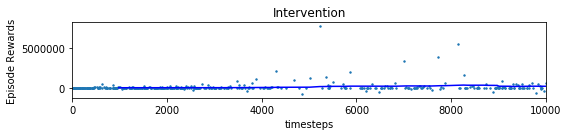

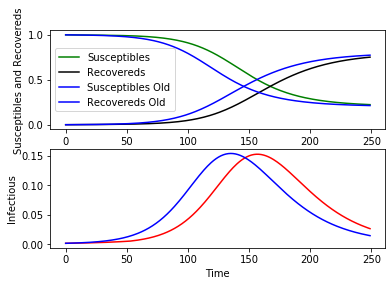

In [7]:
#peak days
plot_all(env,action_values,100000,df)

In [ ]:
#model,env,action_values,df = train(1000,1000)

In [ ]:
#plot_all(env,action_values,1000,df)

Old peak value : 0.153925 New peak value : 0.081872 Peak moved by : 0.072054
Old peak day : 135.000000 New peak day : 200.000000 Peak day moved by : -65.000000
Old area under curve : 3865.845117 New area under curve : 2366.752217 Diff in area under curve : 1499.092900
Intervention list :  [(0, 243), (0, -1, 0.08)]


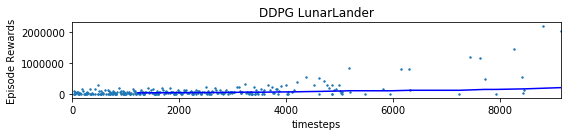

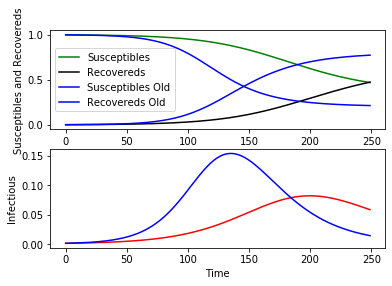

In [7]:
plot_all(env,action_values,100000,df)

Old peak value : 0.153925 New peak value : 0.153925 Peak moved by : -0.000000
Old peak day : 135.000000 New peak day : 135.000000 Peak day moved by : 0.000000
Old area under curve : 3865.845117 New area under curve : 3865.835547 Diff in area under curve : 0.009570
Intervention list :  []


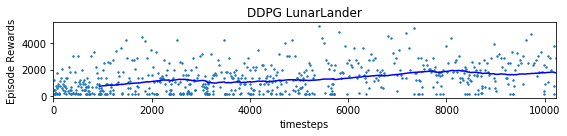

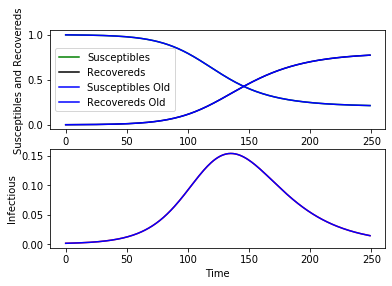

In [7]:
plot_all(env,action_values,100000,df)

Old peak value : 0.153925 New peak value : 0.149869 Peak moved by : 0.004057
Old peak day : 135.000000 New peak day : 171.000000 Peak day moved by : -36.000000
Old area under curve : 3865.845117 New area under curve : 3628.743513 Diff in area under curve : 237.101604
Intervention list :  [0, (0, 87, 0.08)]


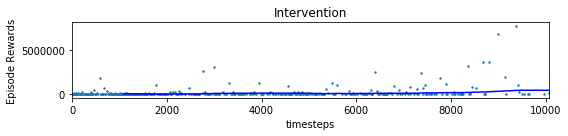

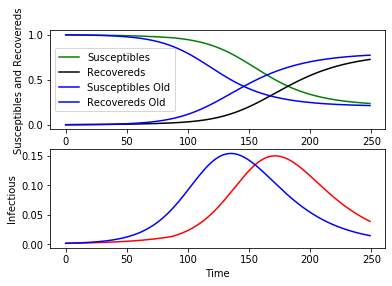

In [7]:
plot_all(env,action_values,100000,df)

In [ ]:
#100*cost_intervention + 1000*cost_start - 100000*gain_intervention - 100* reward_finish
#inc cost of start